# Cell Averager

### Initial imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys

import numpy as np
from matplotlib import pyplot as plt

import os

In [2]:
ehooke = r"C:\Users\Antonio\Desktop\CA\eHooke_1.0-master"
sys.path.append(ehooke)

from images import ImageManager
from parameters import MaskParameters, RegionParameters, CellParameters, ParametersManager
from segments import SegmentsManager
from cells import CellManager
from cellcycleclassifier import CellCycleClassifier

from model import ExperimentalCondition, Replicate

You are using Python 3.6, which will no longer be supported in StarDist 0.9.0.
→ Please upgrade to Python 3.7 or later.
Using TensorFlow backend.


2022-11-16_leftYFP-rightCFP YFP CFP
2022-11-16_leftYFP-rightCFP_NA200 YFP CFP
2022-11-16_oriYFP-terCFP YFP CFP
2022-11-16_oriYFP-terCFP_dscrA-dspo0J YFP CFP
2022-11-16_oriYFP-terCFP_NA200 YFP CFP
2022-11-17_leftmNG-rightmScI_M9-25C mNG mScI
2022-11-17_orimNG-termScI_M9-25C mNG mScI
2022-11-21_leftYFP_M9-25C YFP none
2022-11-21_oriYFP_M9-25C YFP none
2022-11-22_oriYFP-terCFP_ddivIVA YFP CFP
2022-11-22_oriYFP-terCFP_dftsKC YFP CFP
2022-11-22_oriYFP-terCFP_dnoc YFP CFP
2022-11-22_oriYFP-terCFP_dxerC YFP CFP
2022-11-23_oriYFP-terCFP_dsbcE YFP CFP
2022-11-23_oriYFP-terCFP_dscpAB YFP CFP
2022-11-23_oriYFP-terCFP_dscrA YFP CFP
2022-11-23_oriYFP-terCFP_dspo0J YFP CFP
2022-11-28_oriYFP-terCFP_dparS_-1_+3_-12_+35 YFP CFP
2022-11-28_oriYFP-terCFP_dscrS_0_+2_-11_+32 YFP CFP
2022-11-30_oriYFP-terCFP YFP CFP
2022-12-21_leftYFP-rightCFP YFP CFP
2022-12-21_leftYFP-rightCFP_dscpAB YFP CFP
2022-12-21_leftYFP-rightCFP_dscrA YFP CFP
2022-12-21_leftYFP-rightCFP_dspo0J YFP CFP
2022-7-21_oriYFP-terCFP_dSAUSA

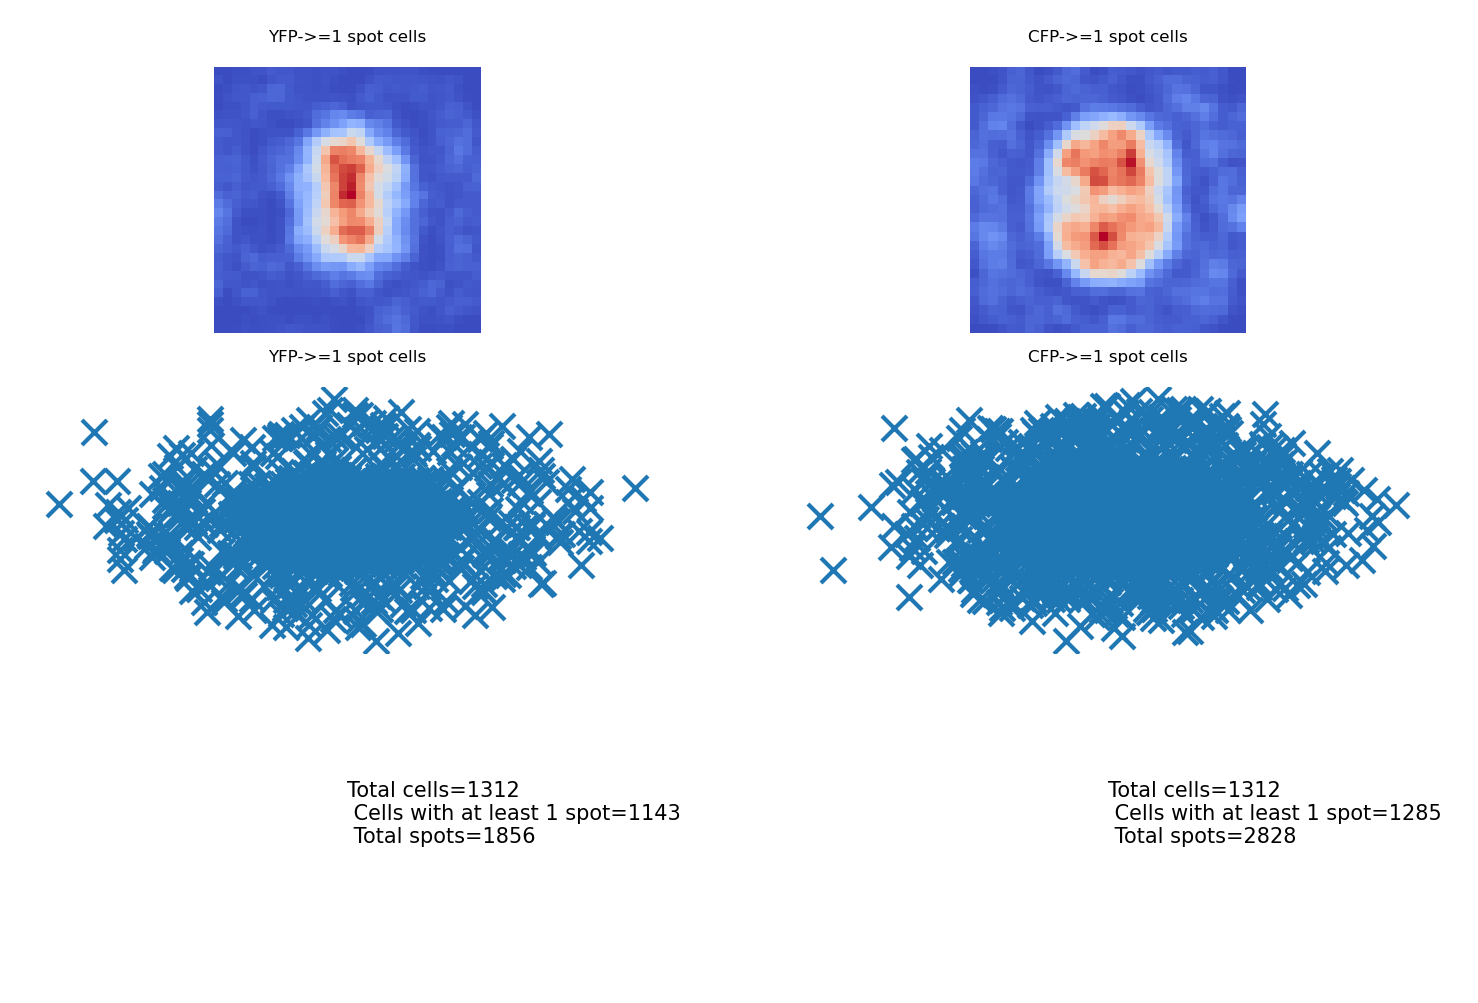

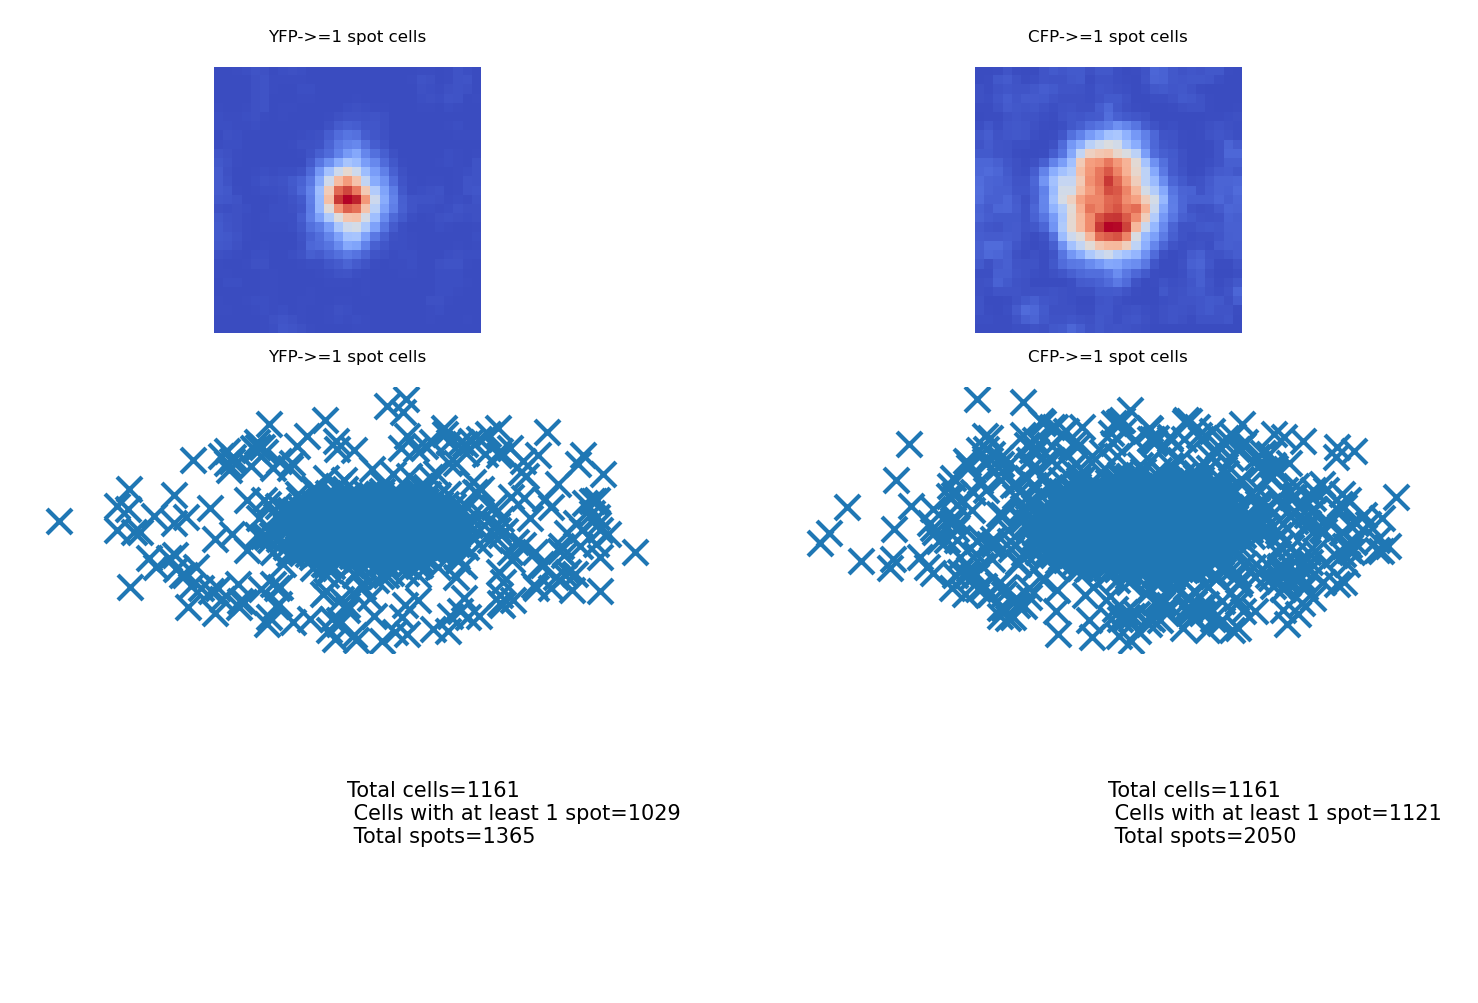

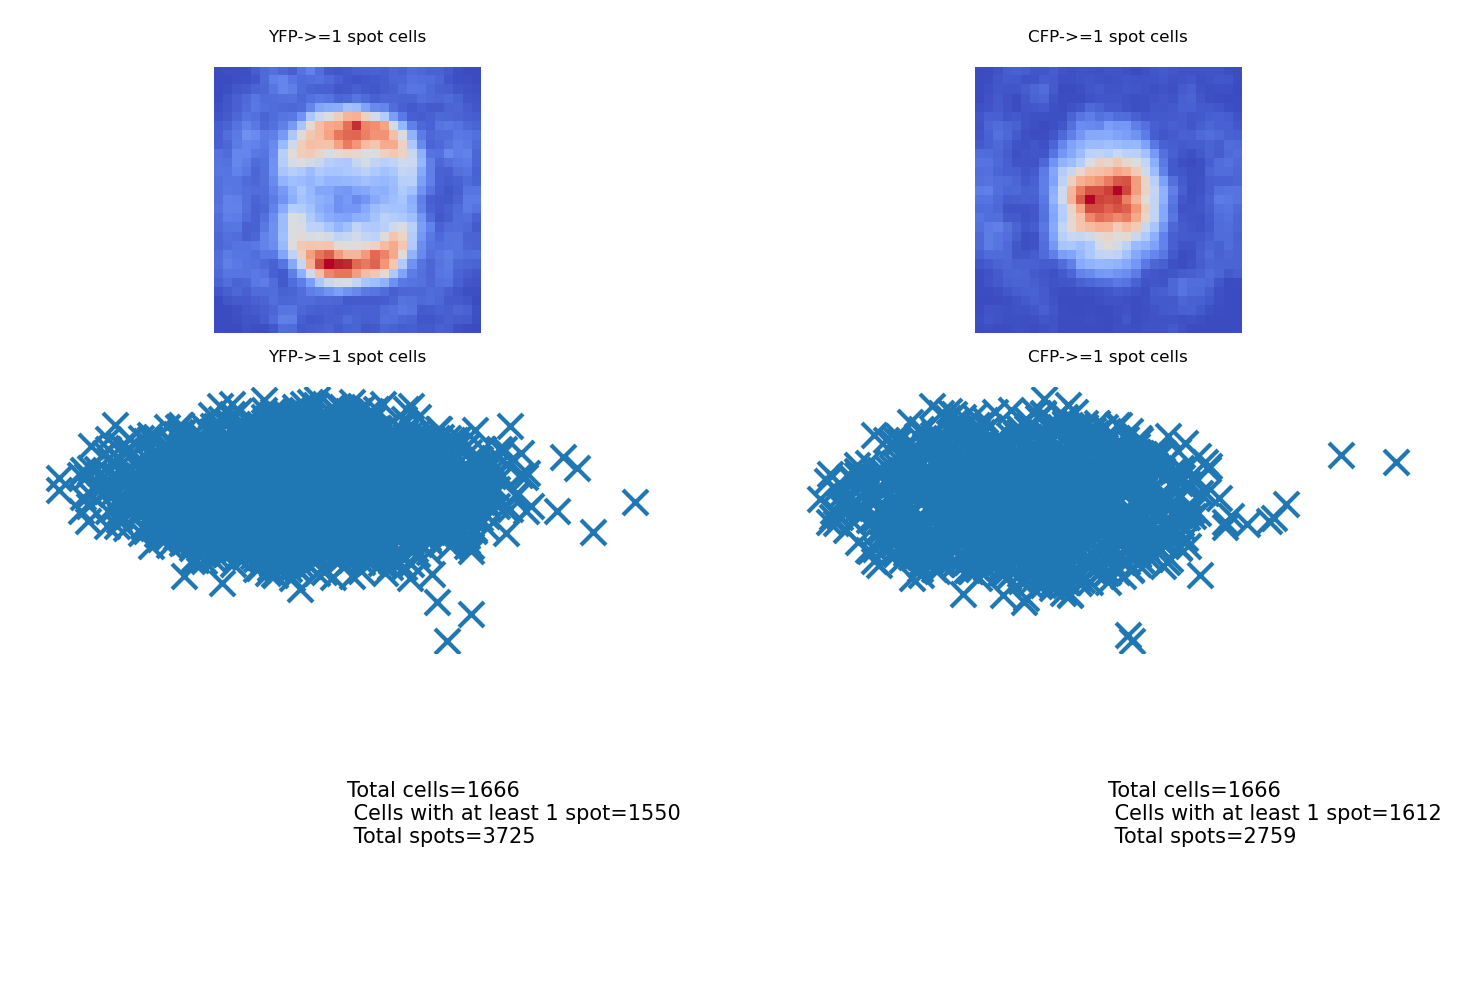

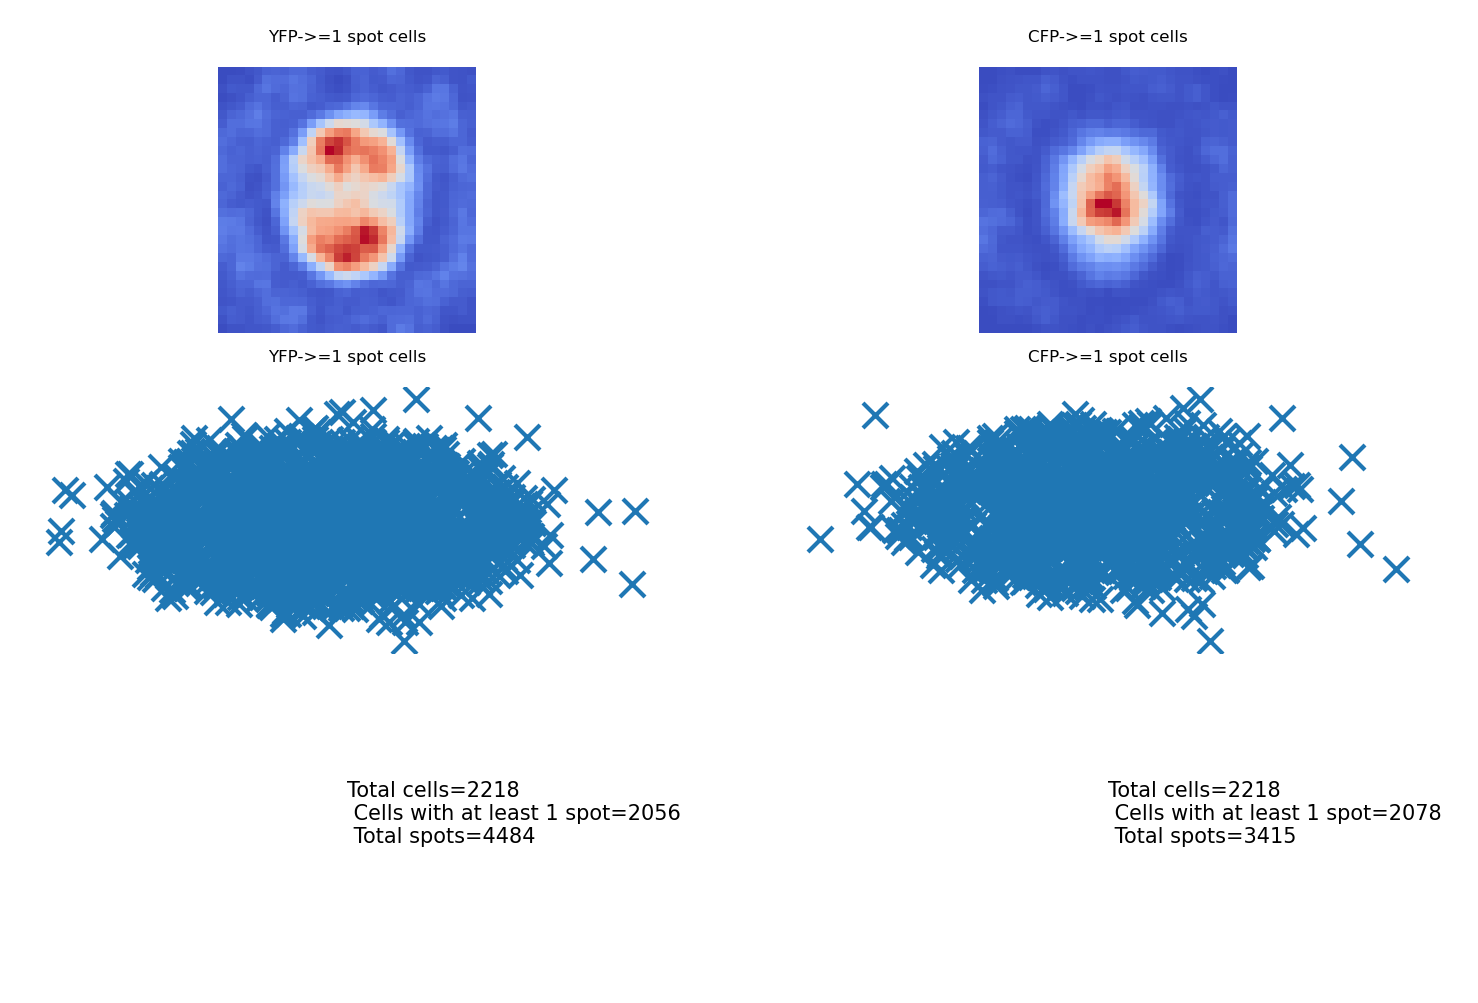

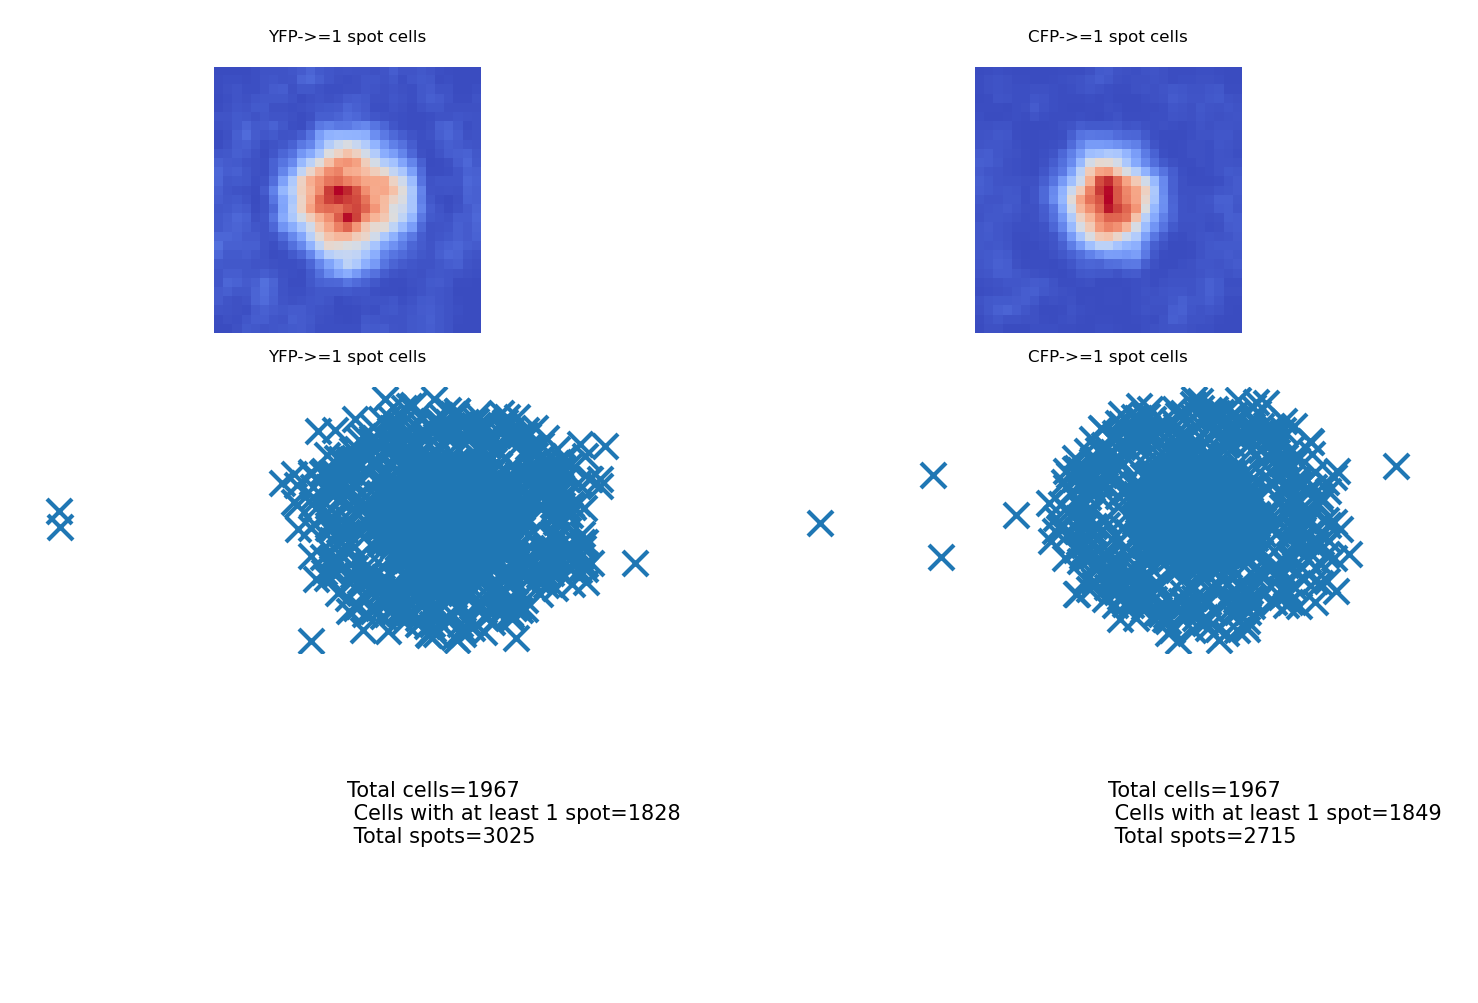

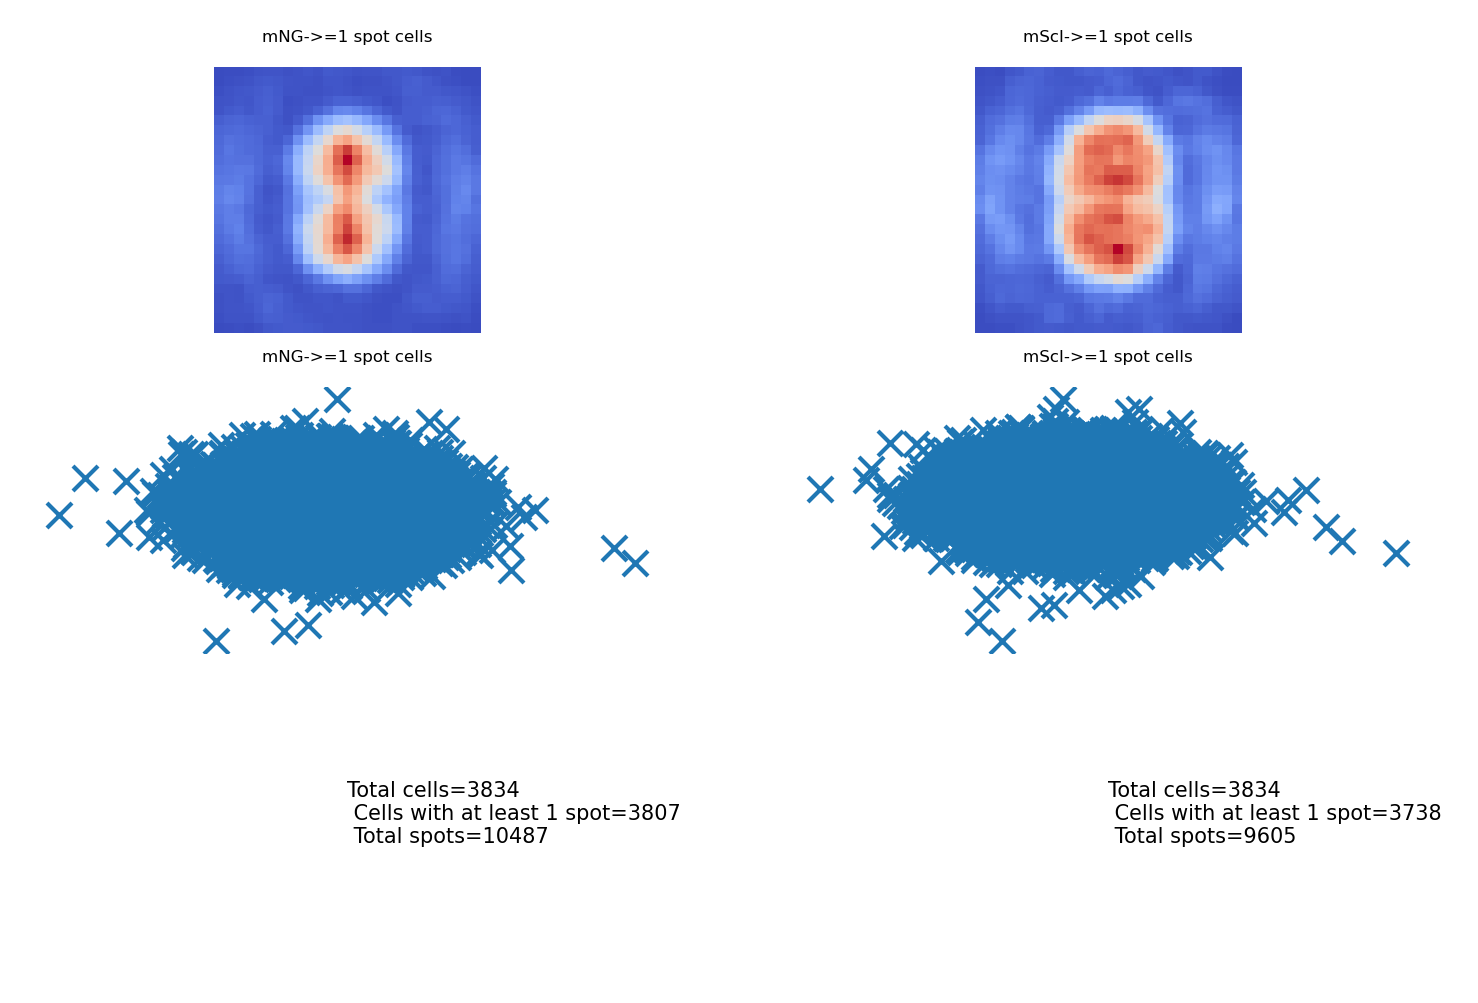

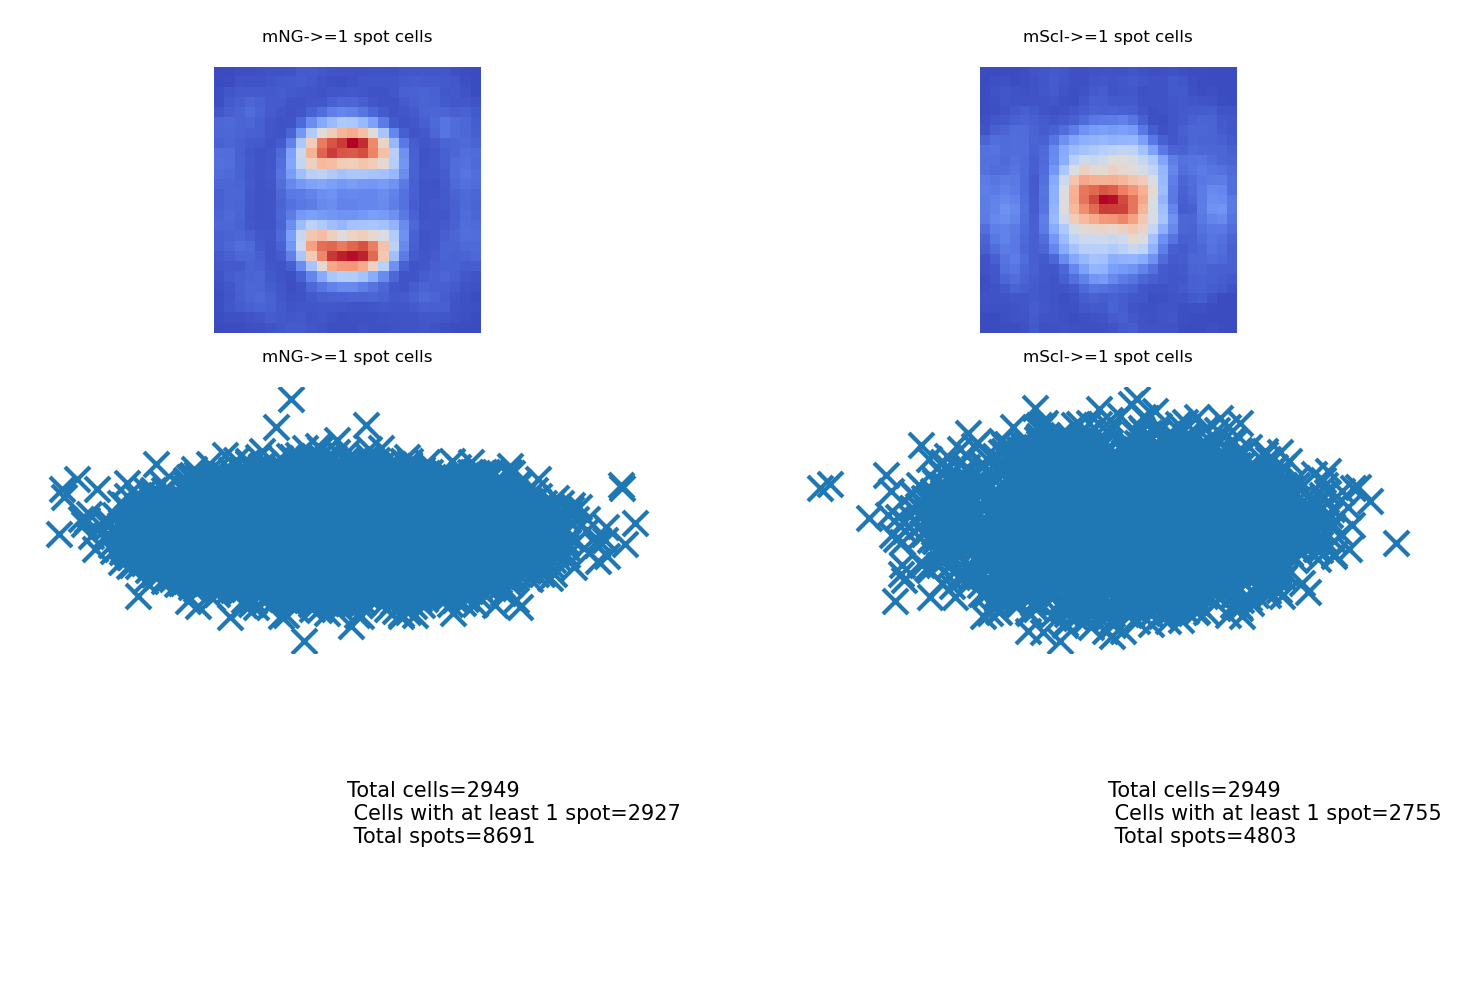

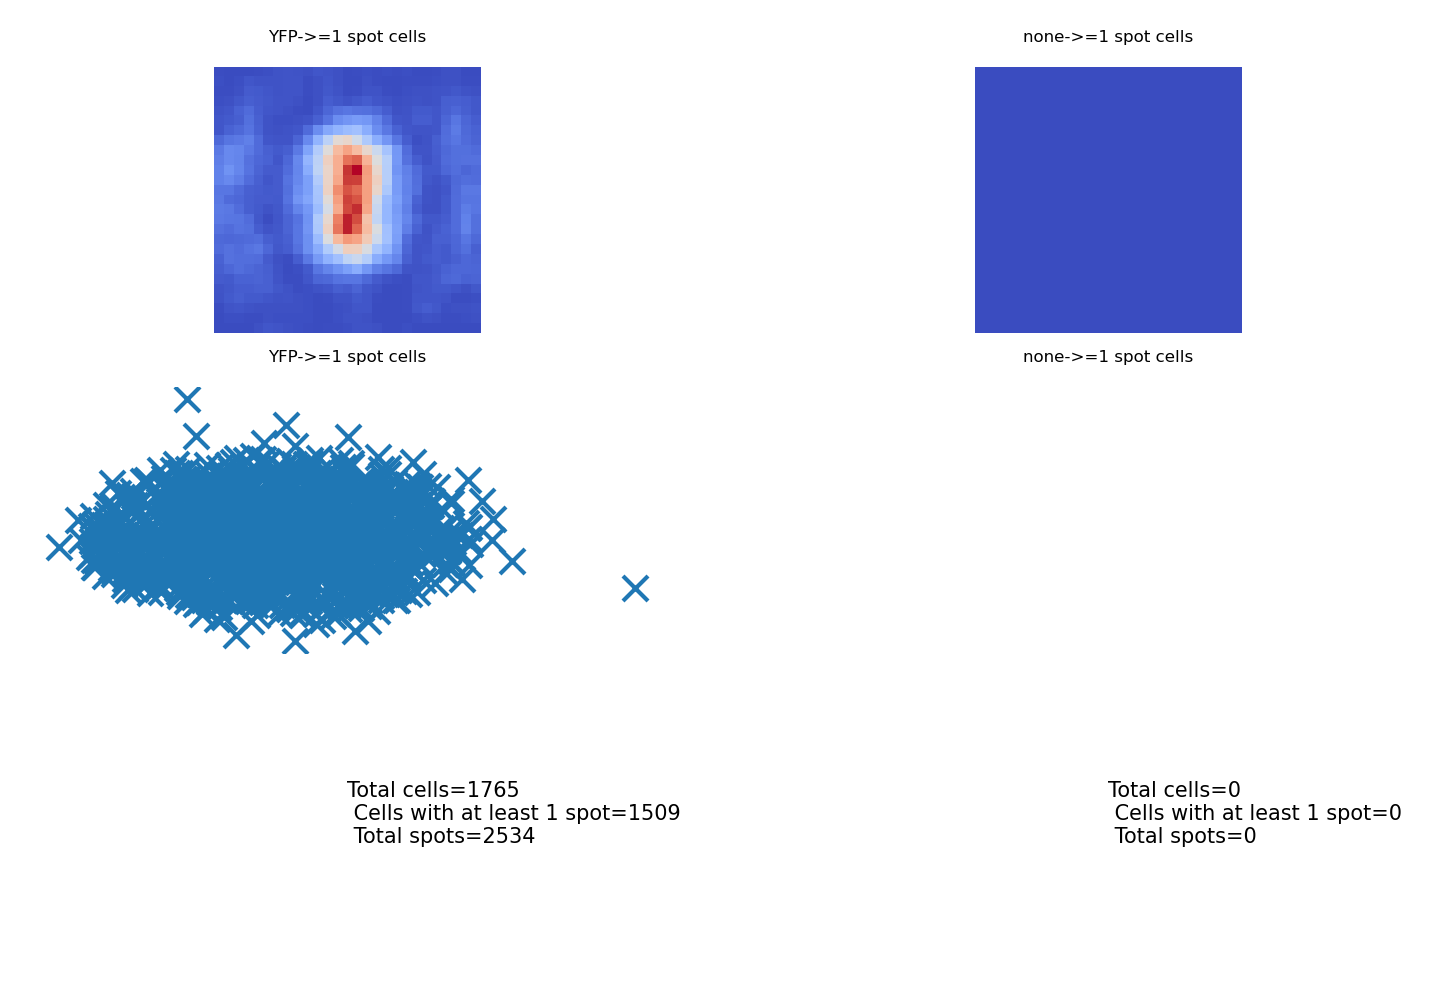

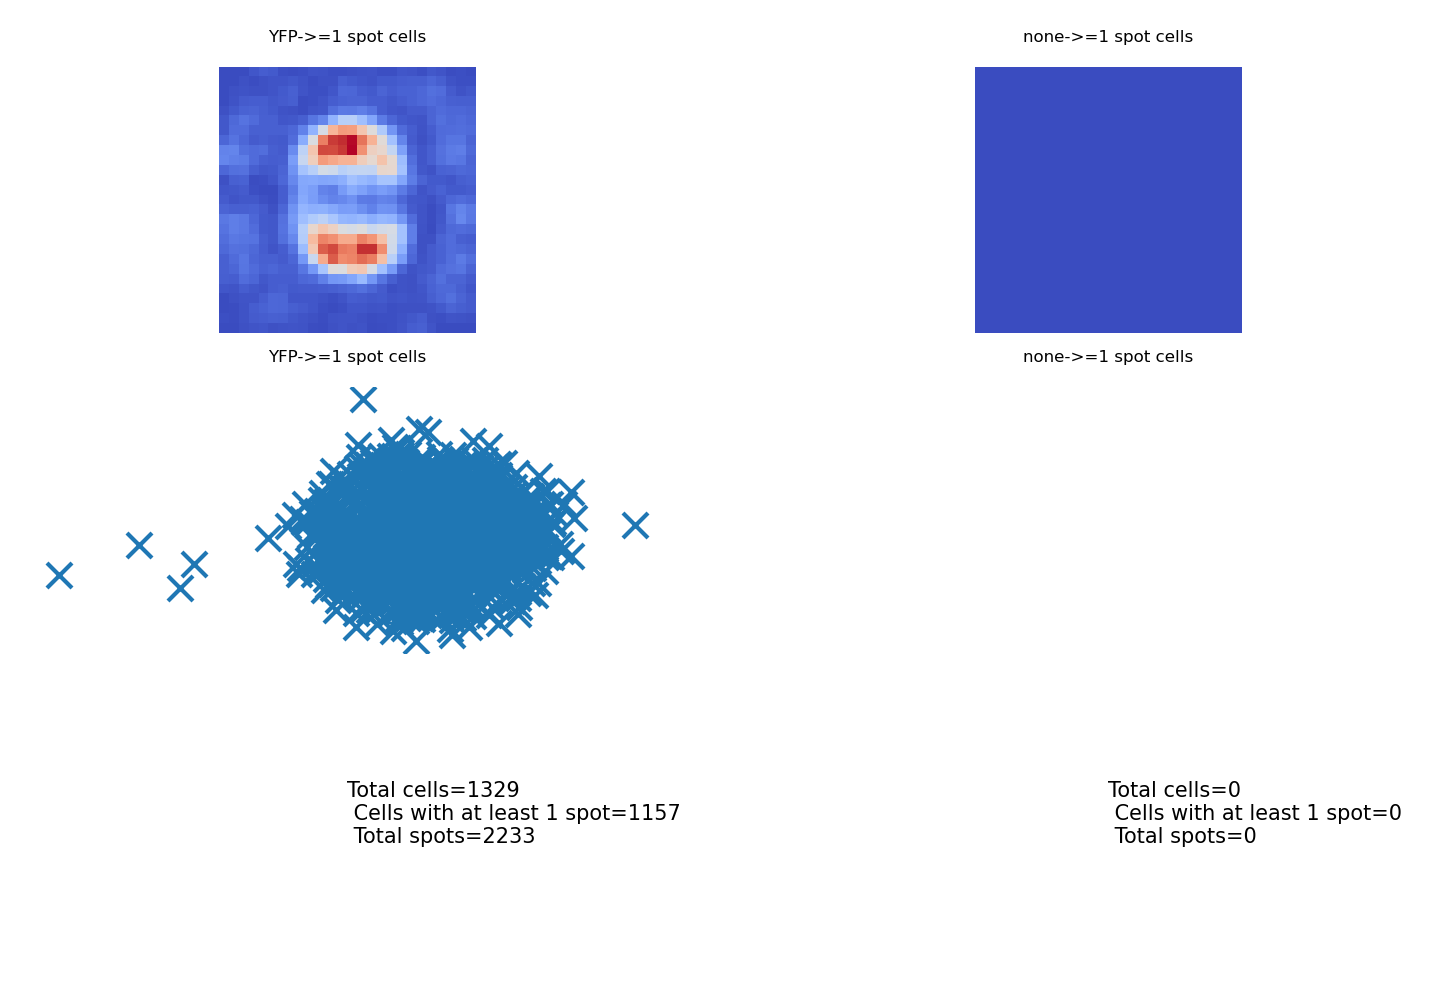

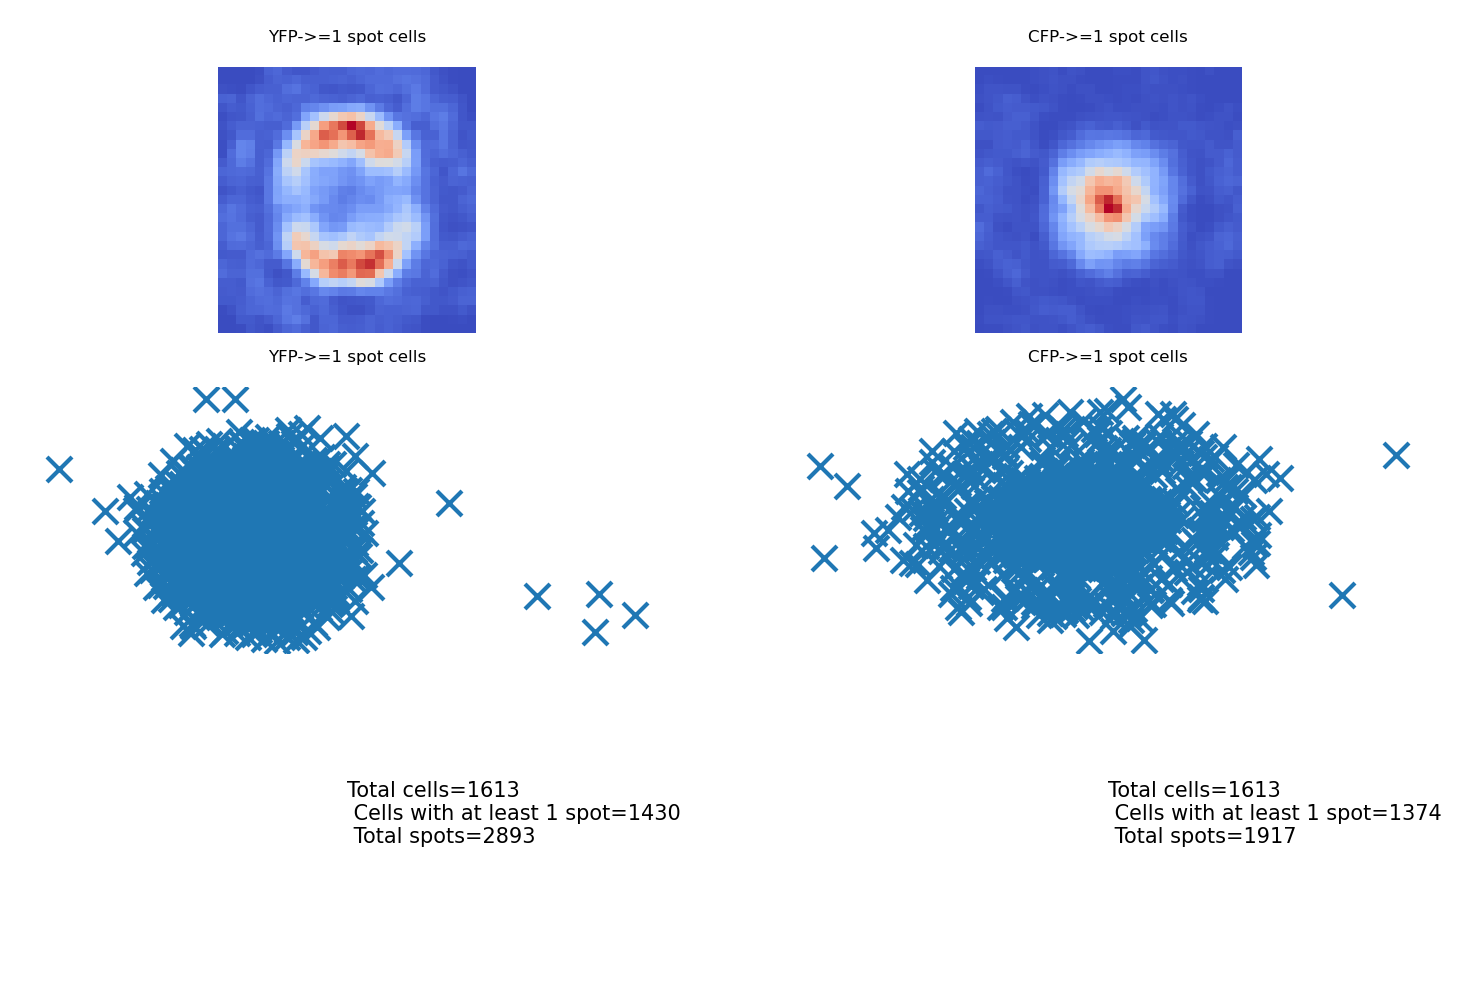

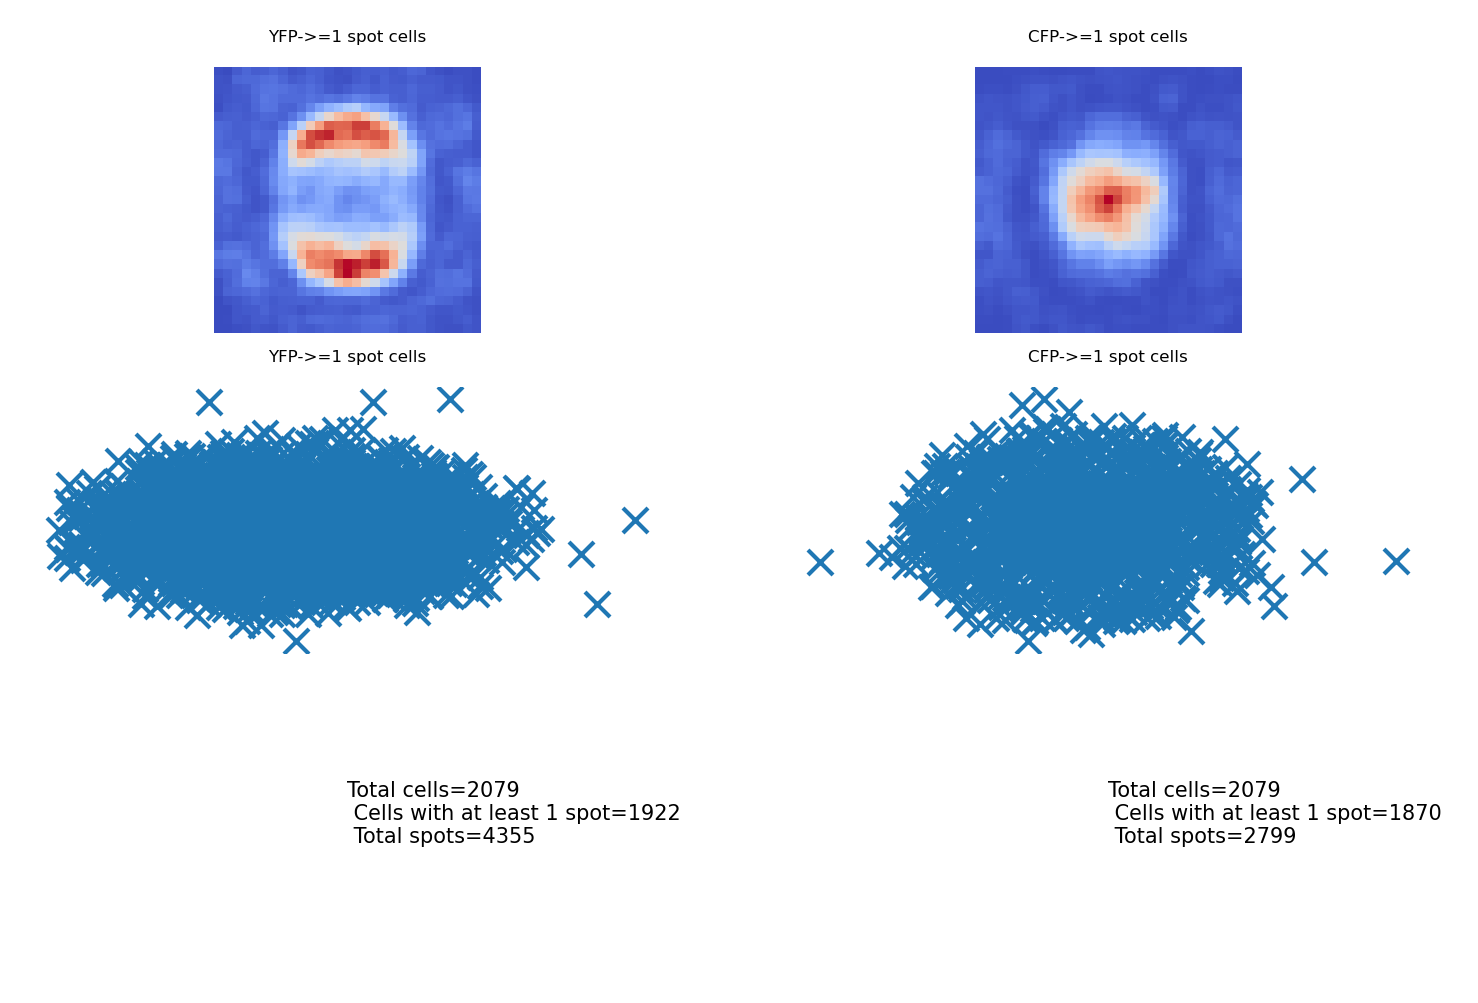

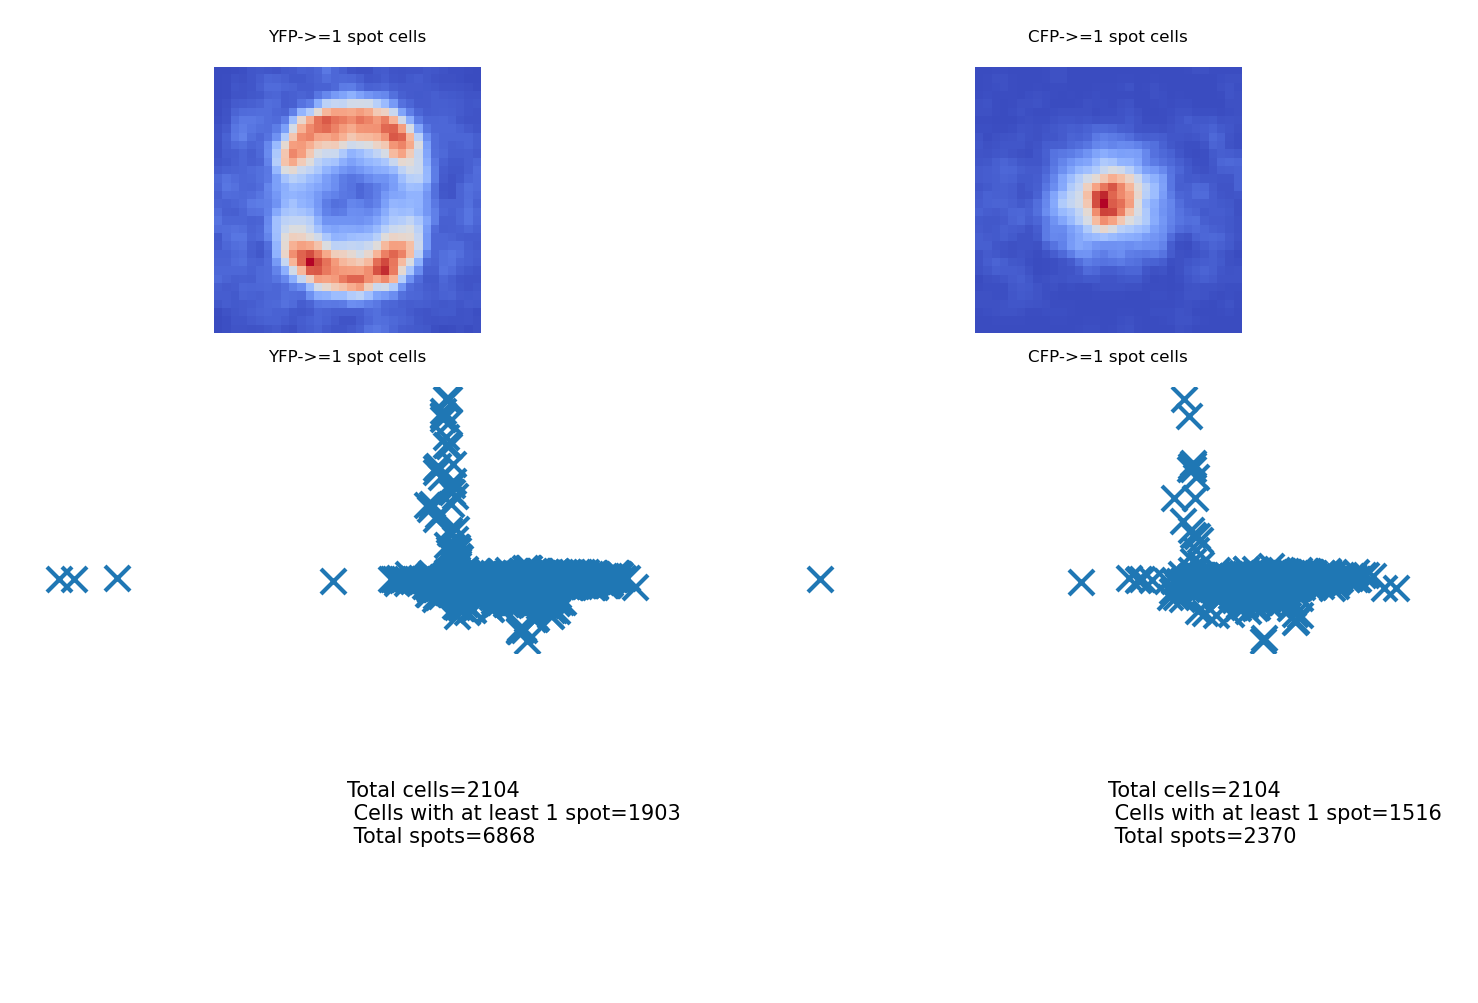

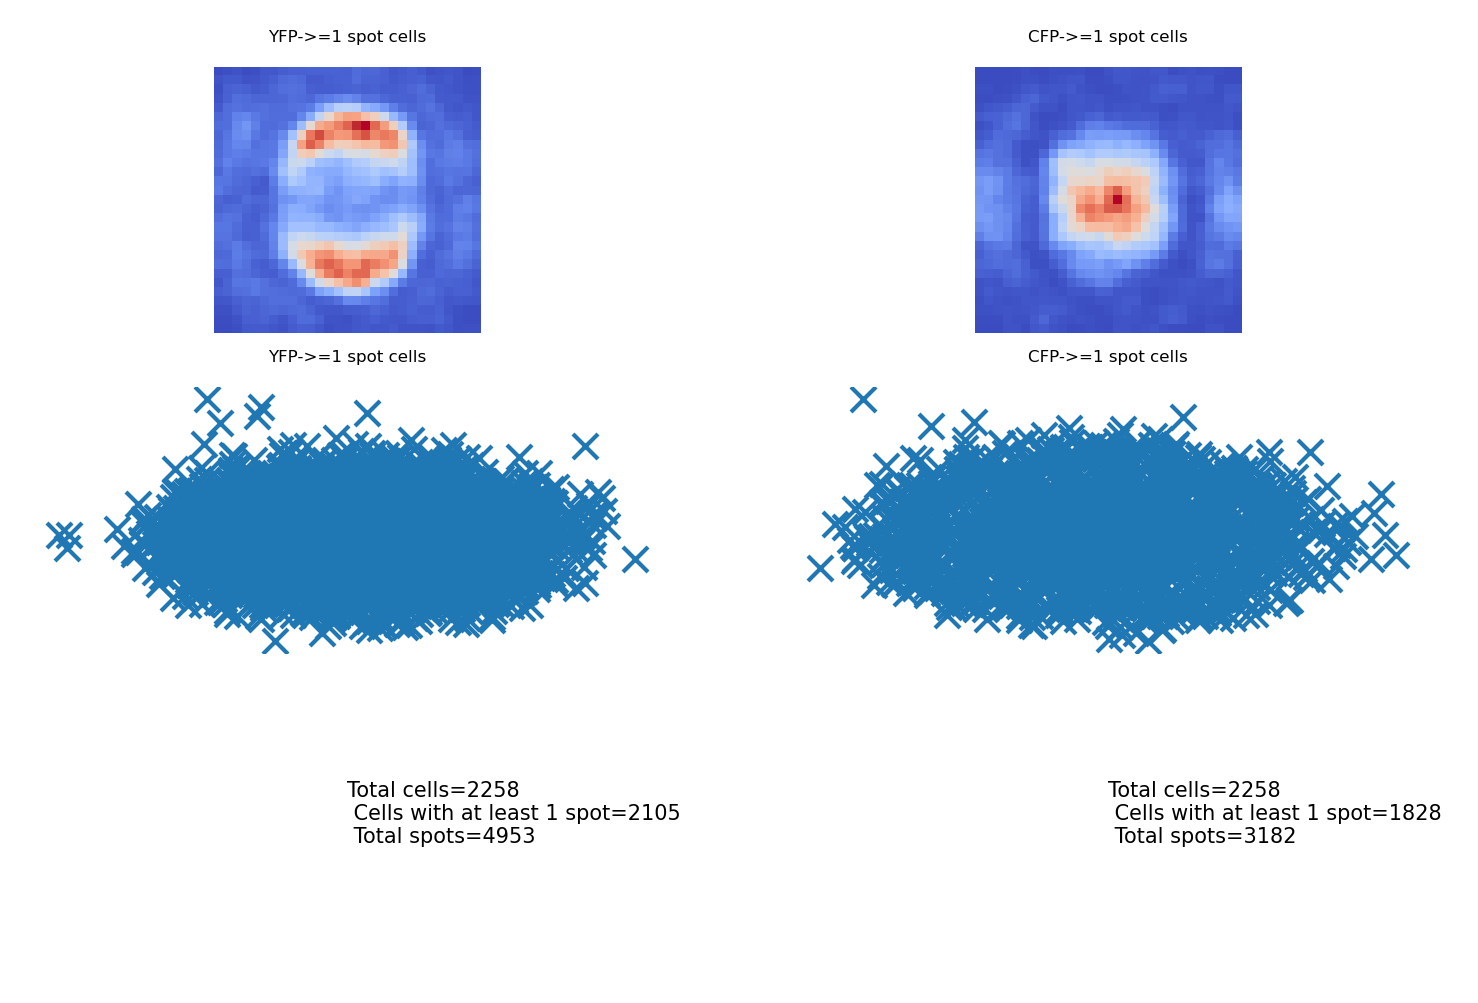

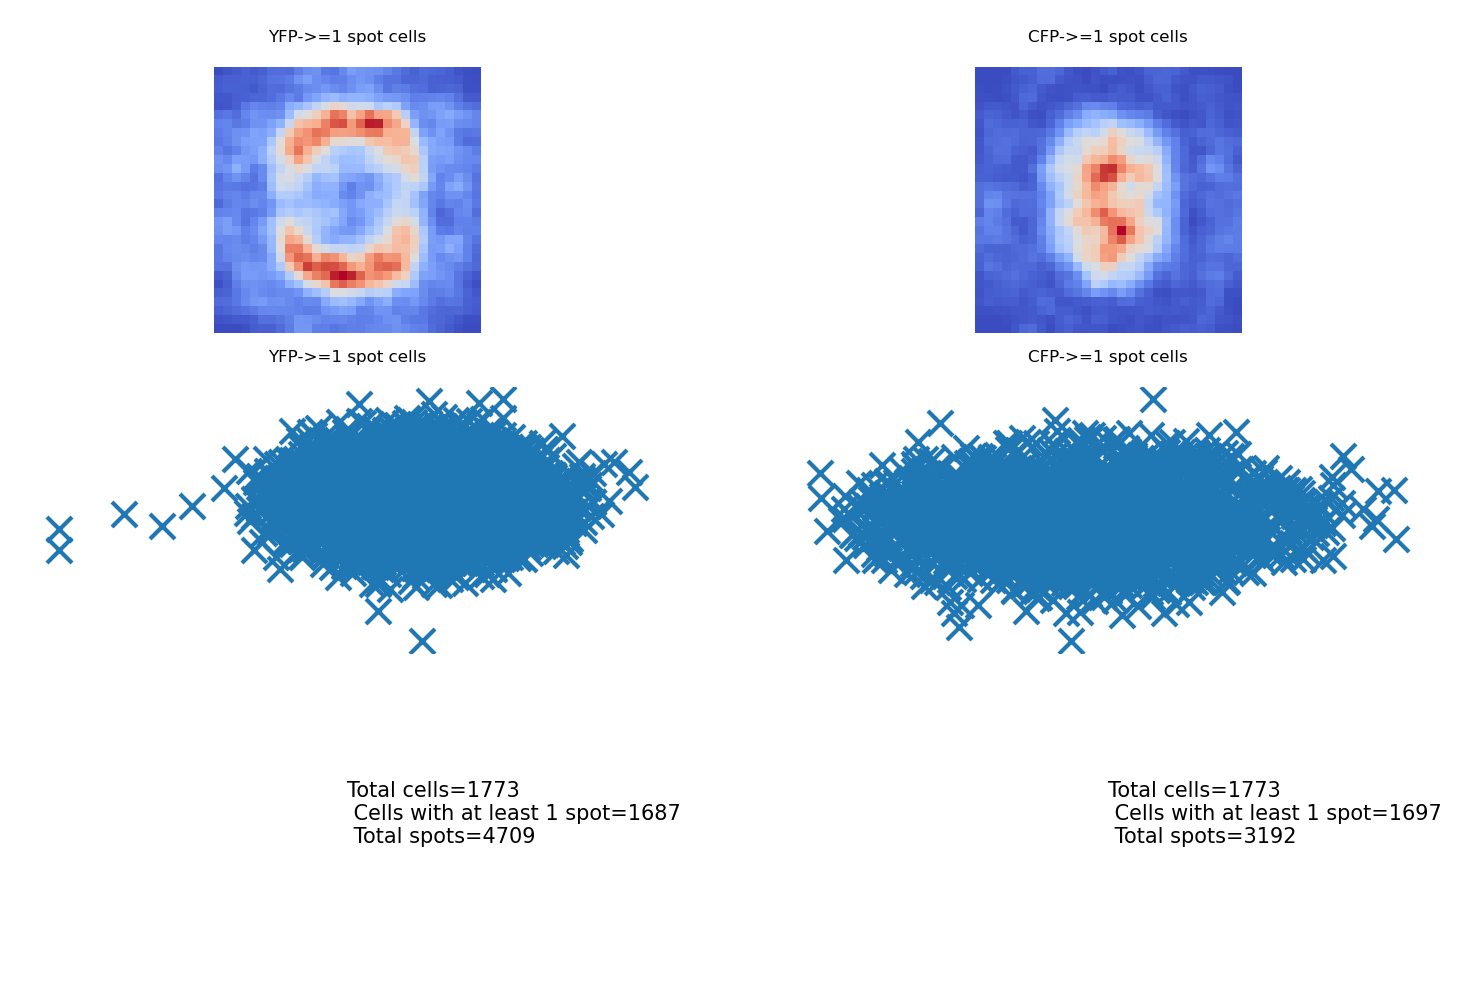

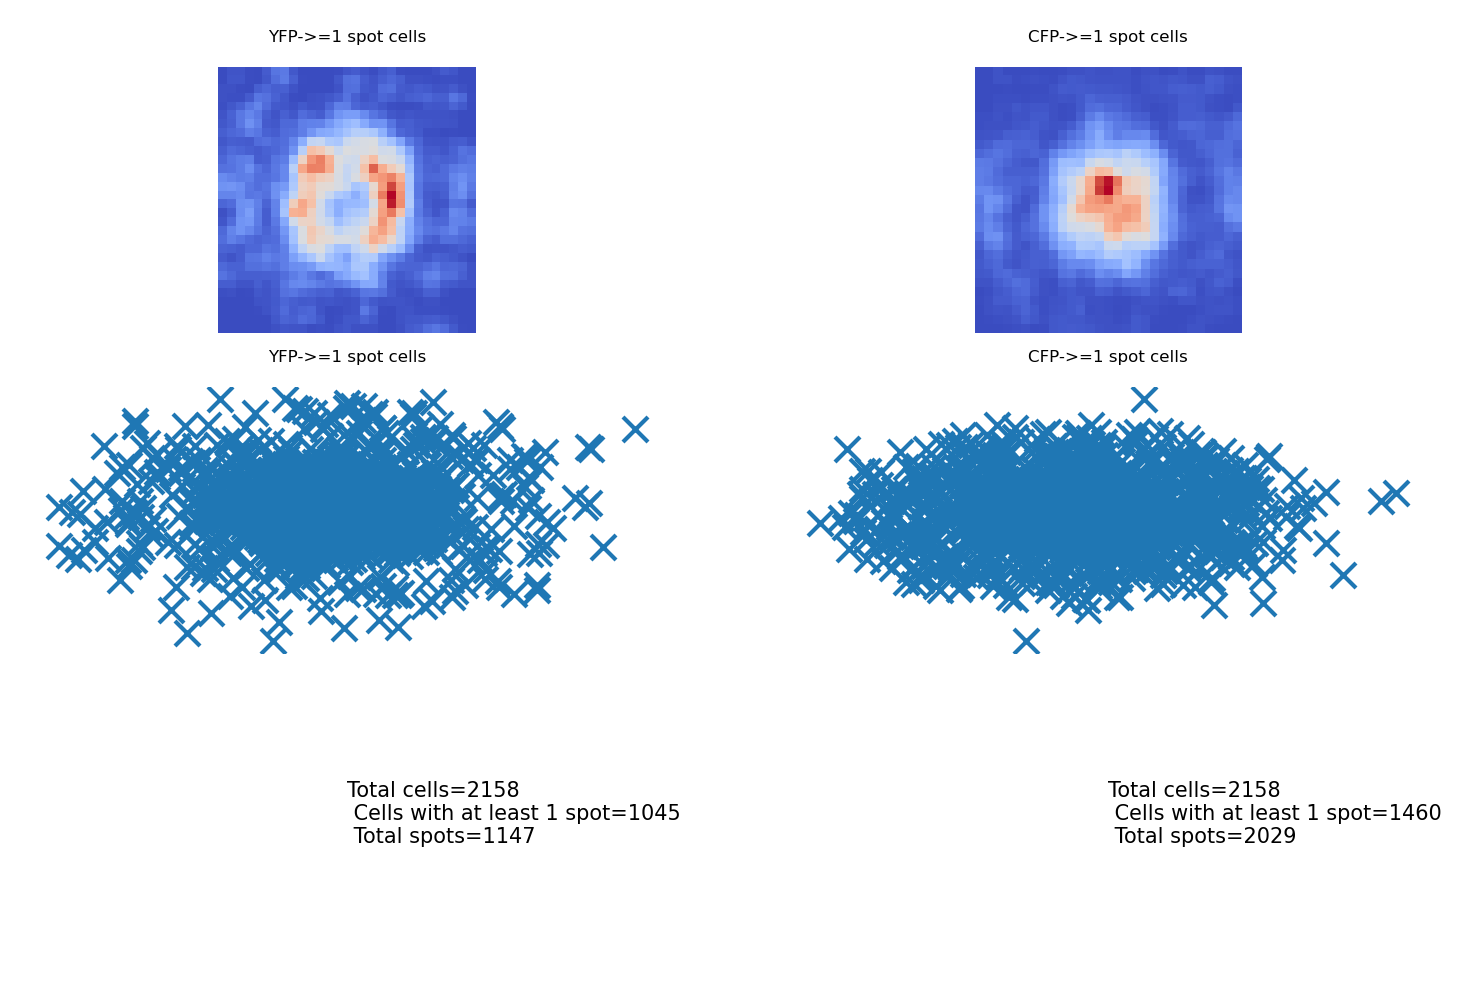

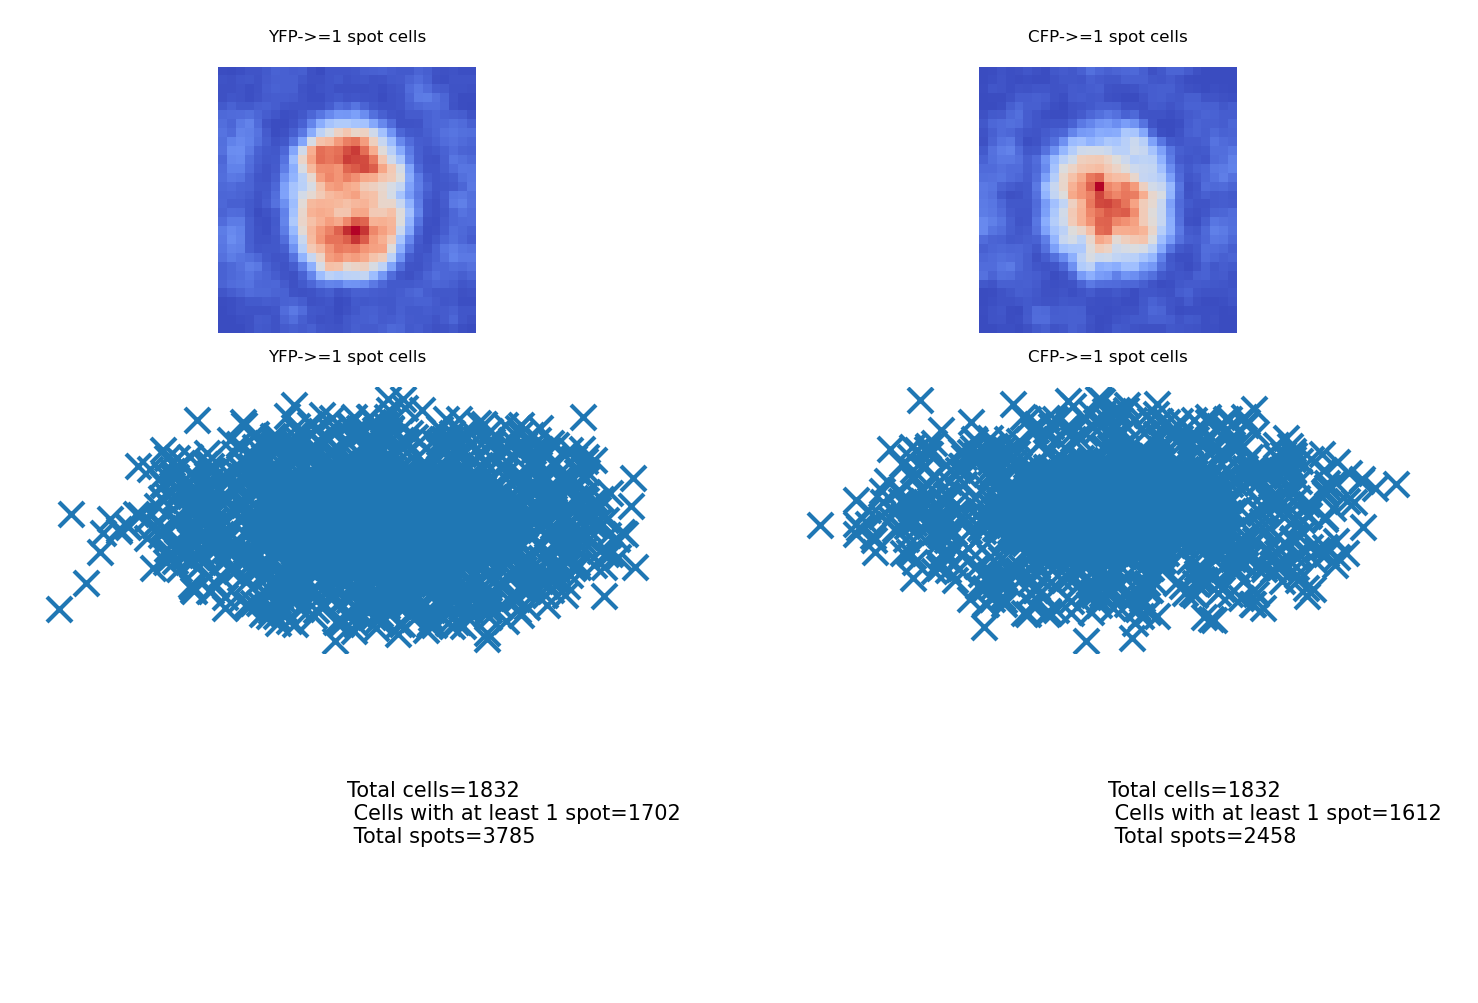

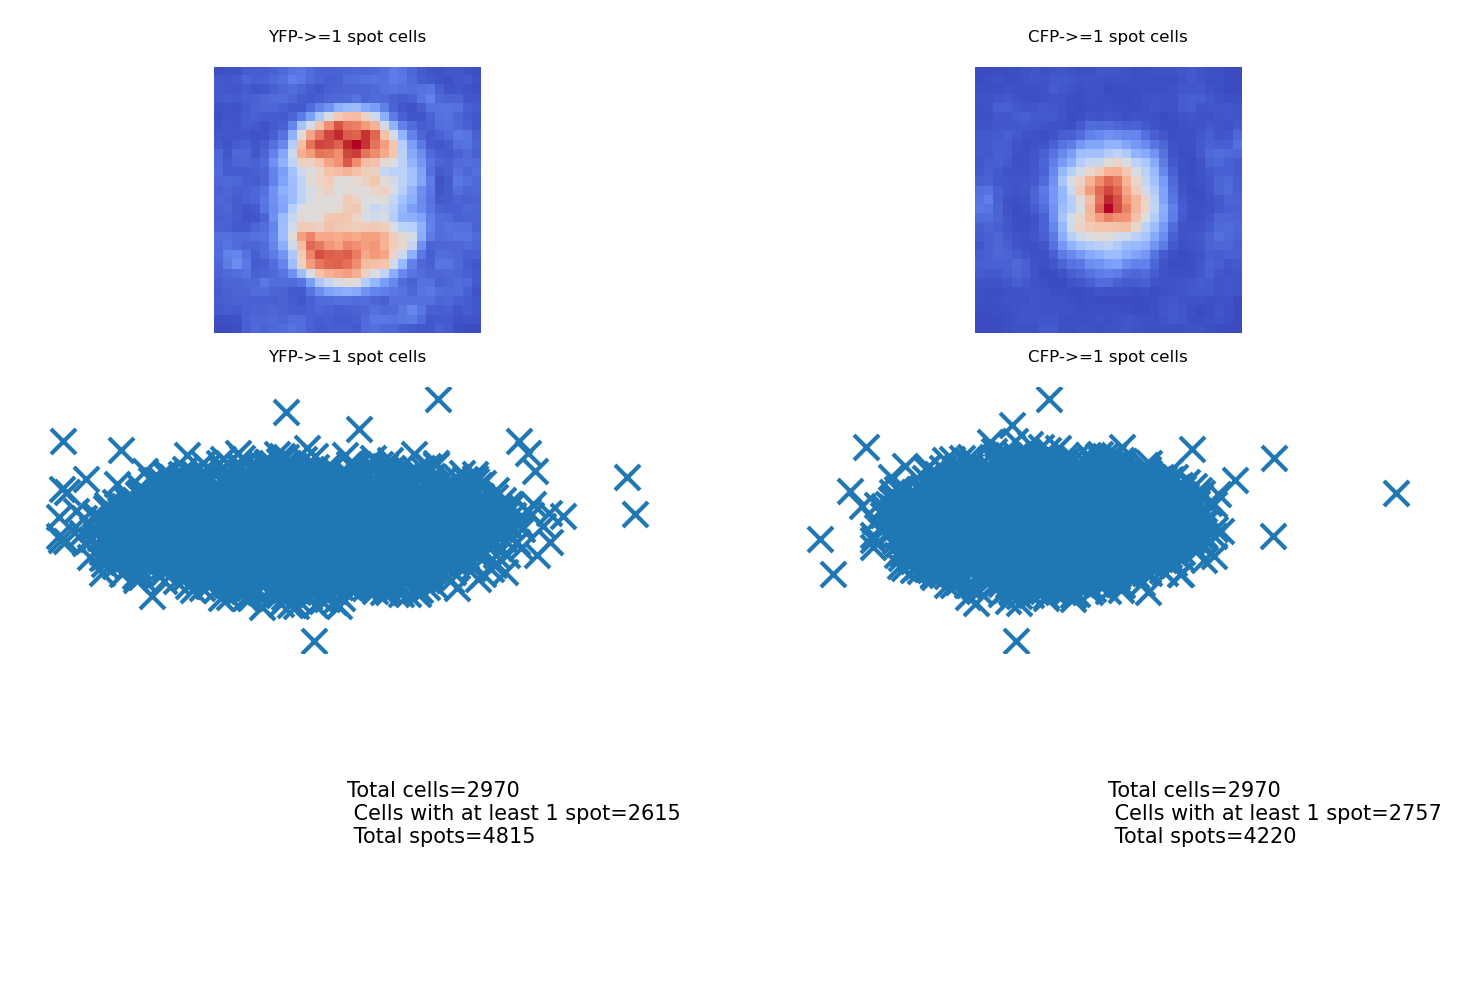

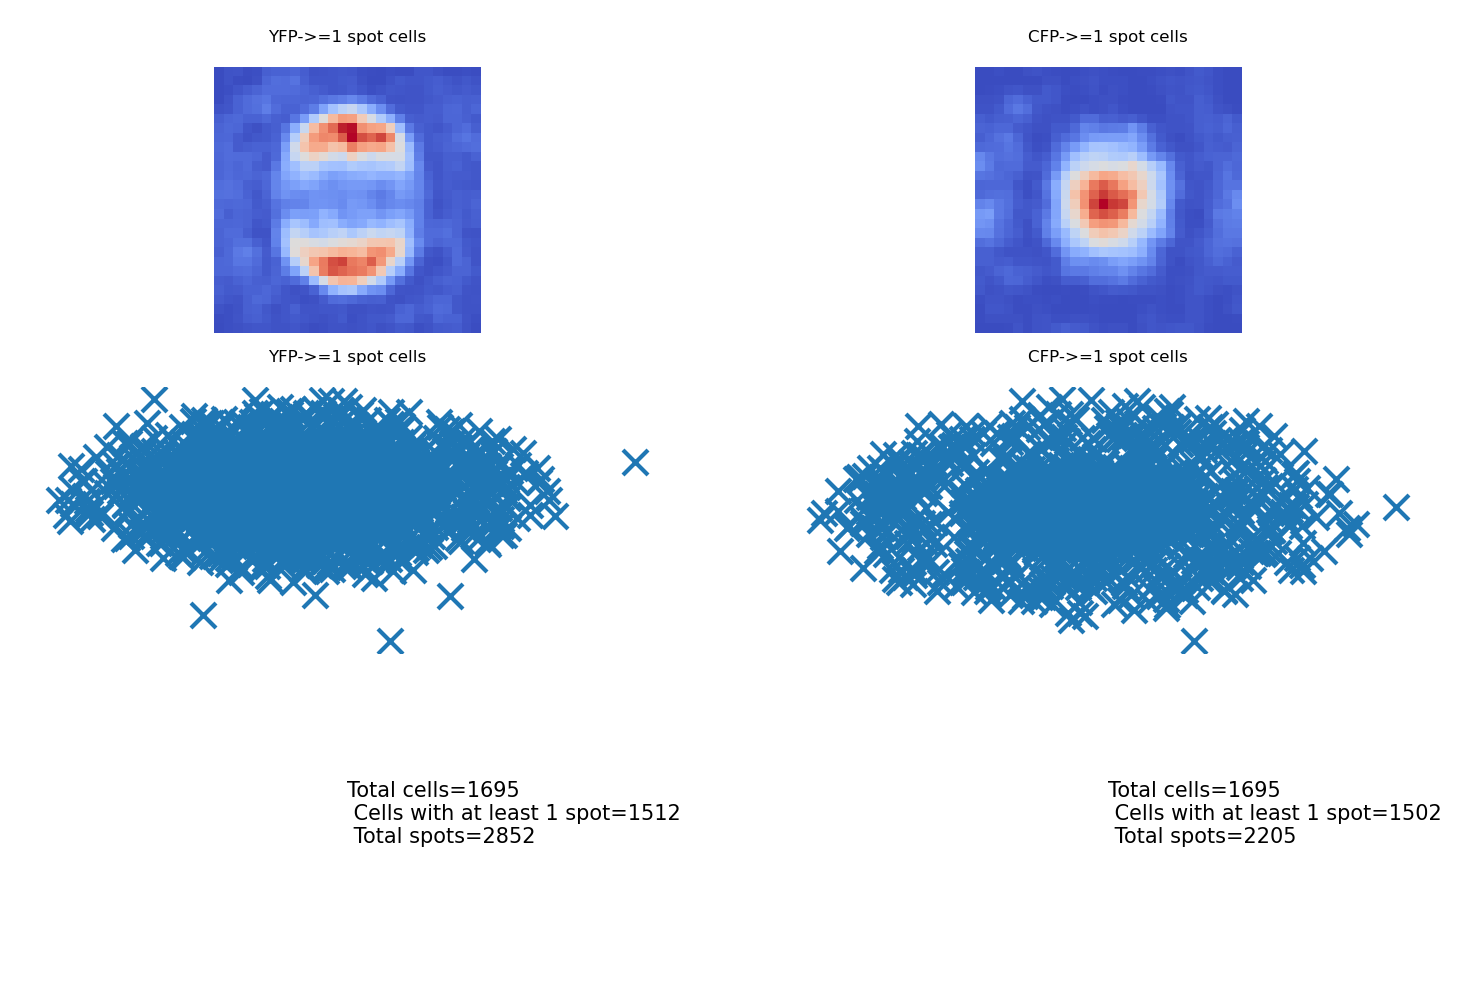

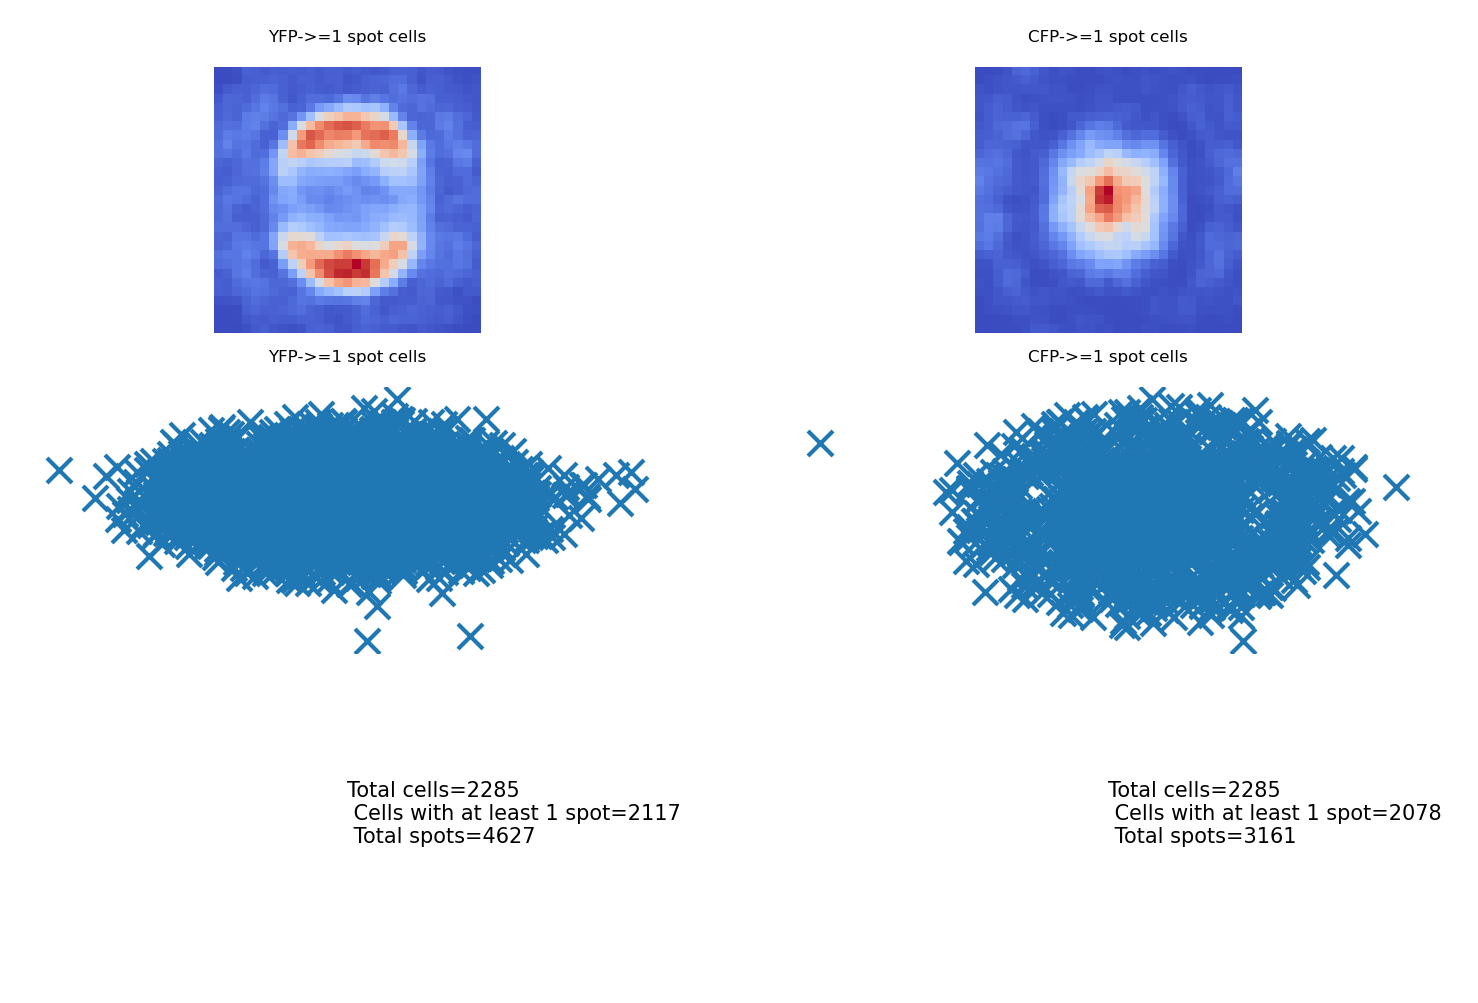

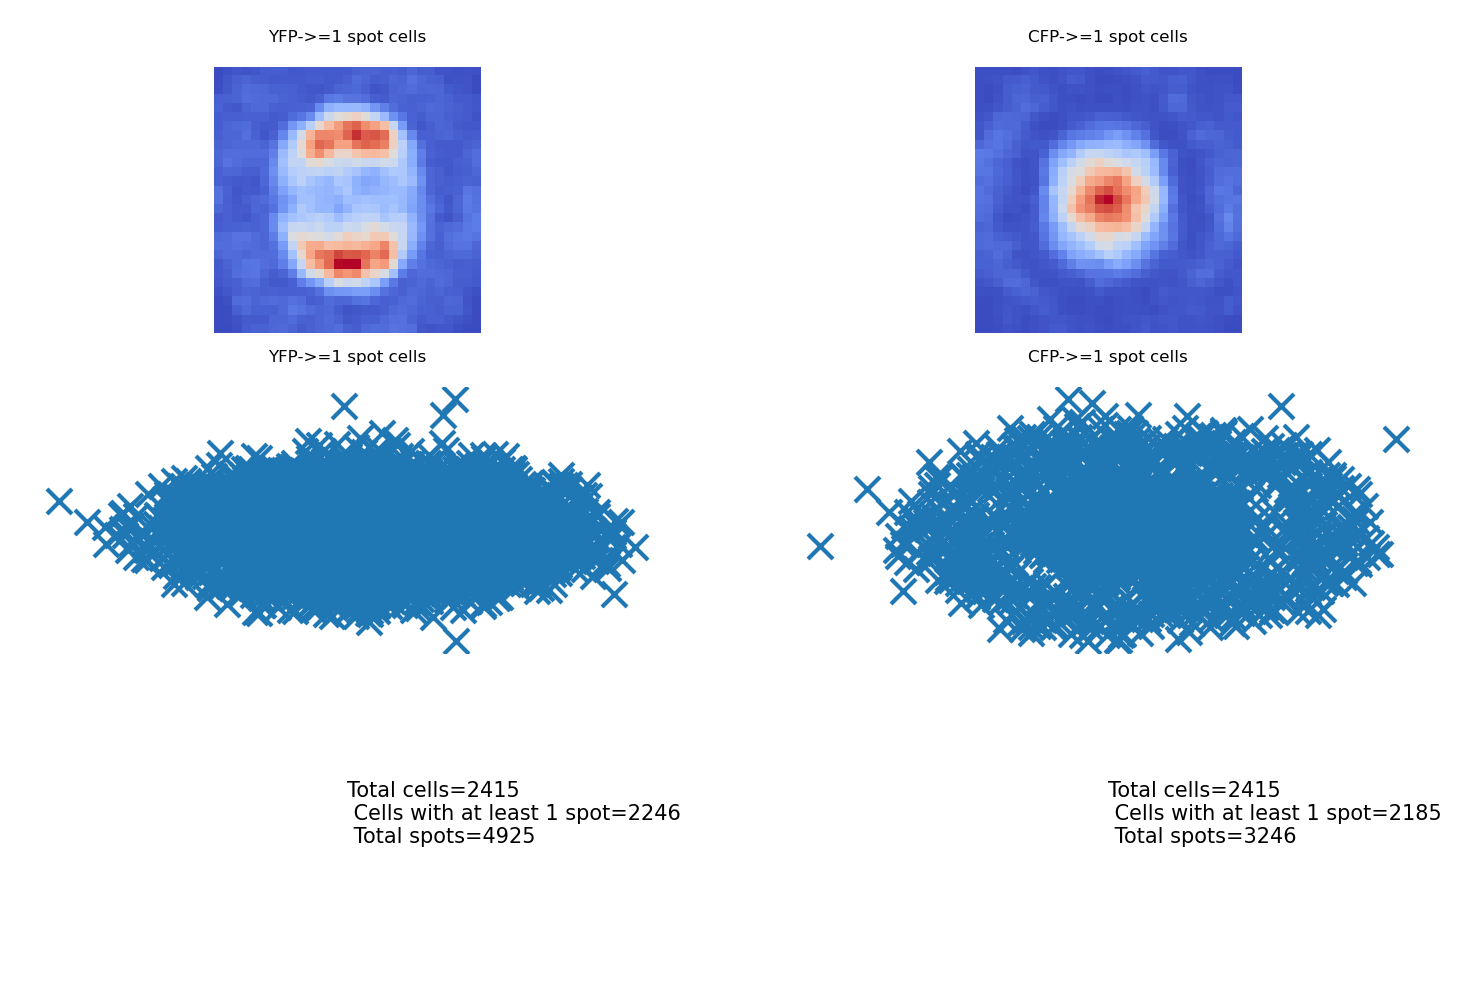

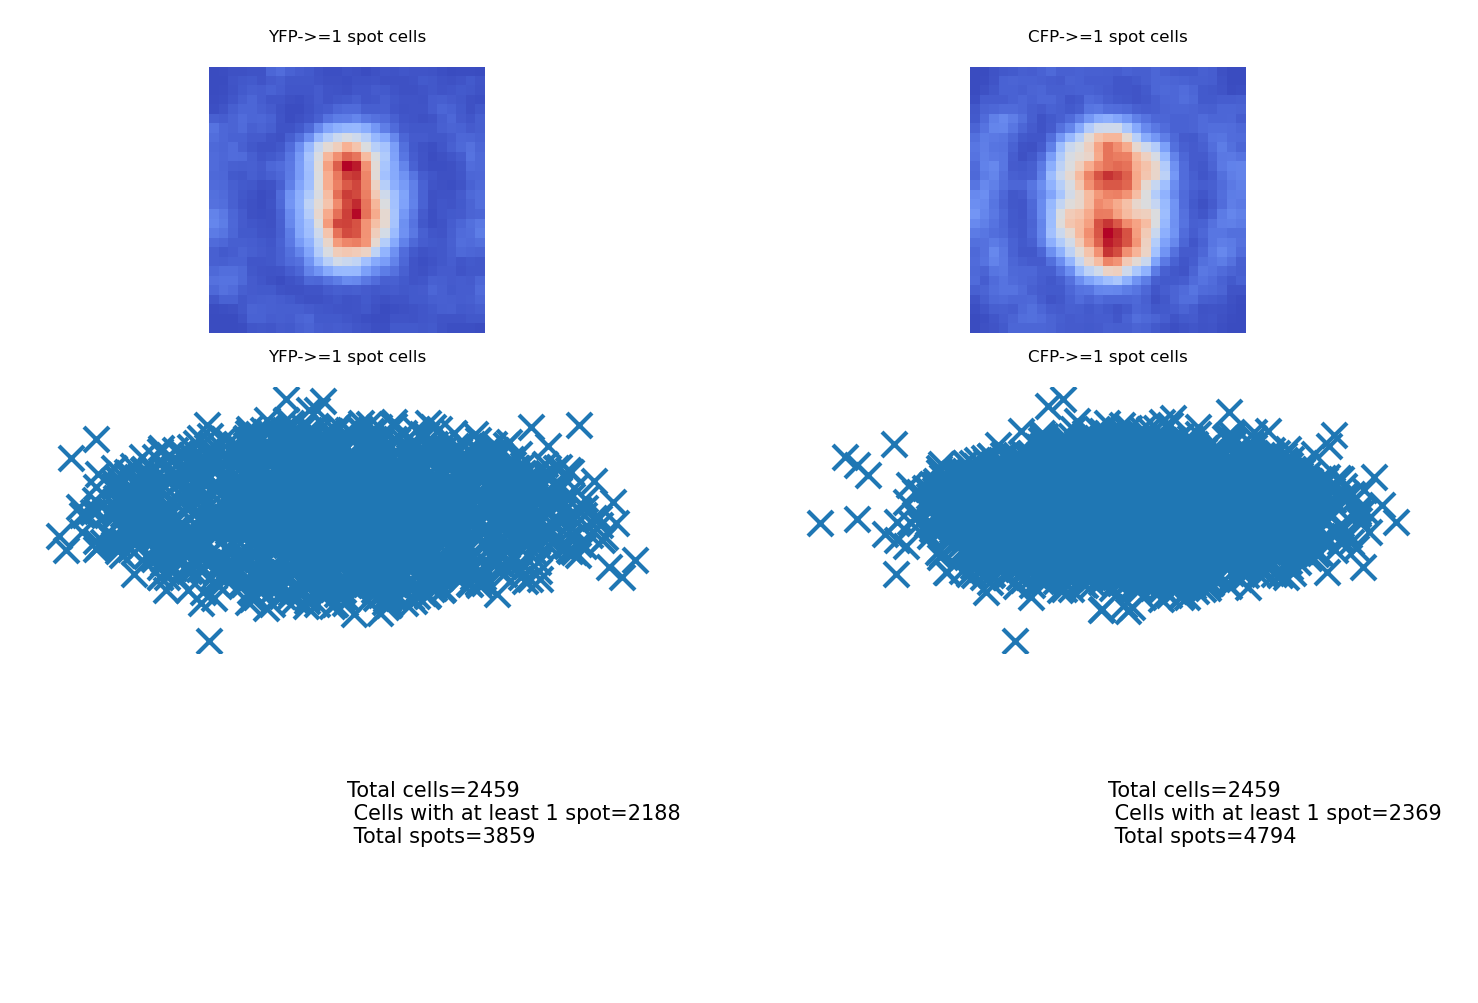

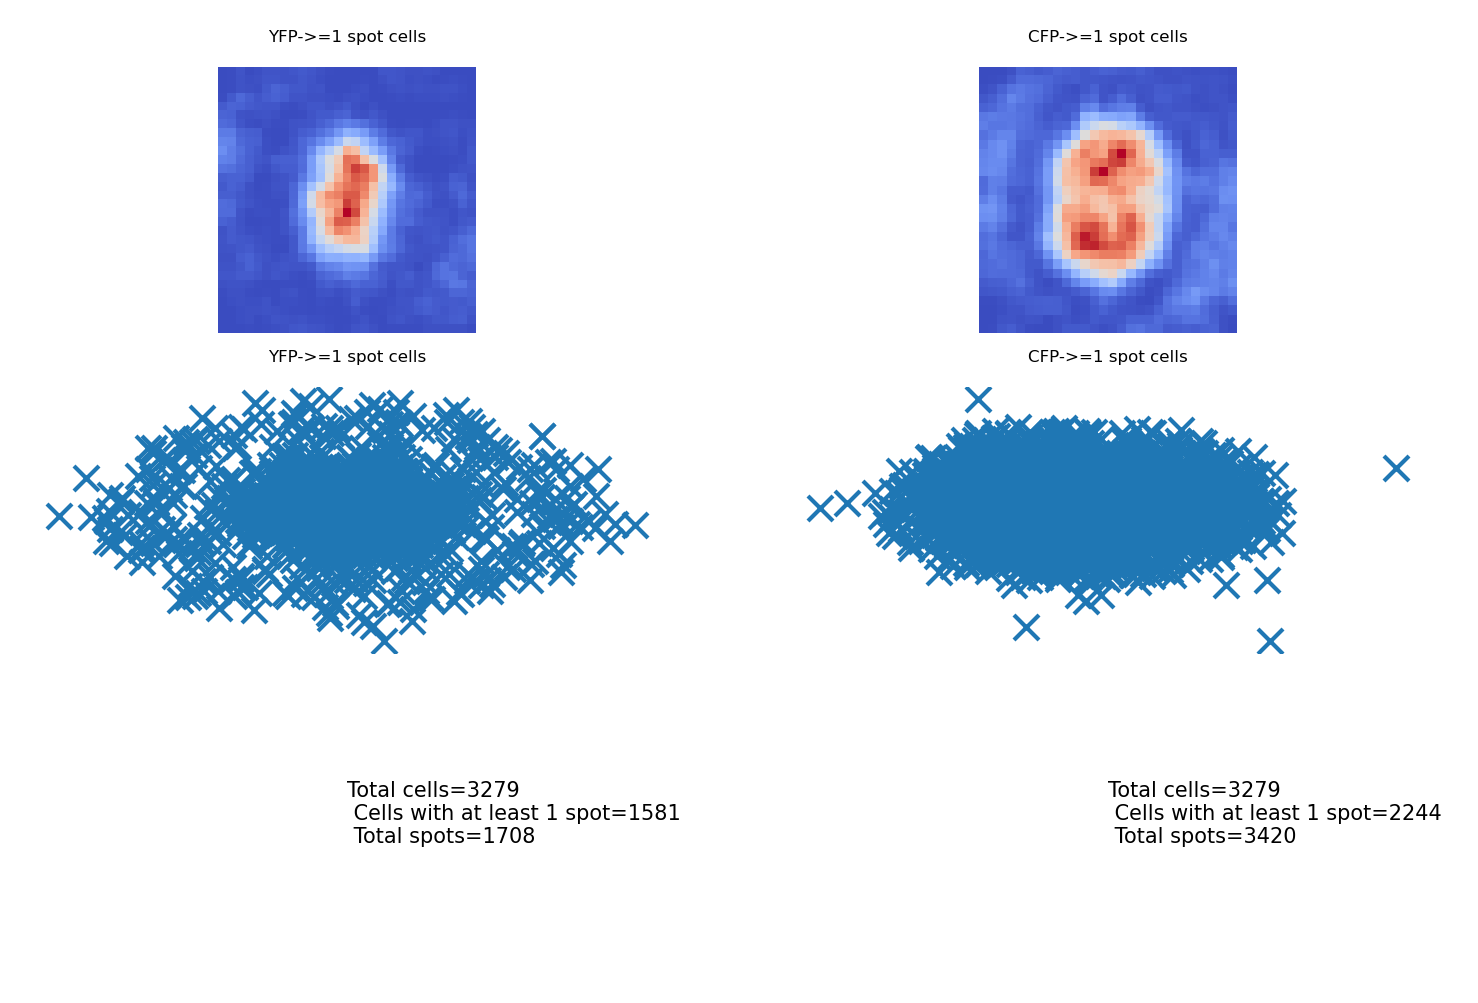

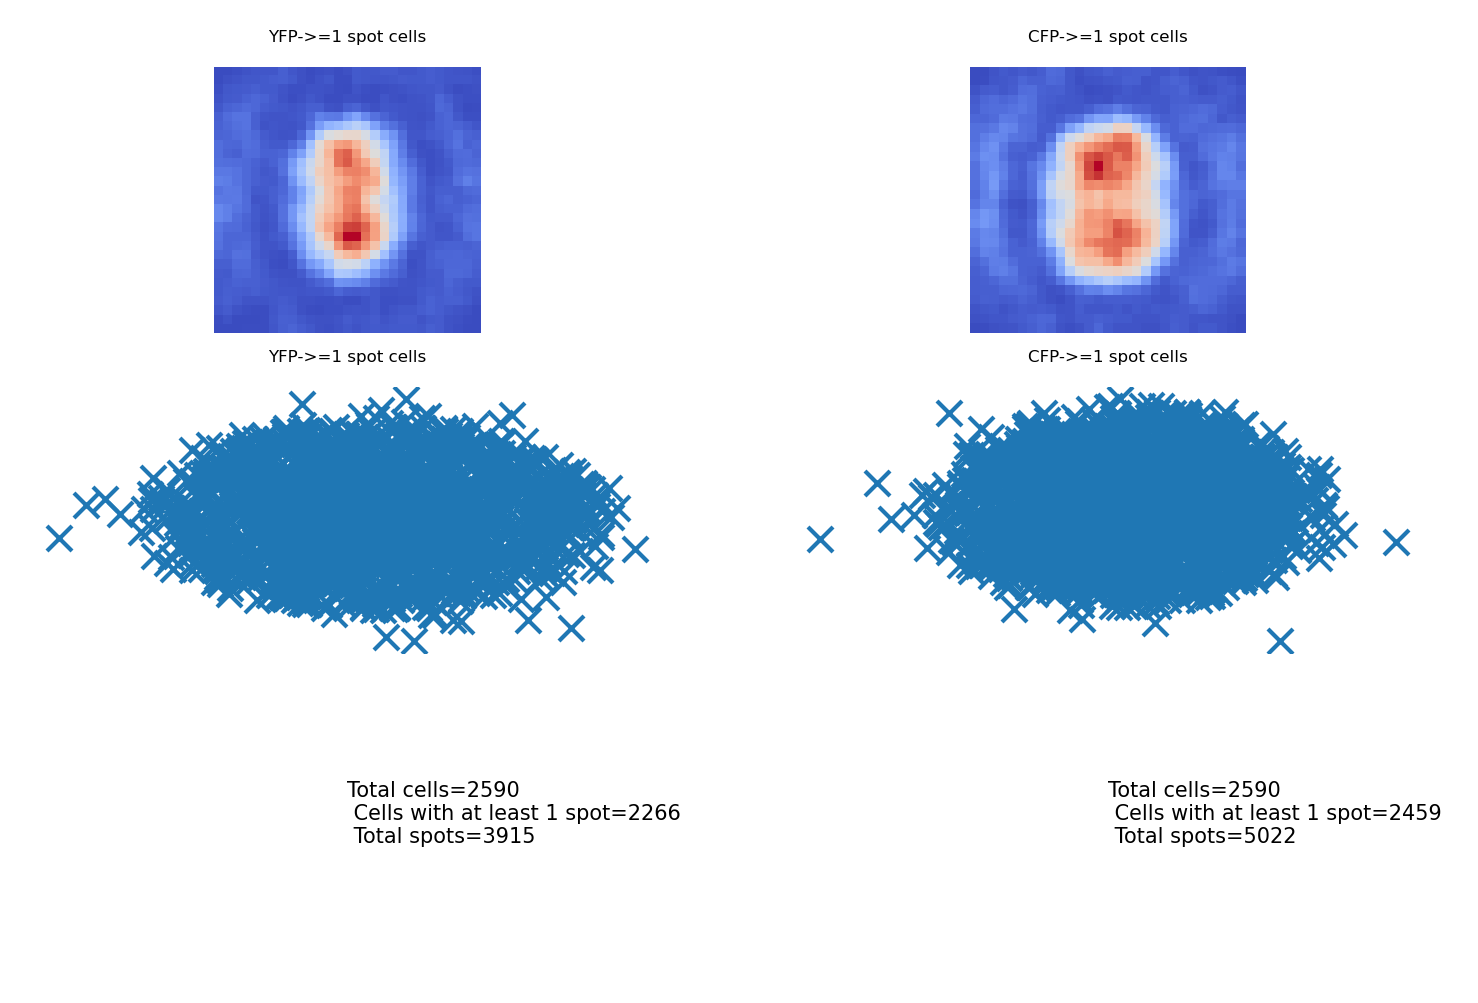

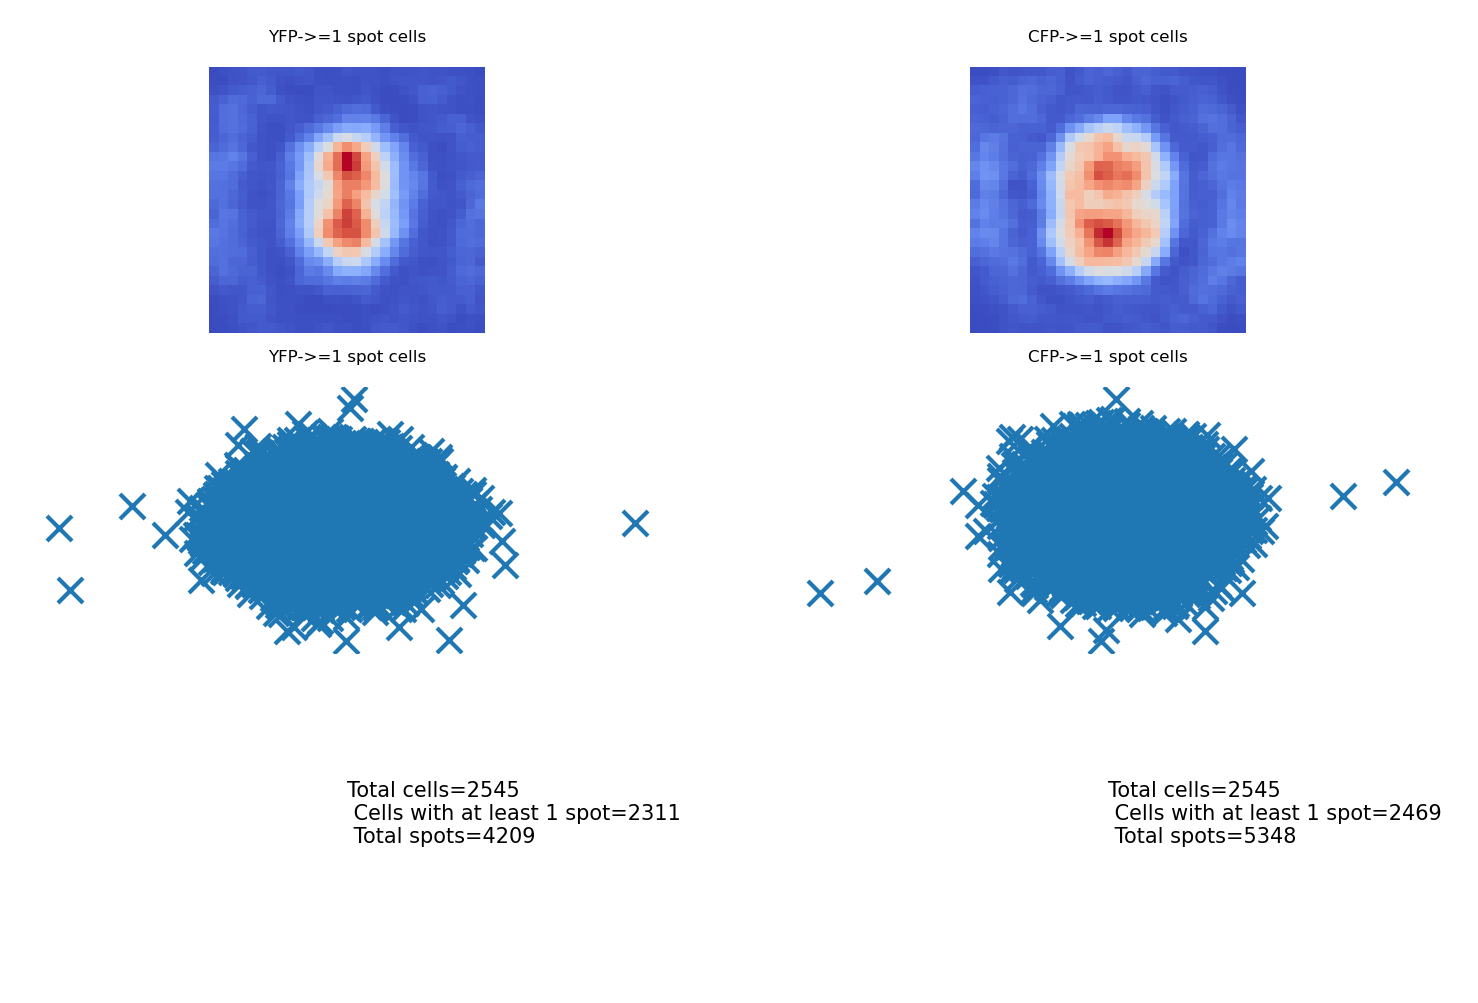

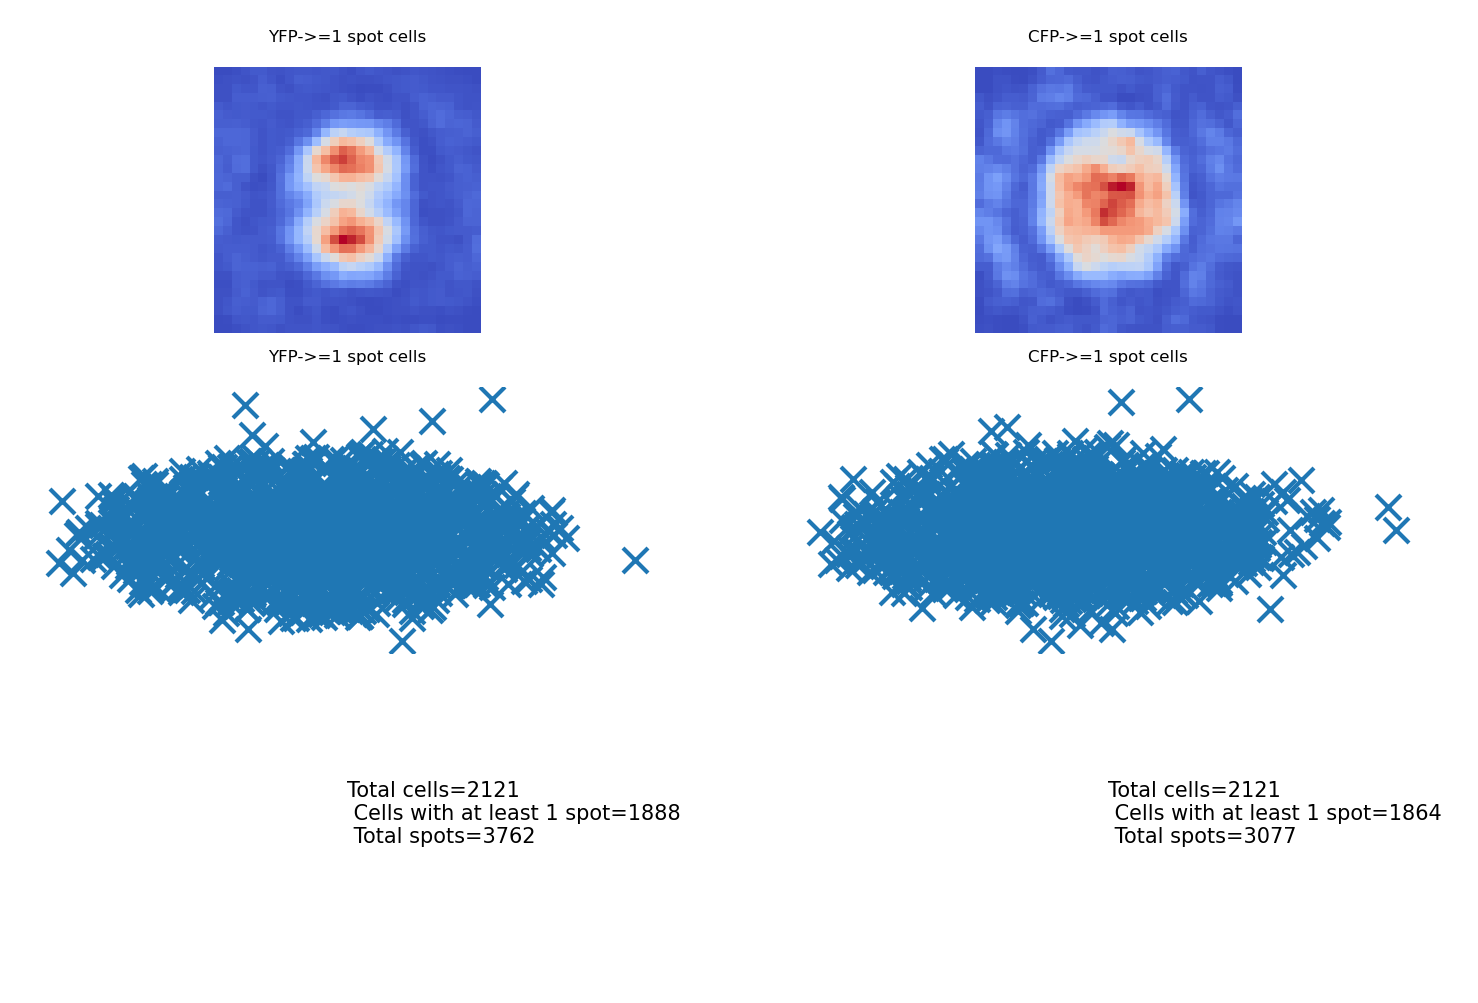

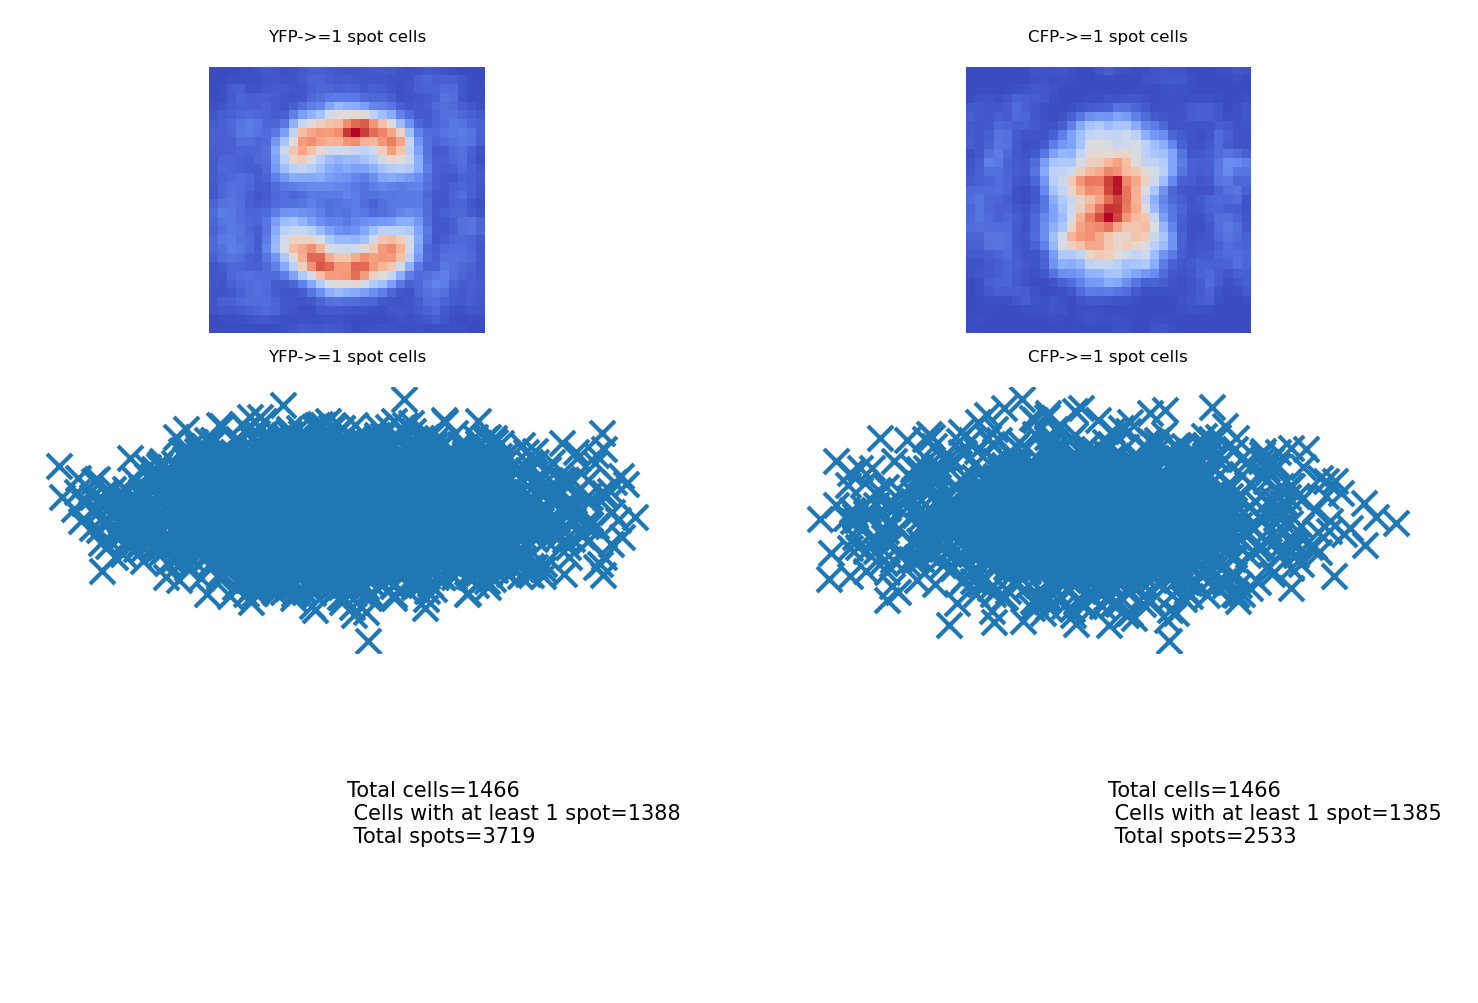

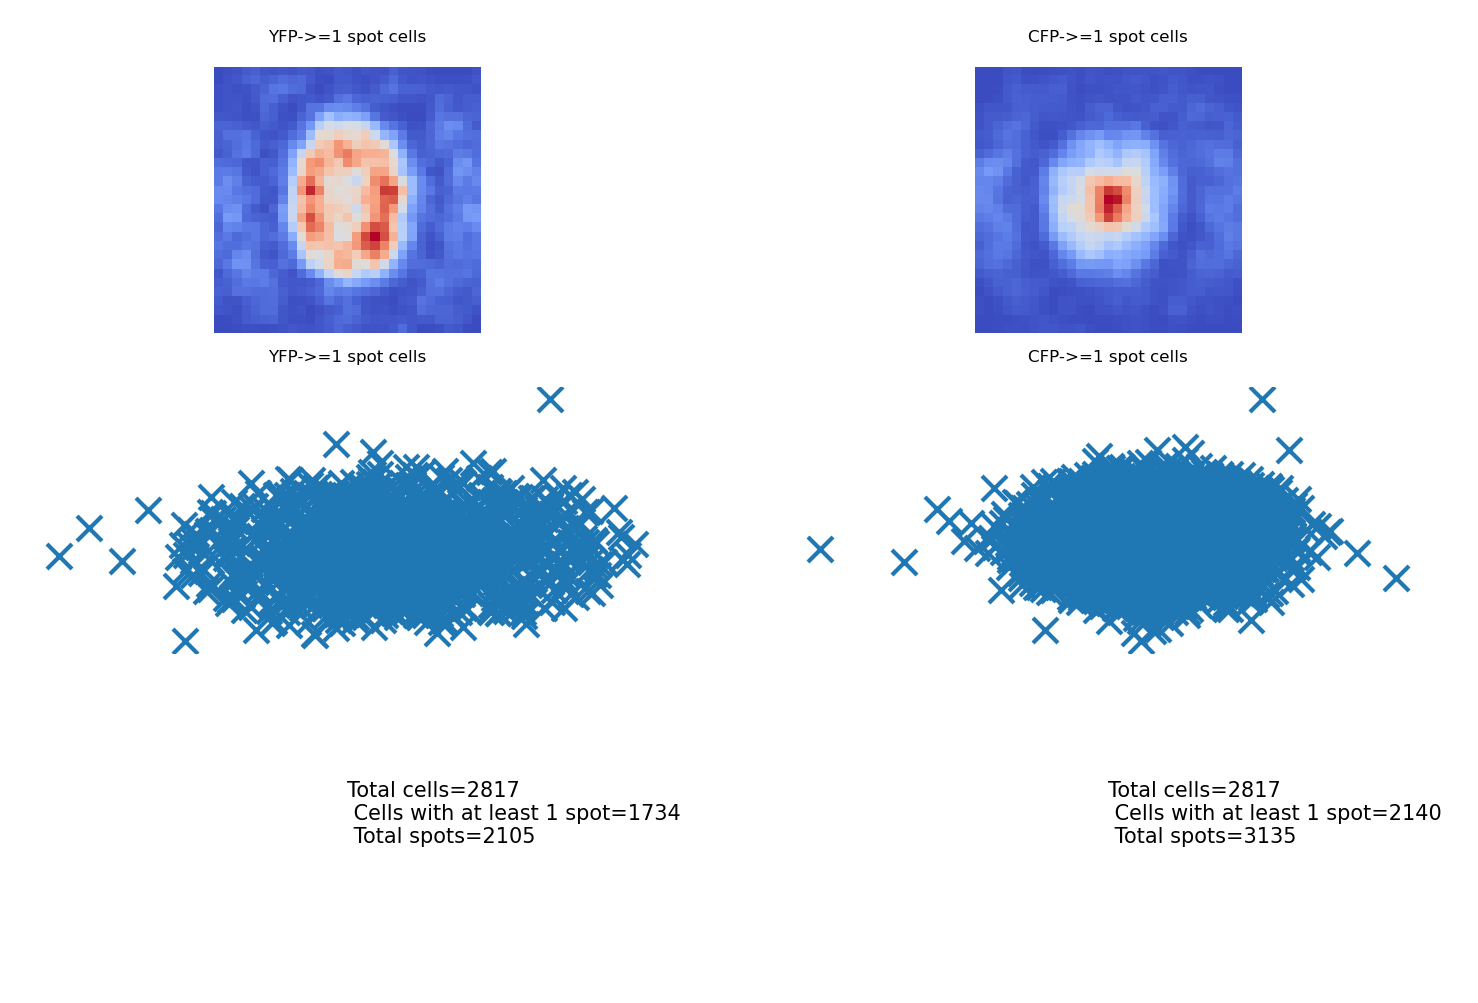

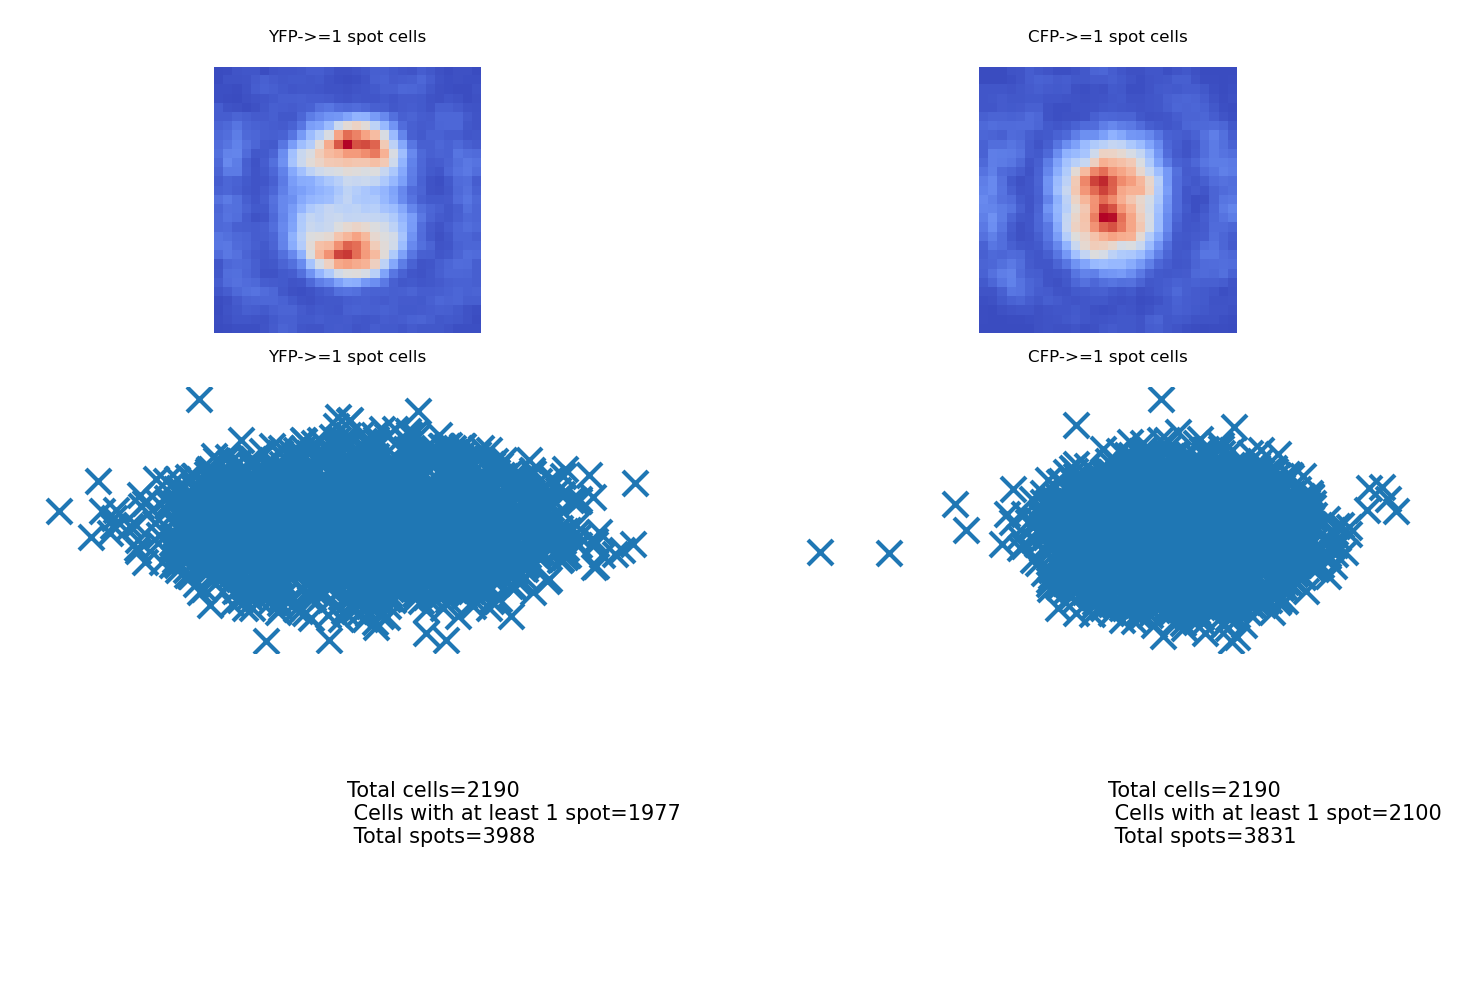

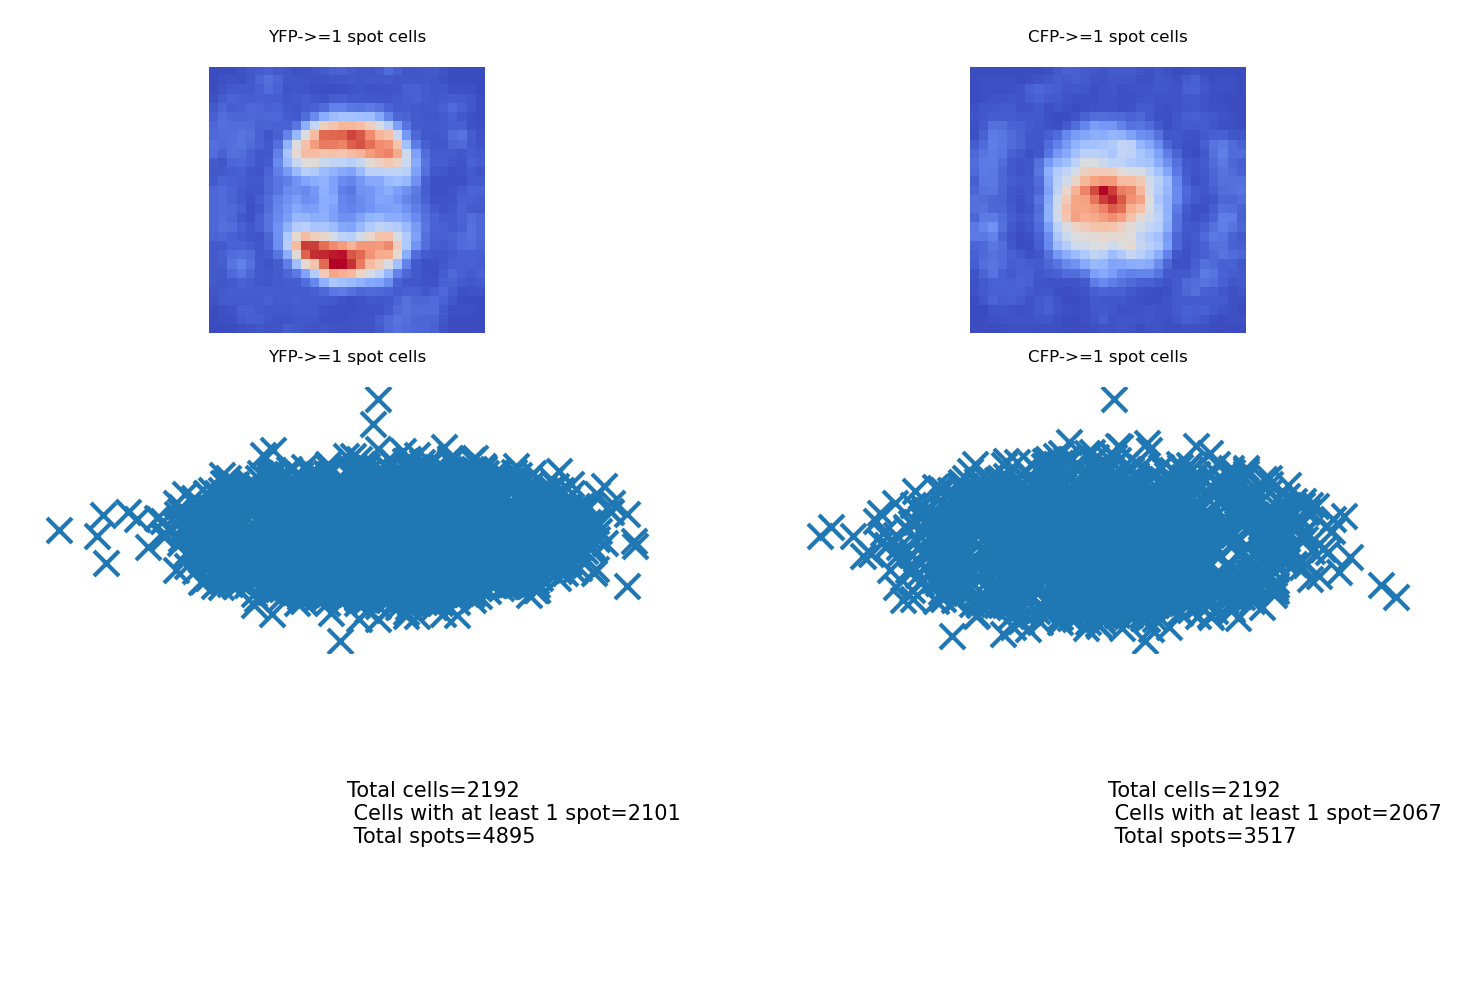

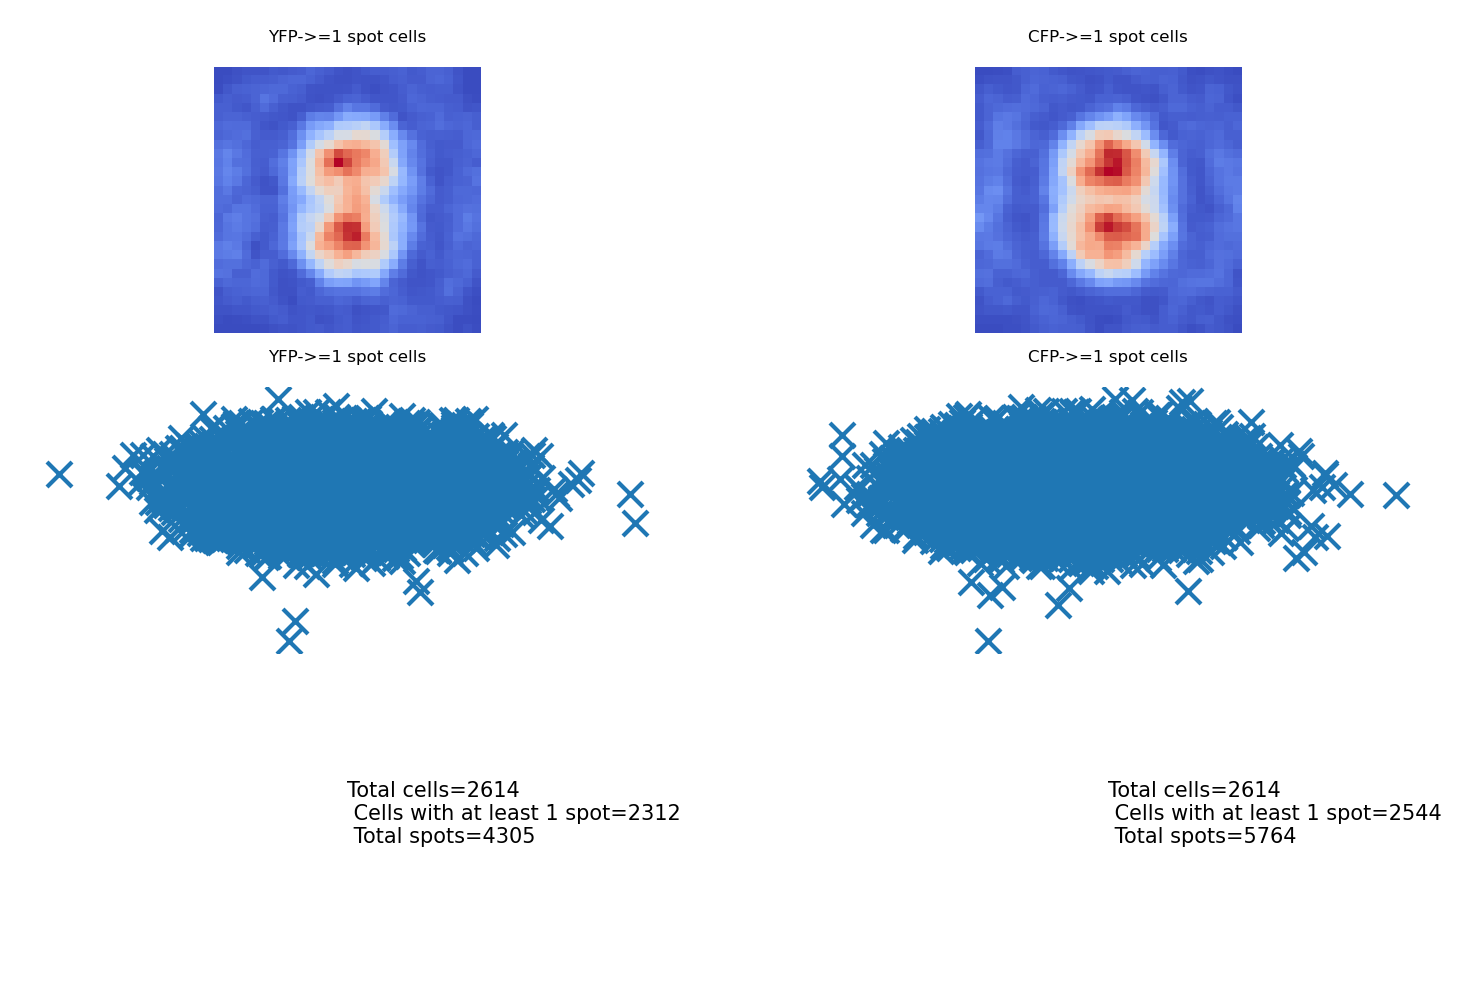

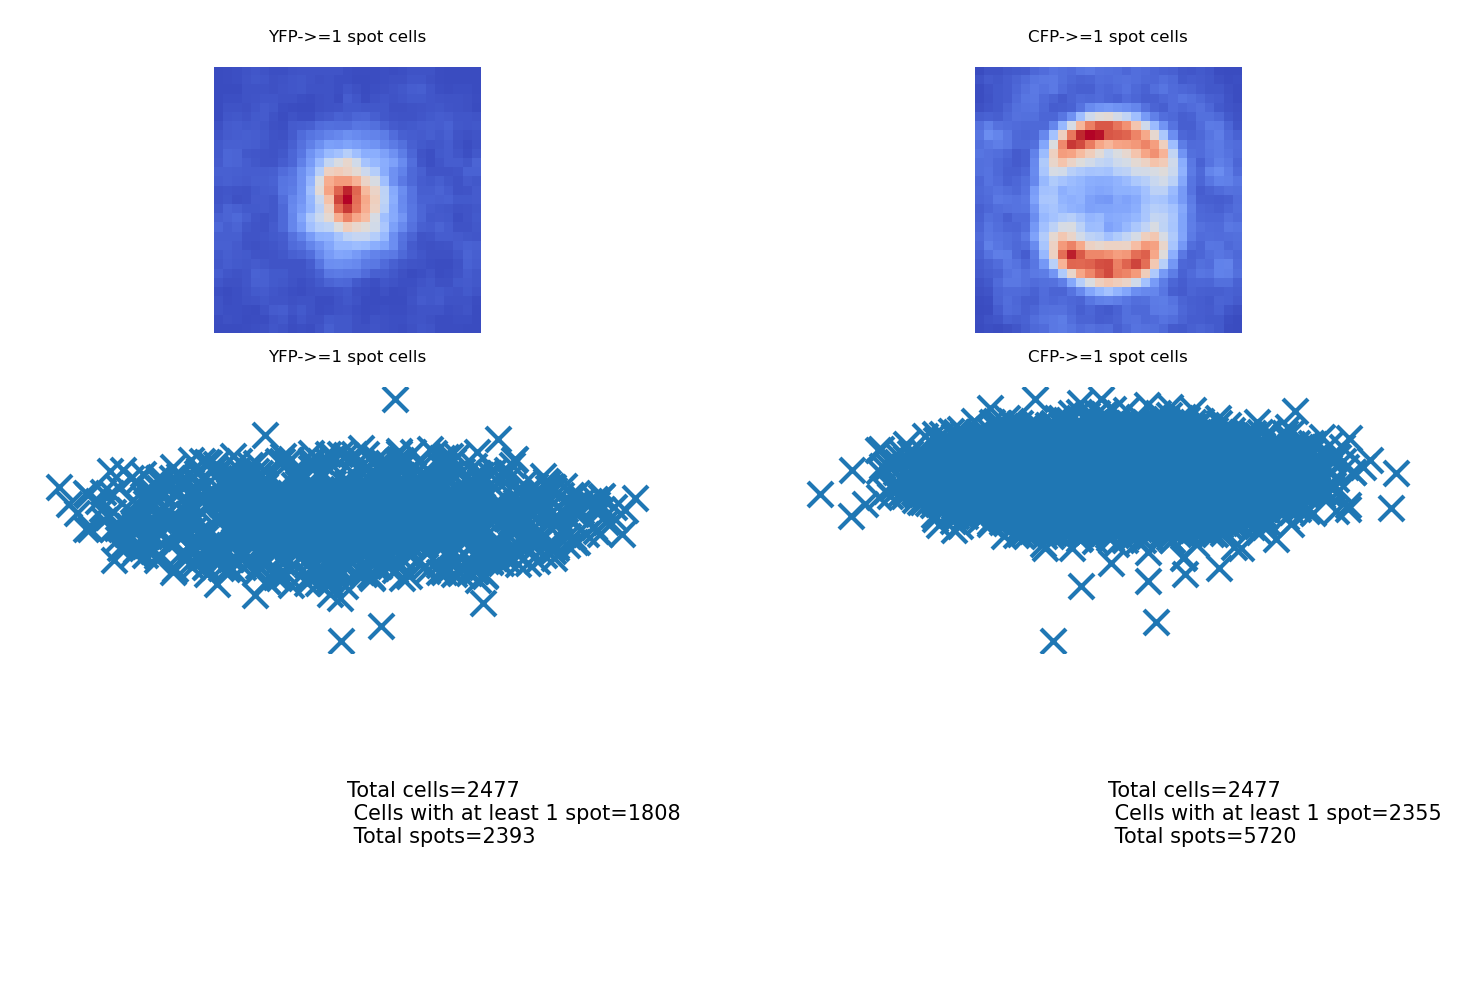

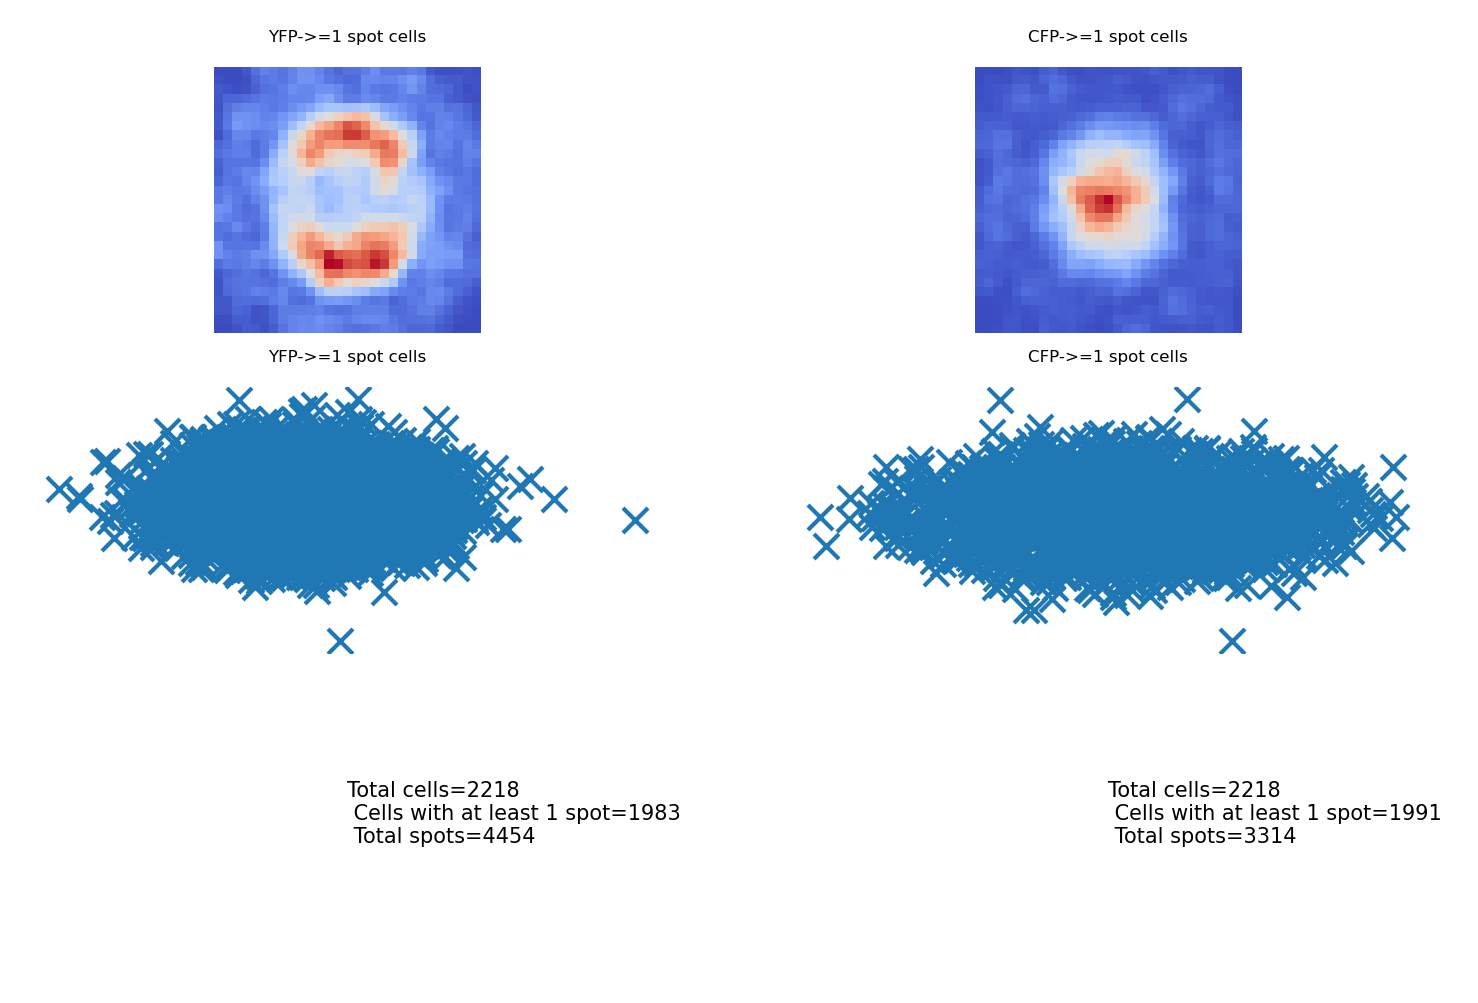

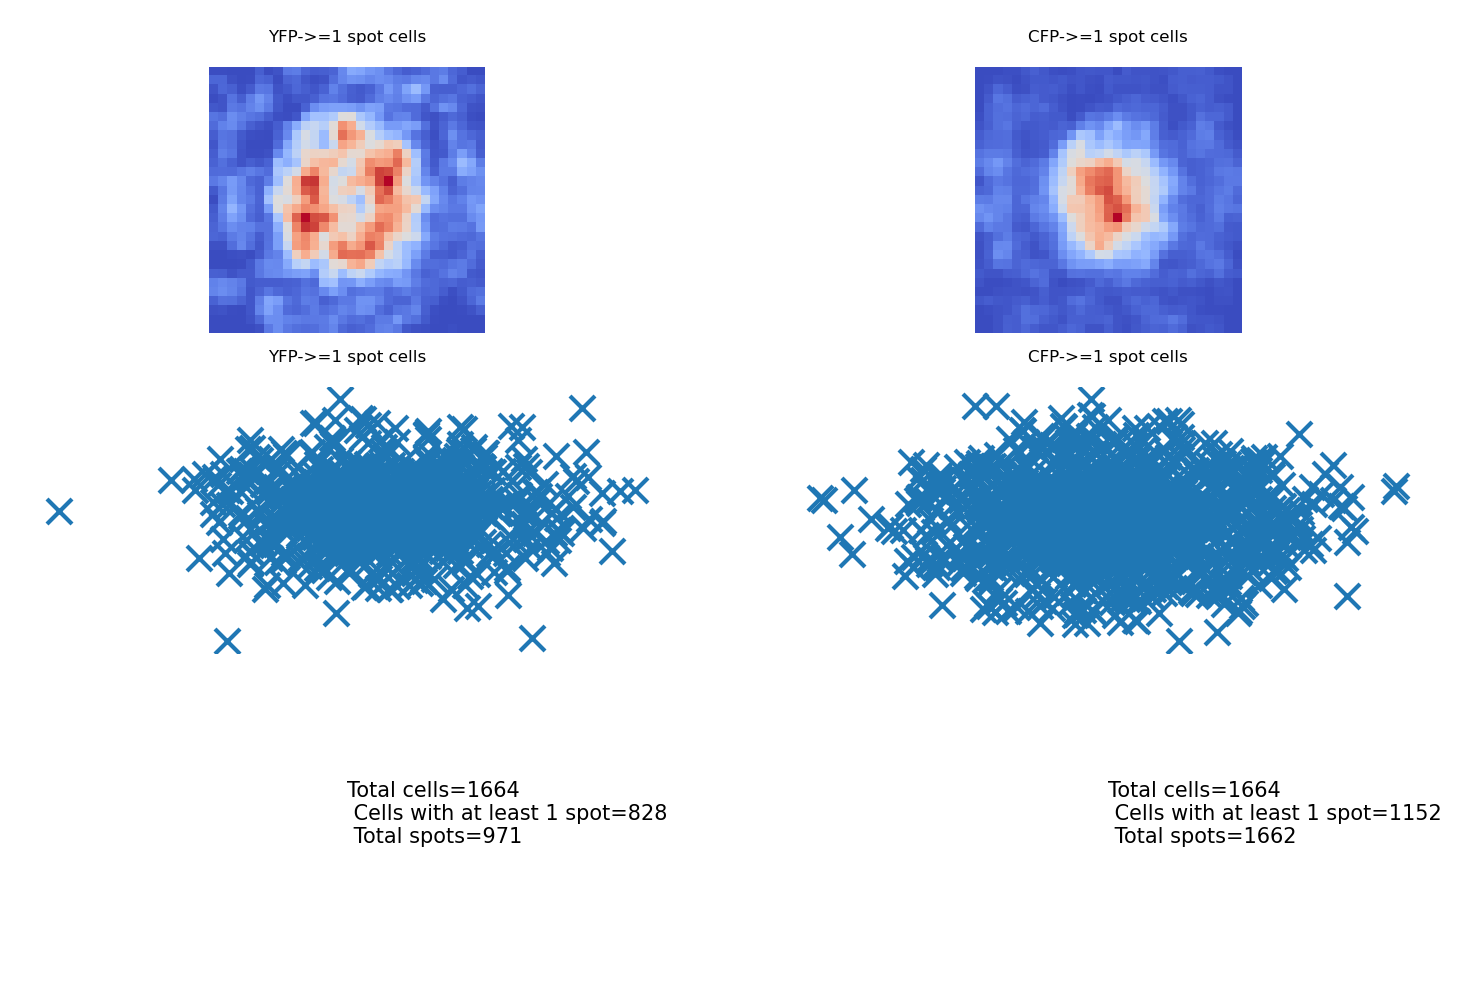

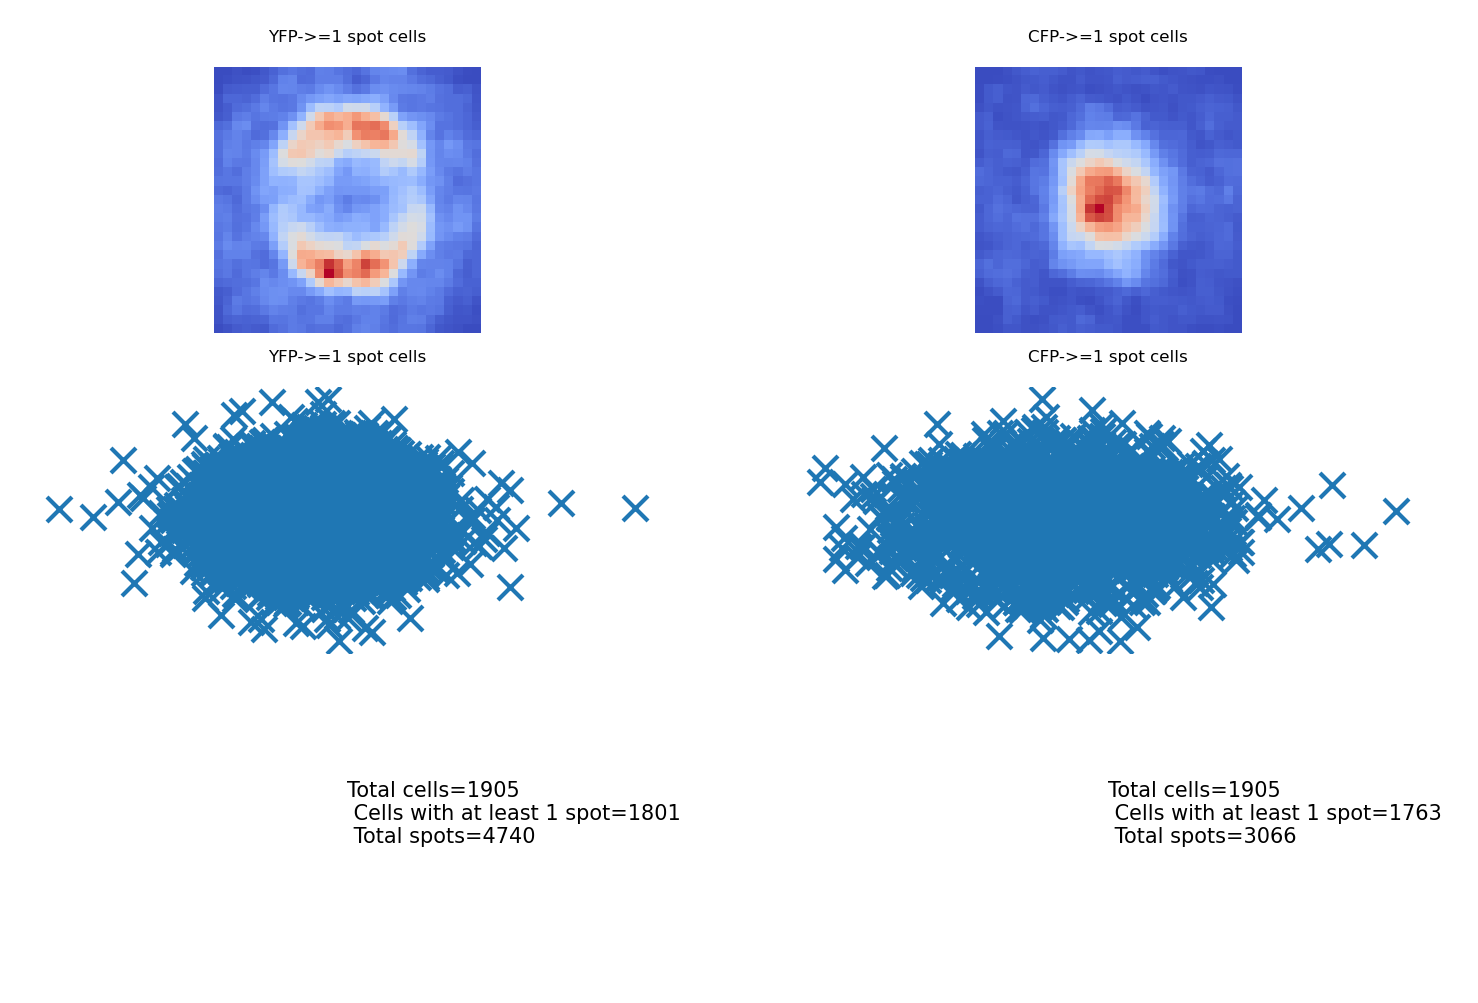

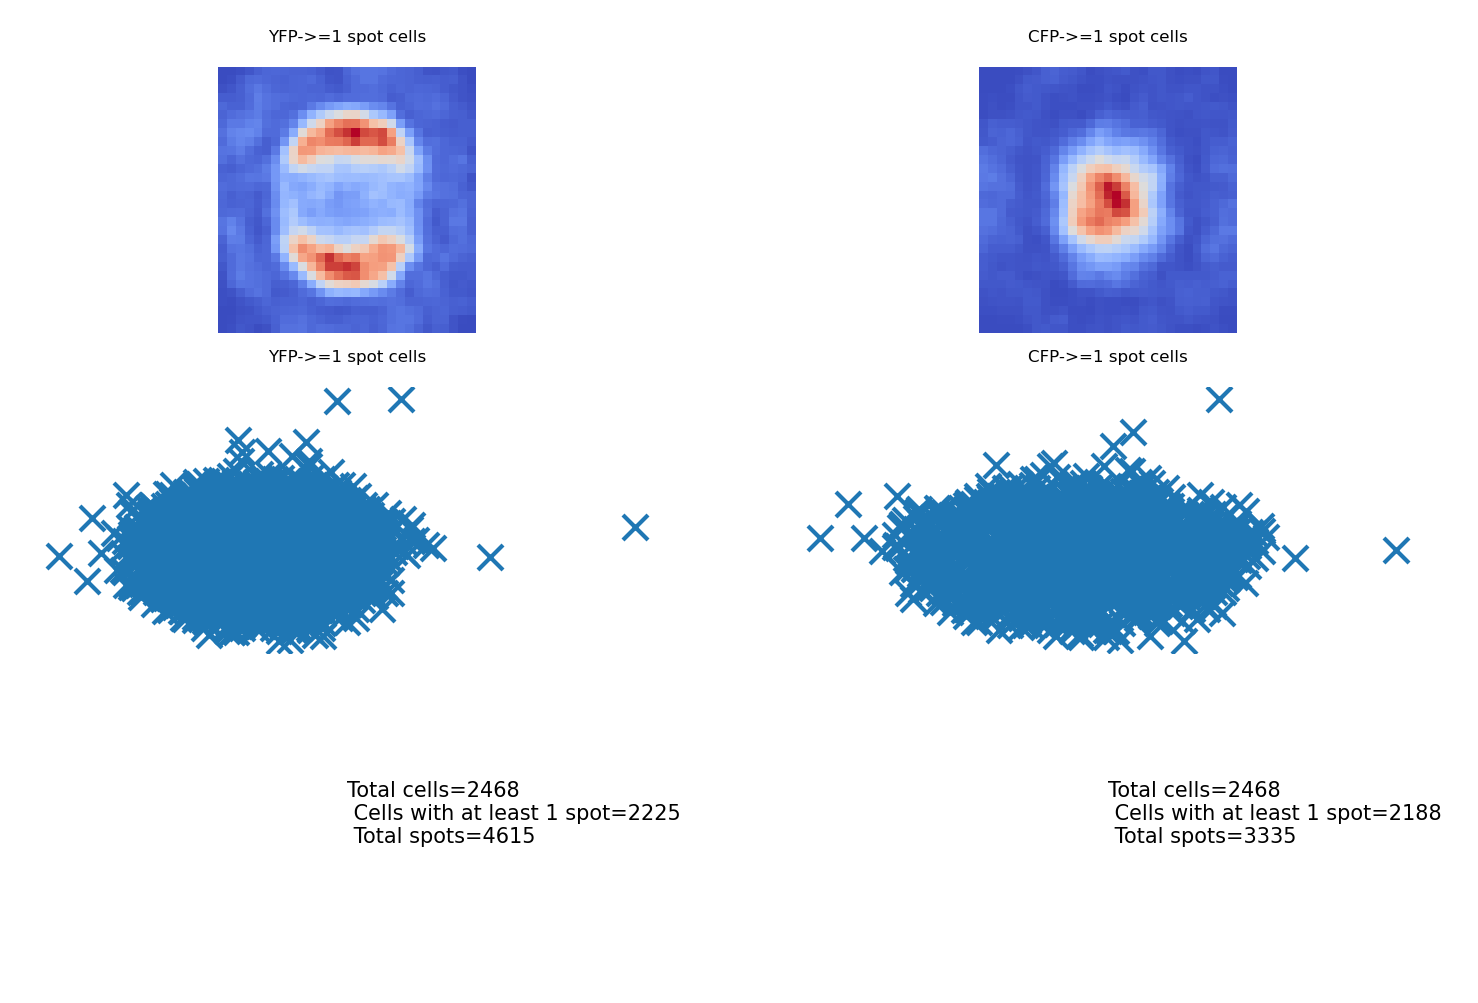

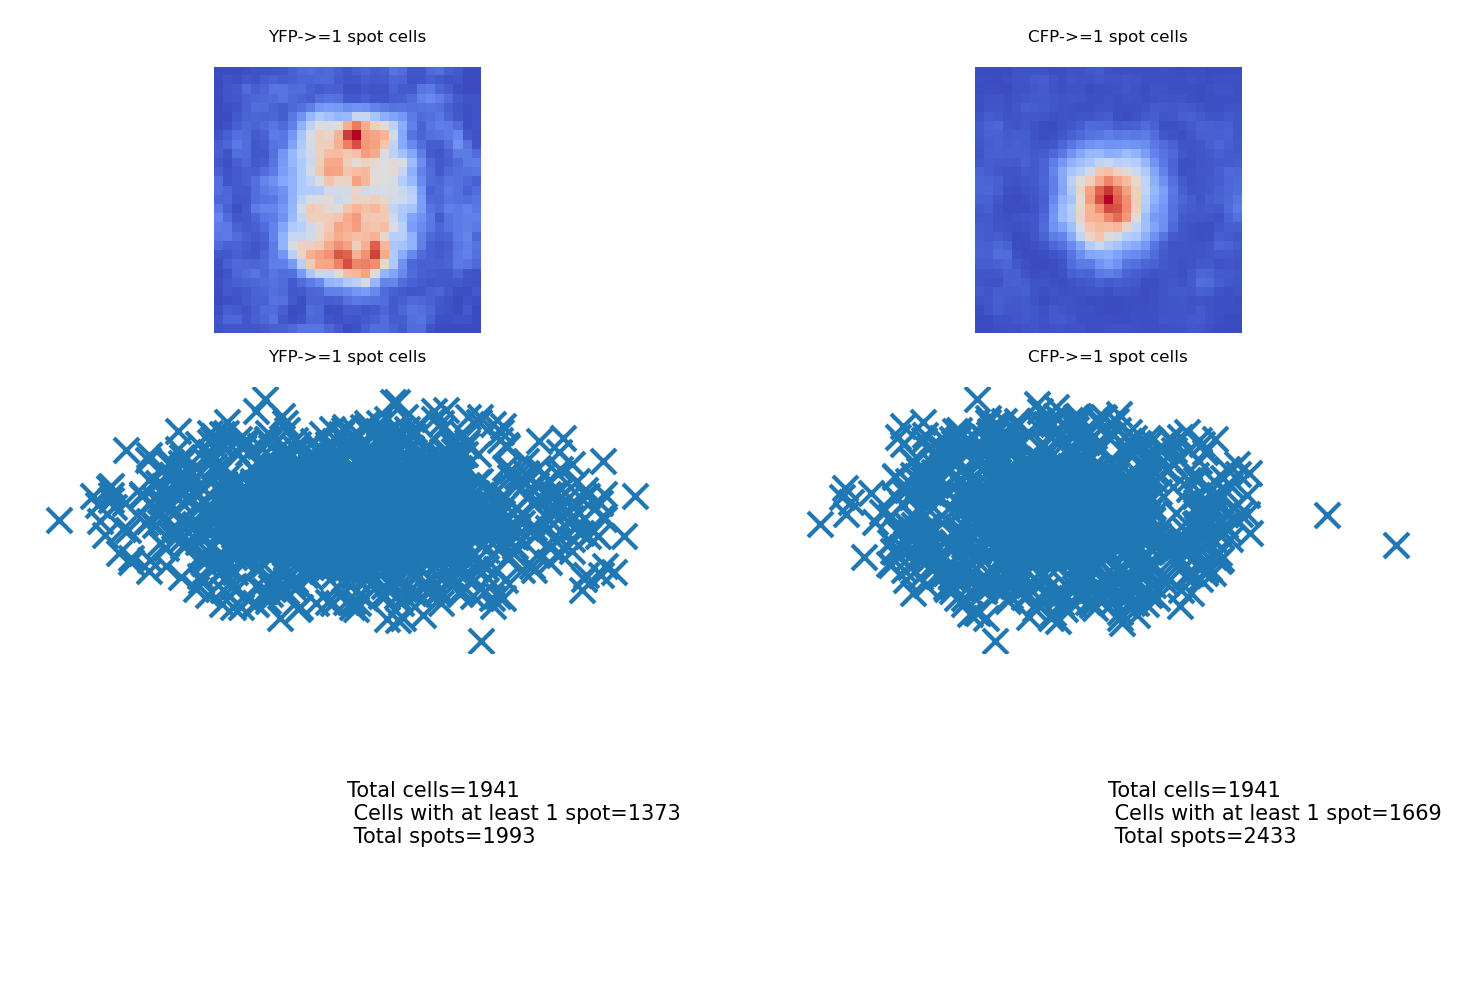

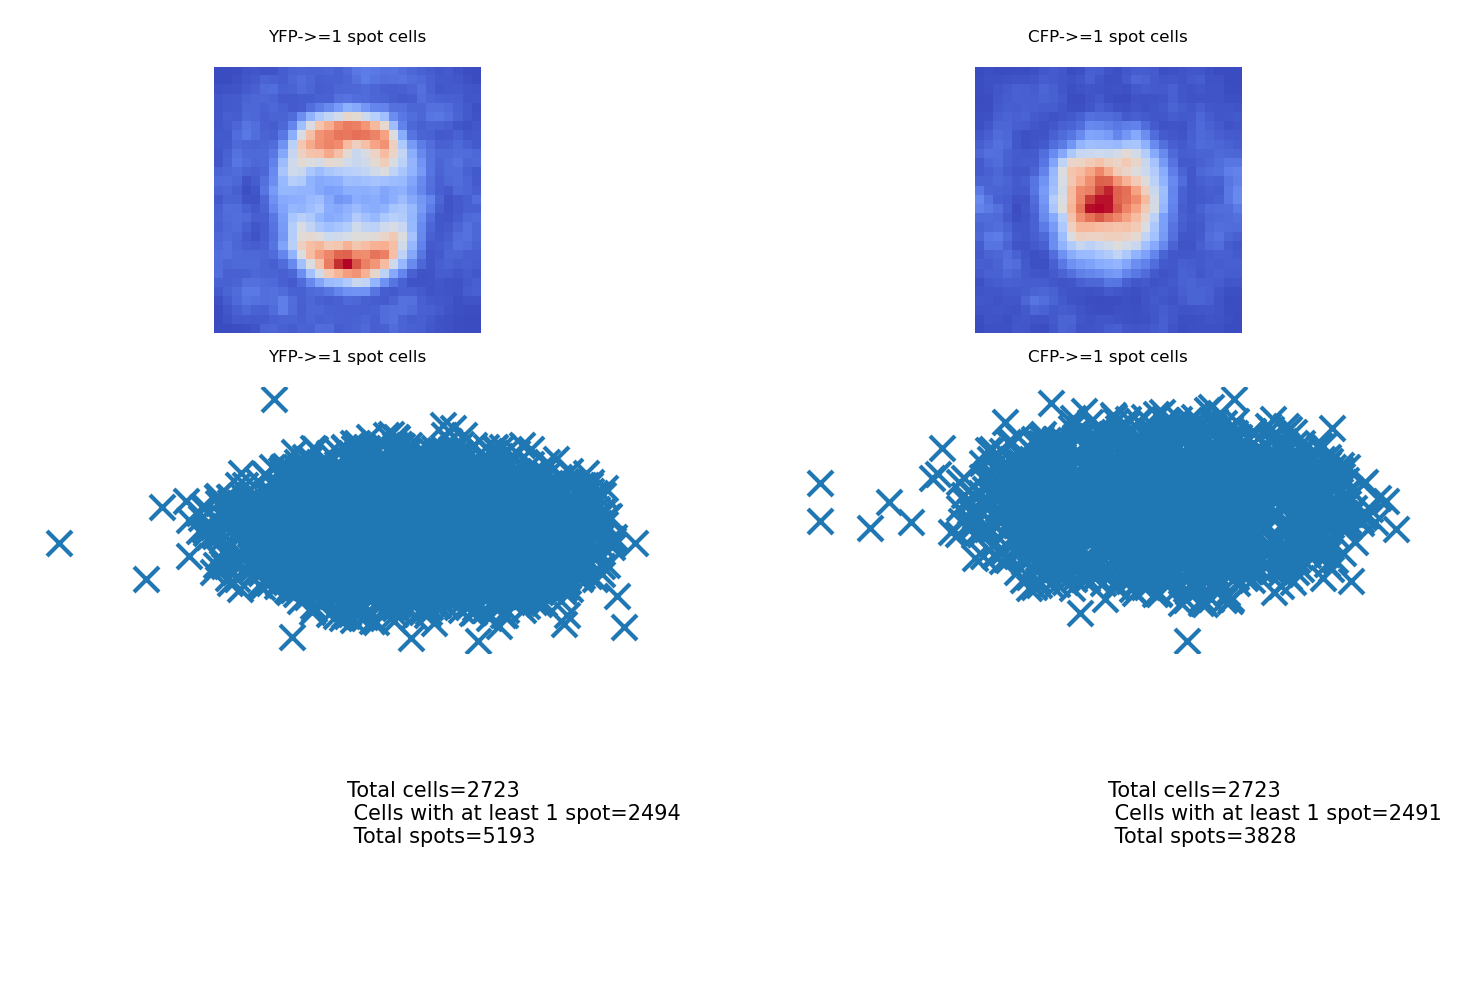

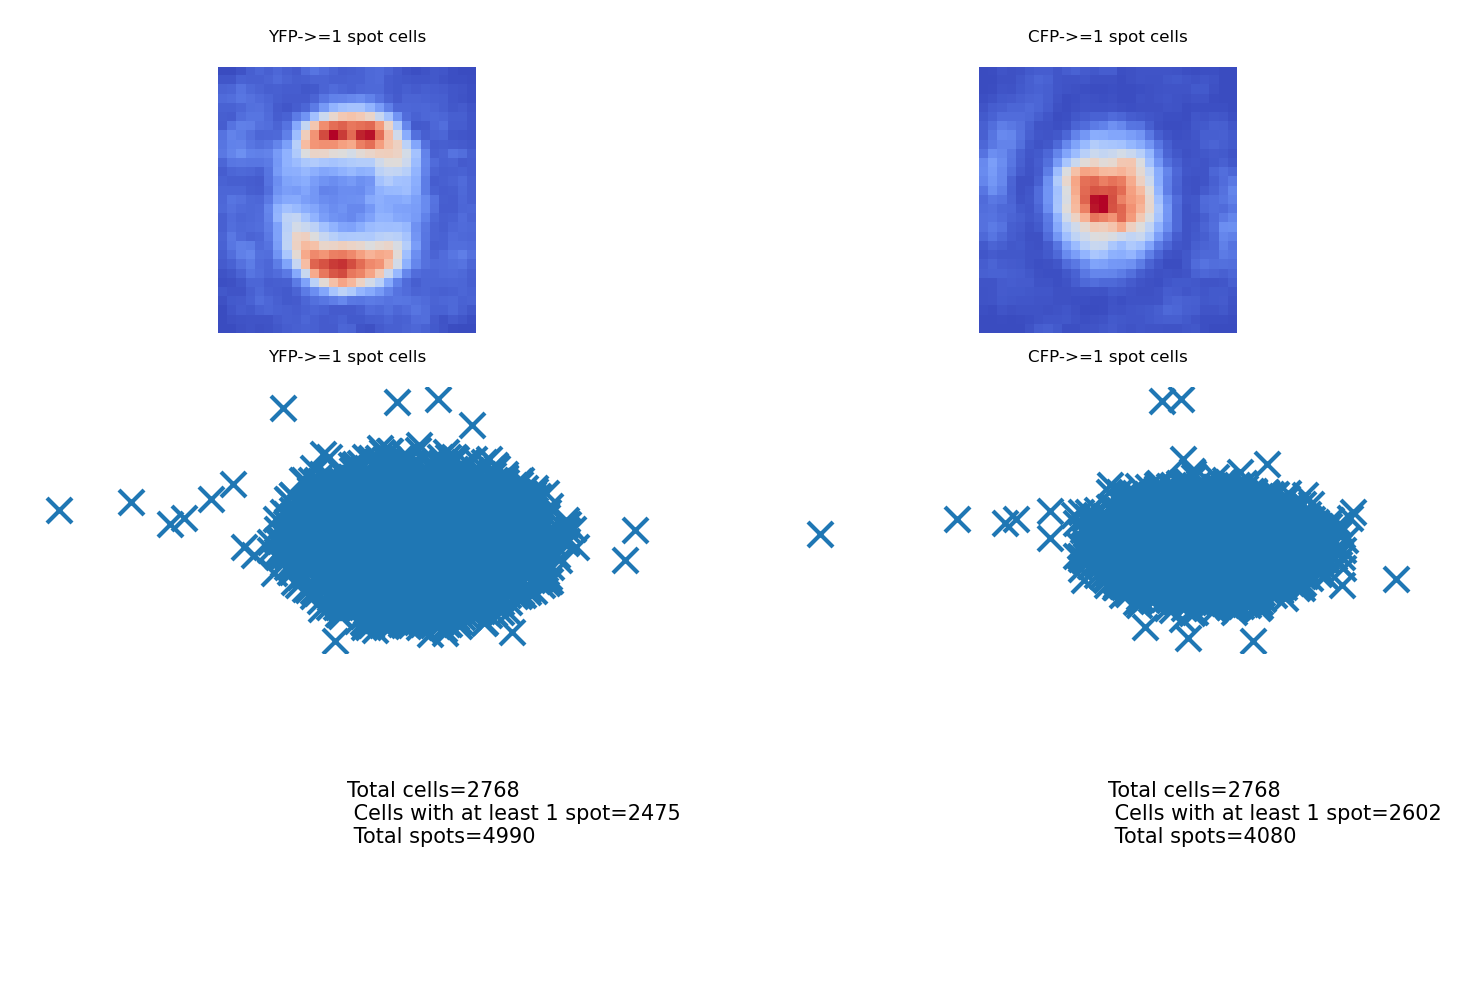

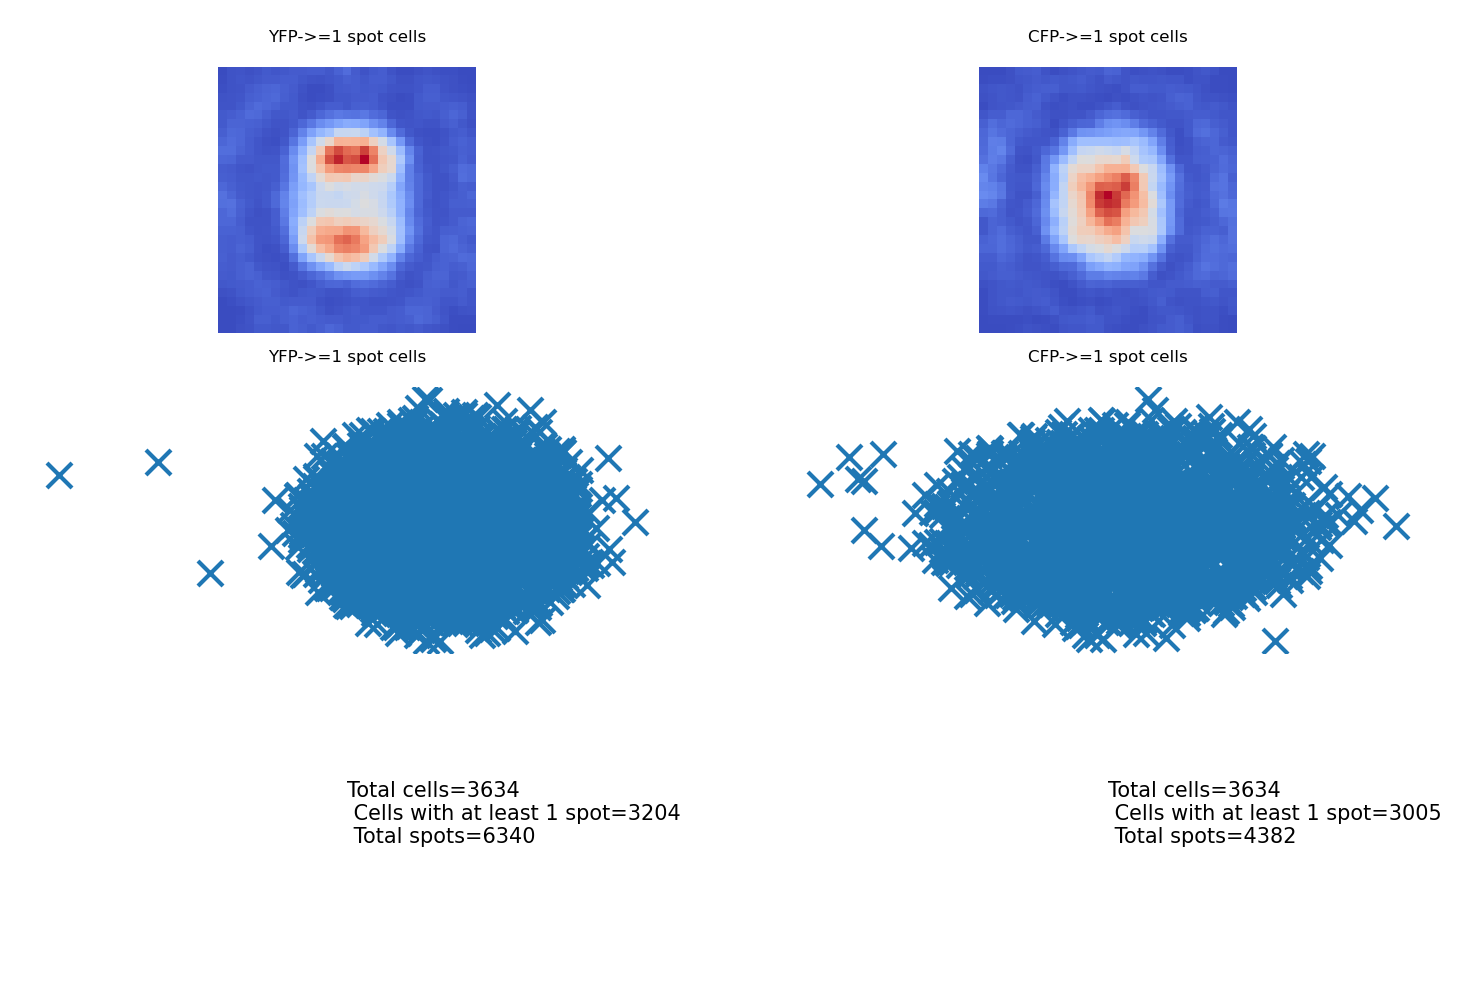

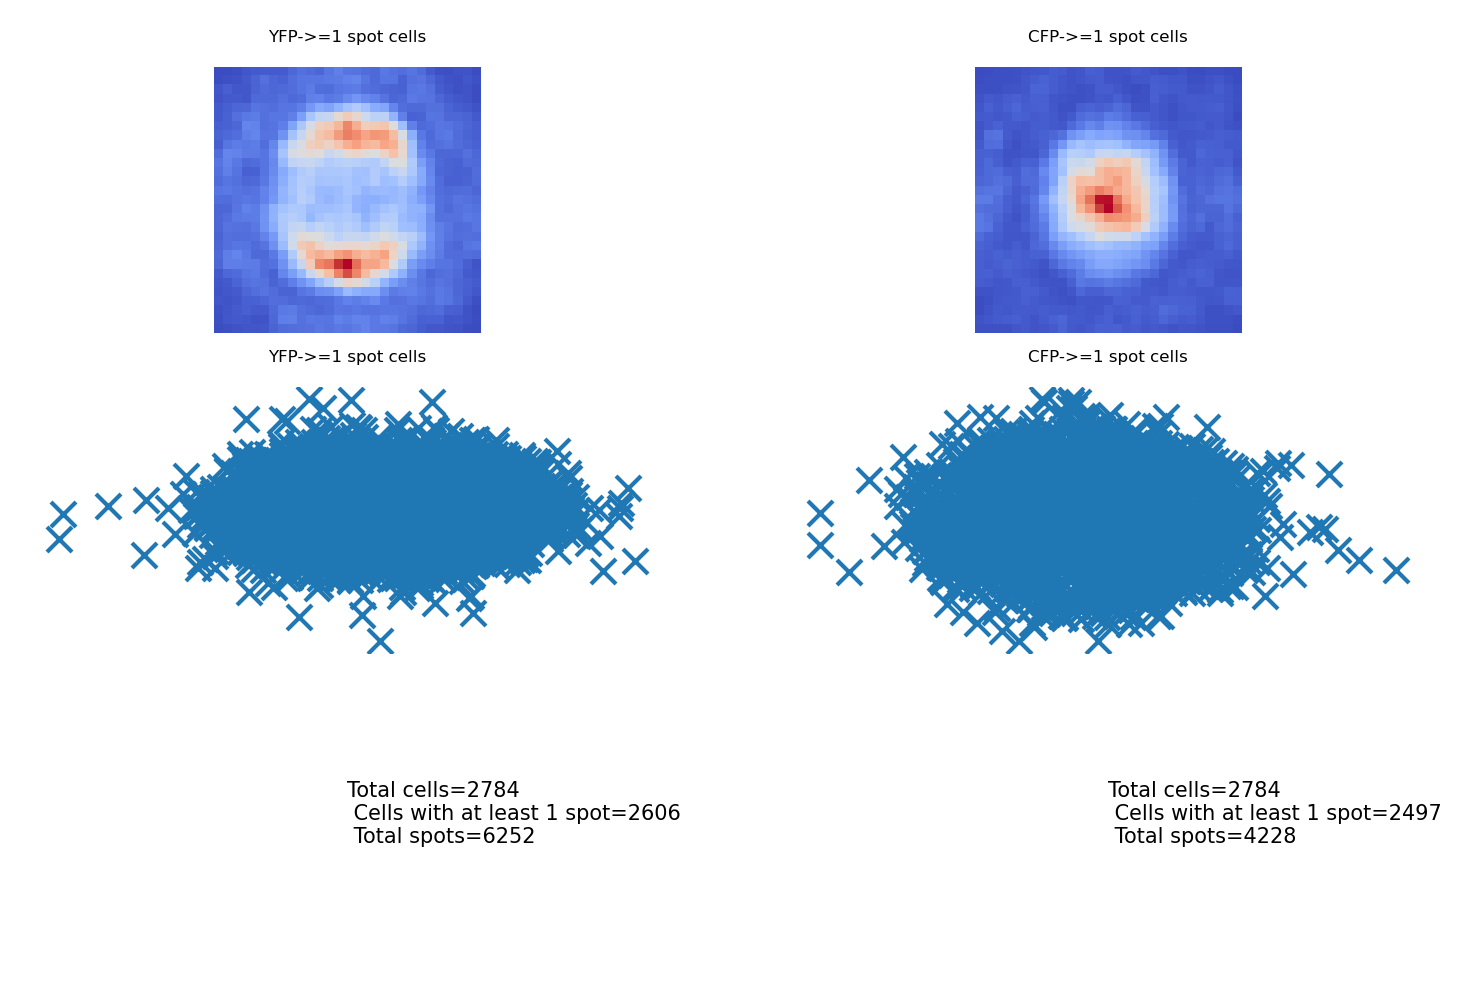

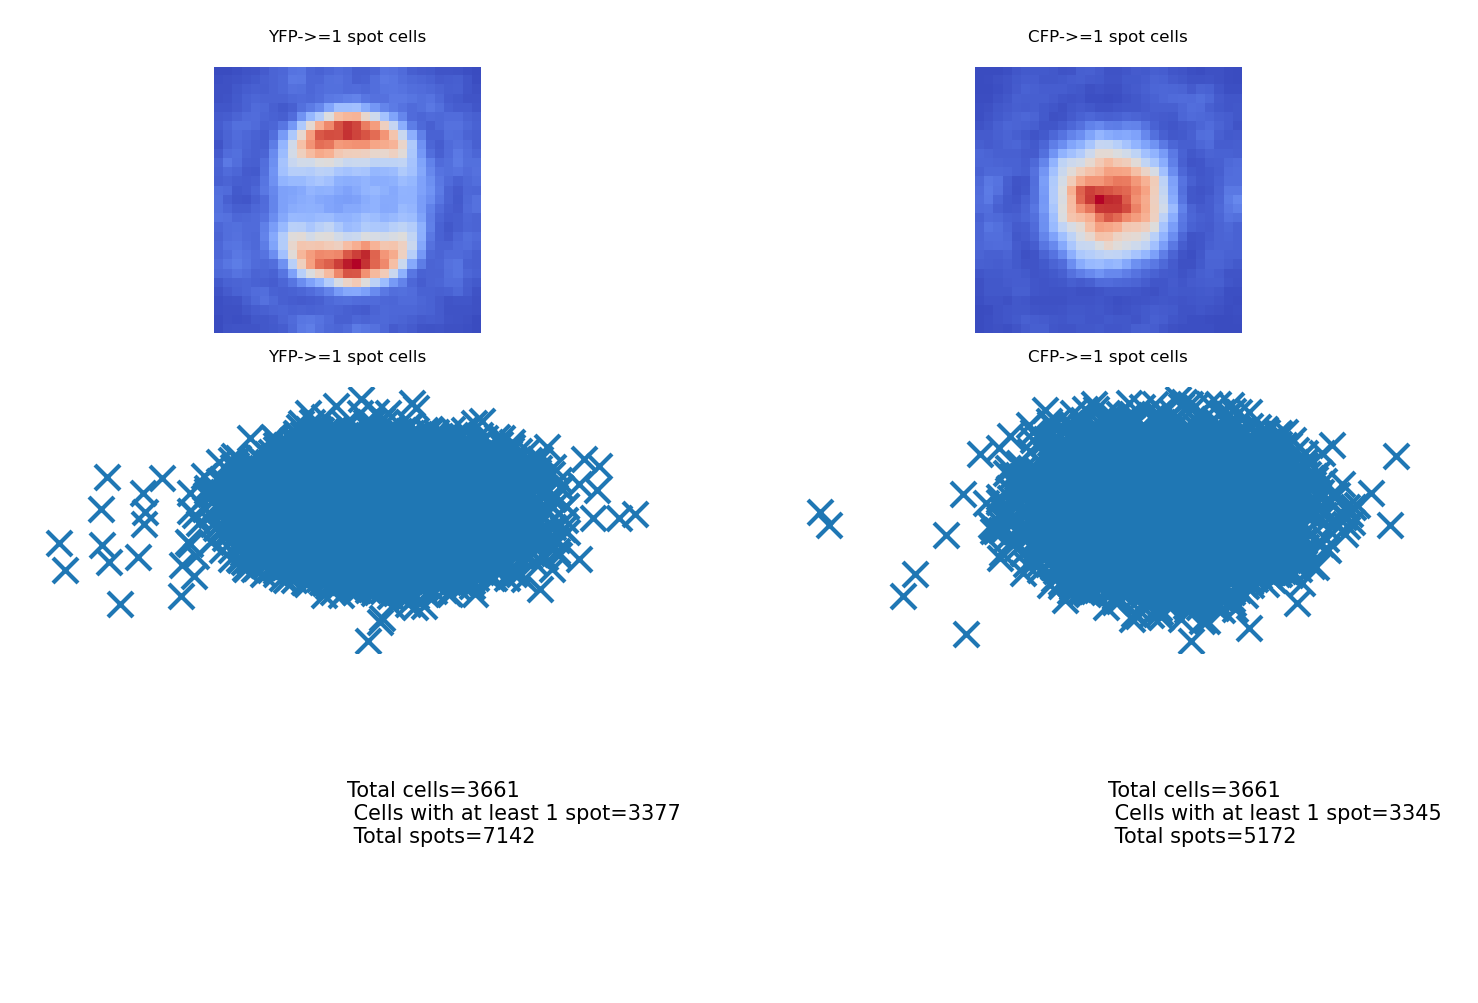

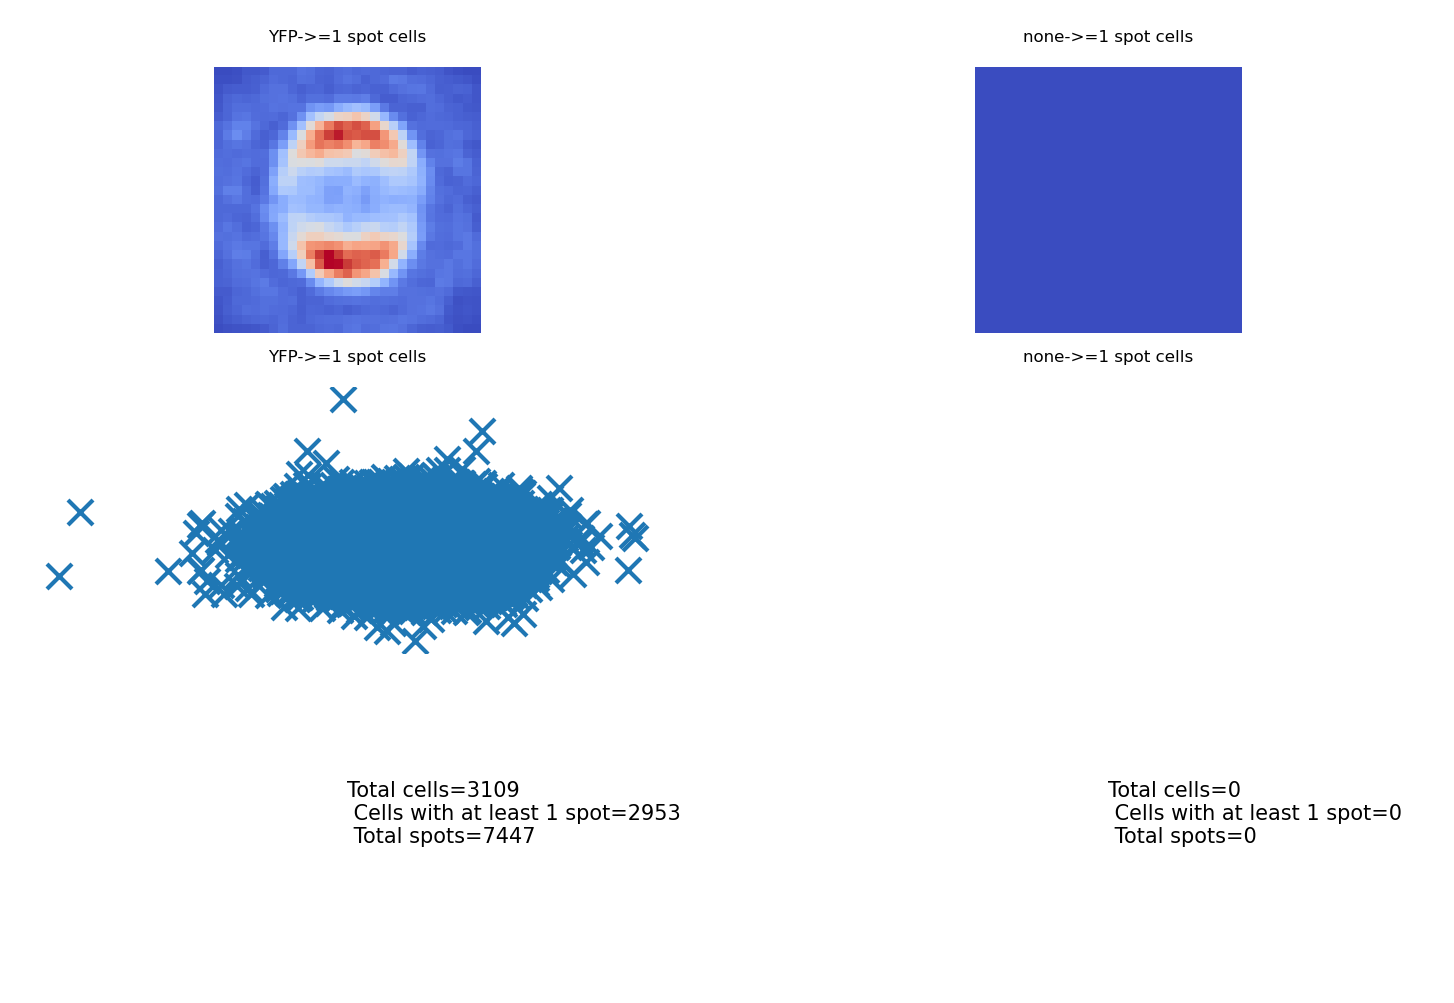

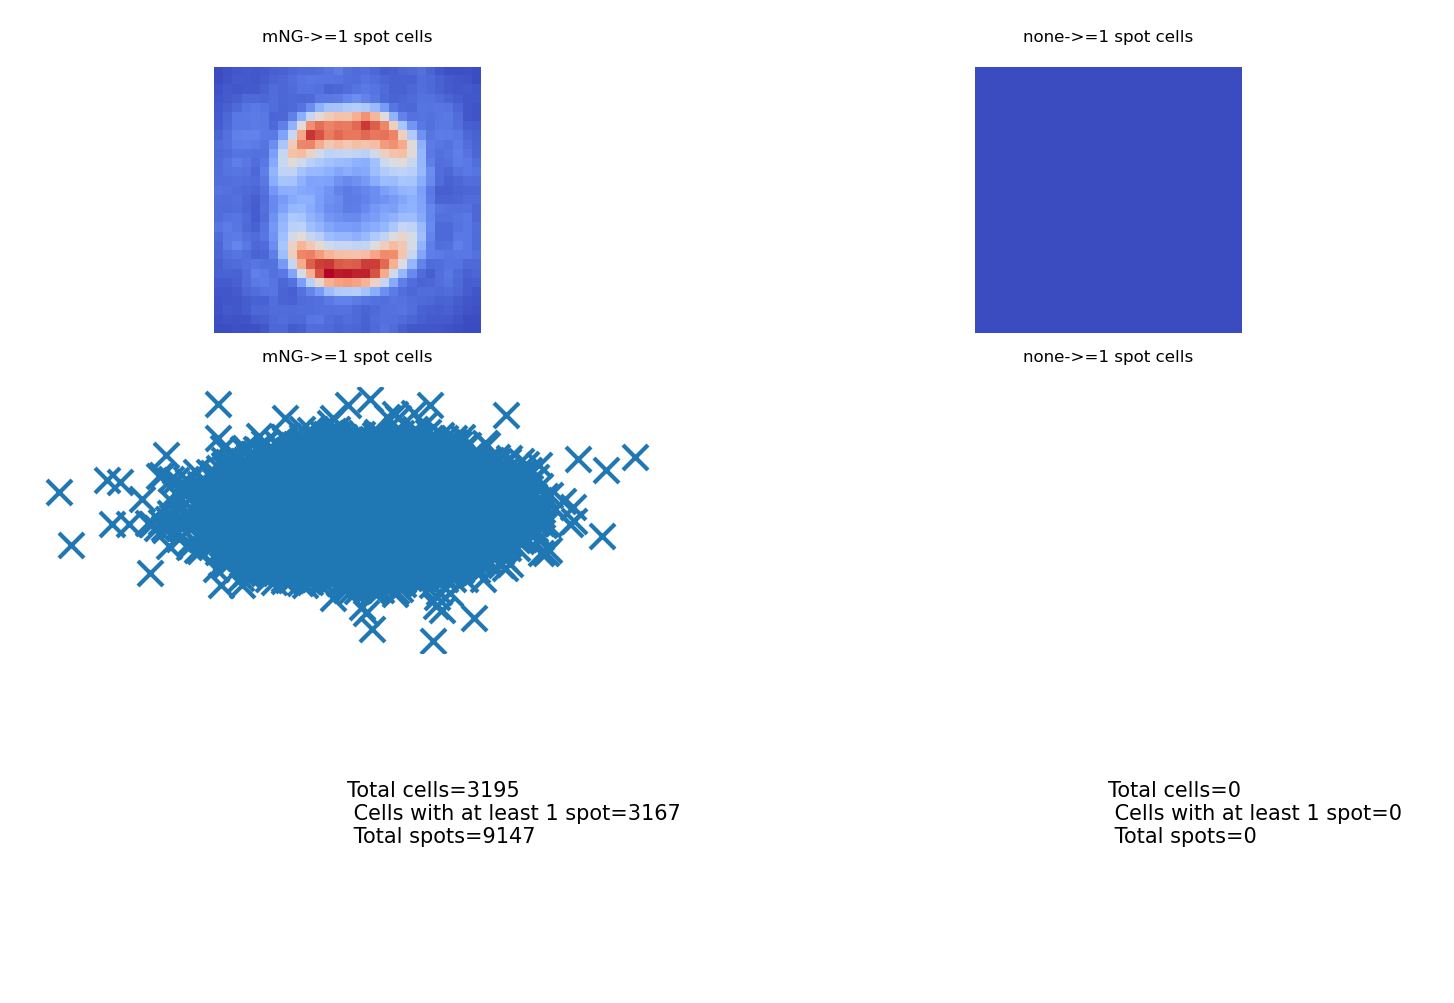

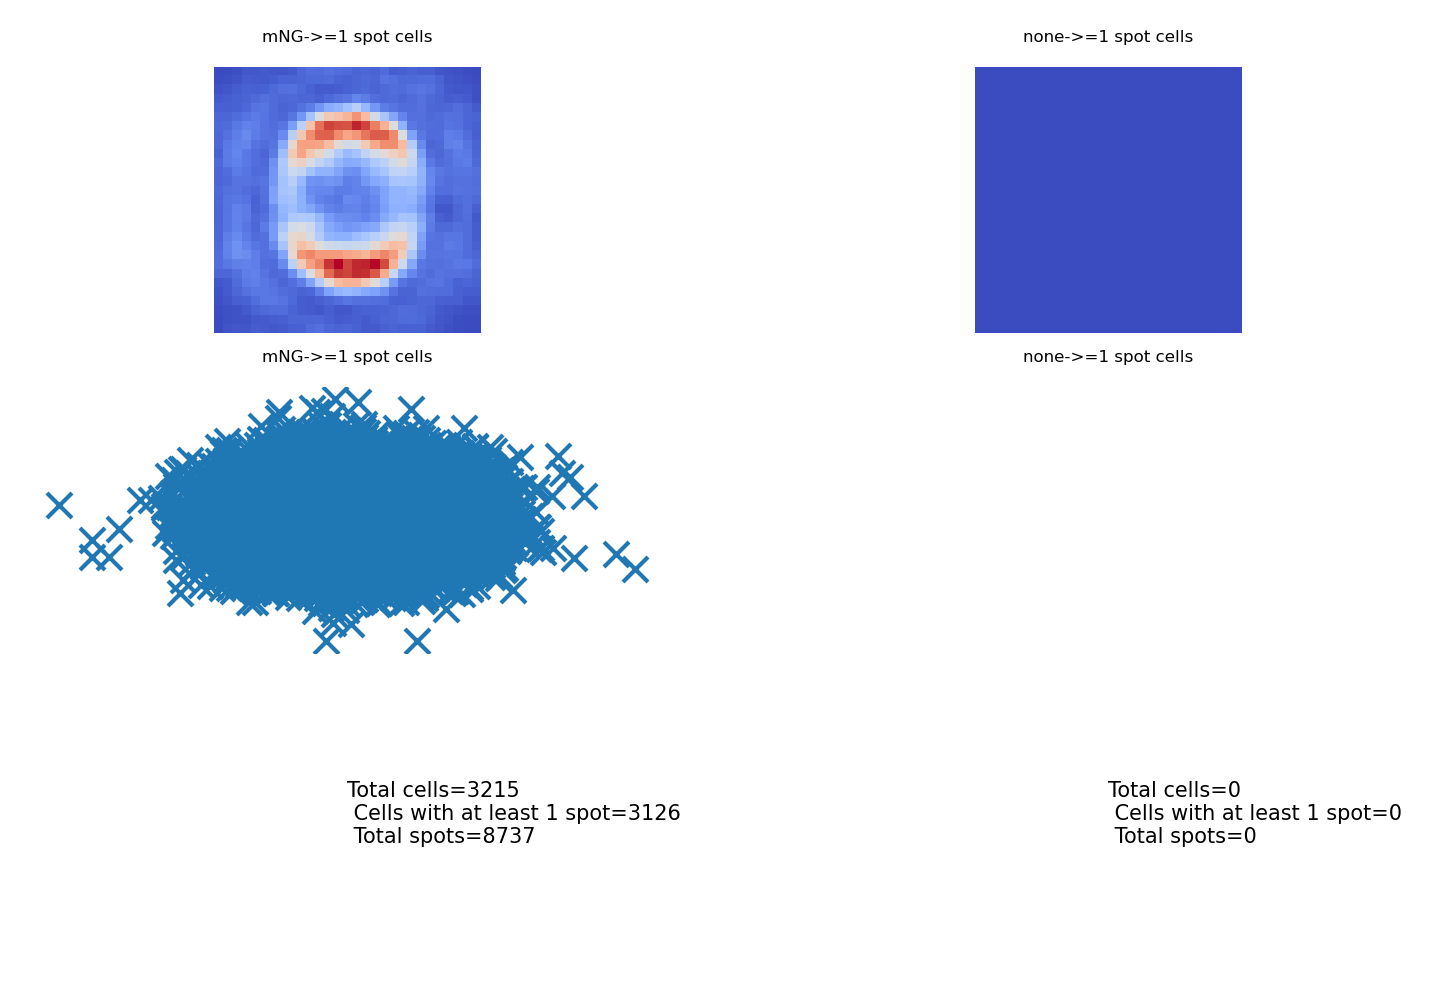

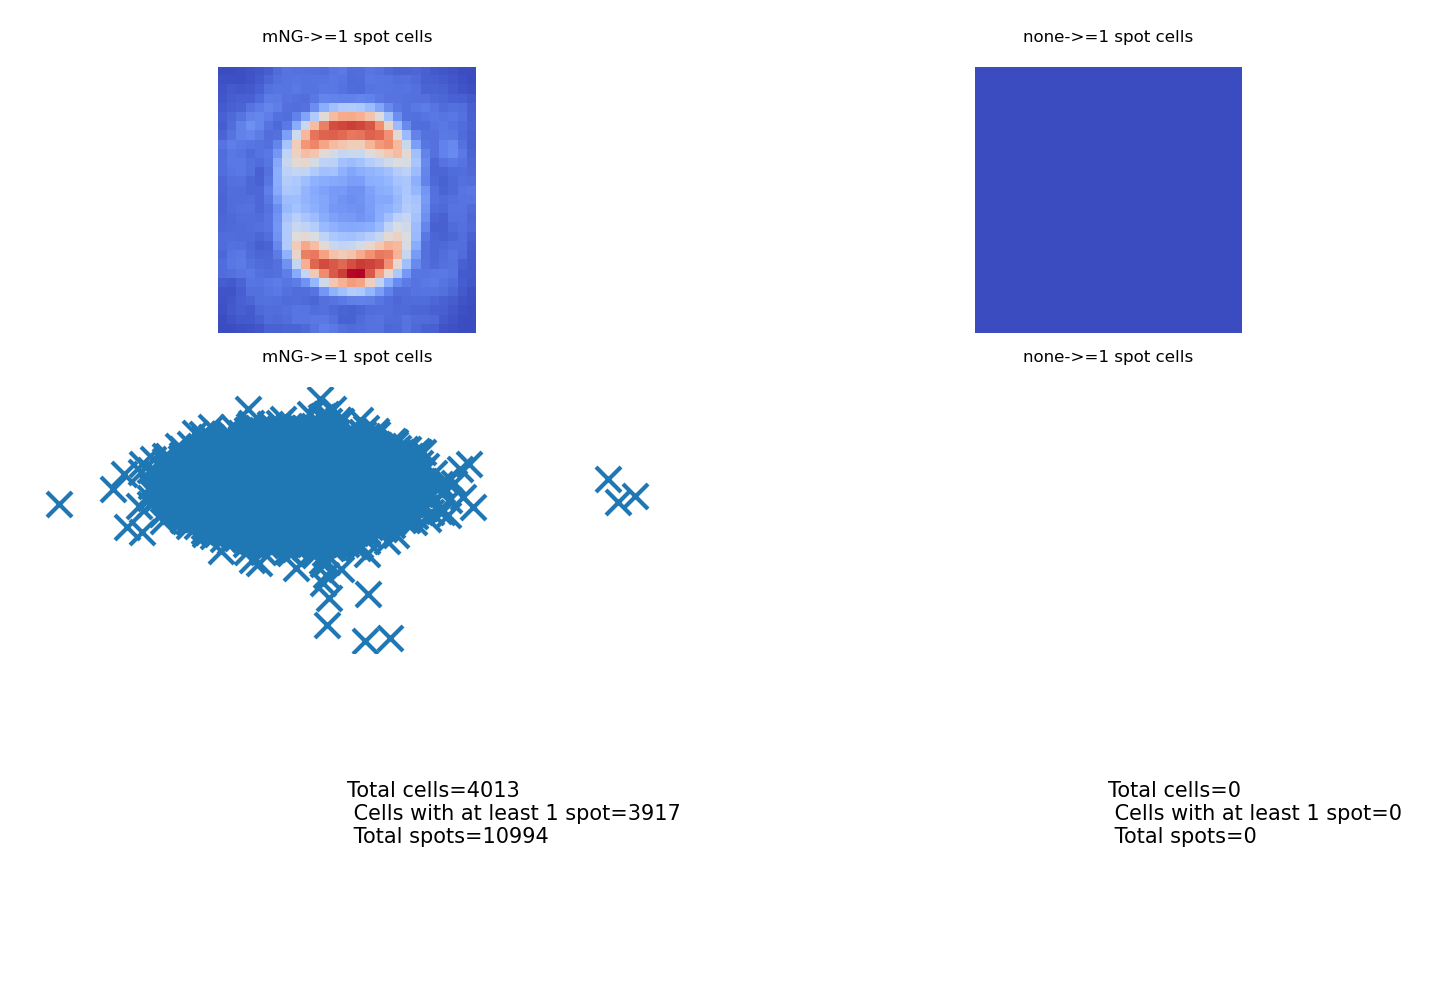

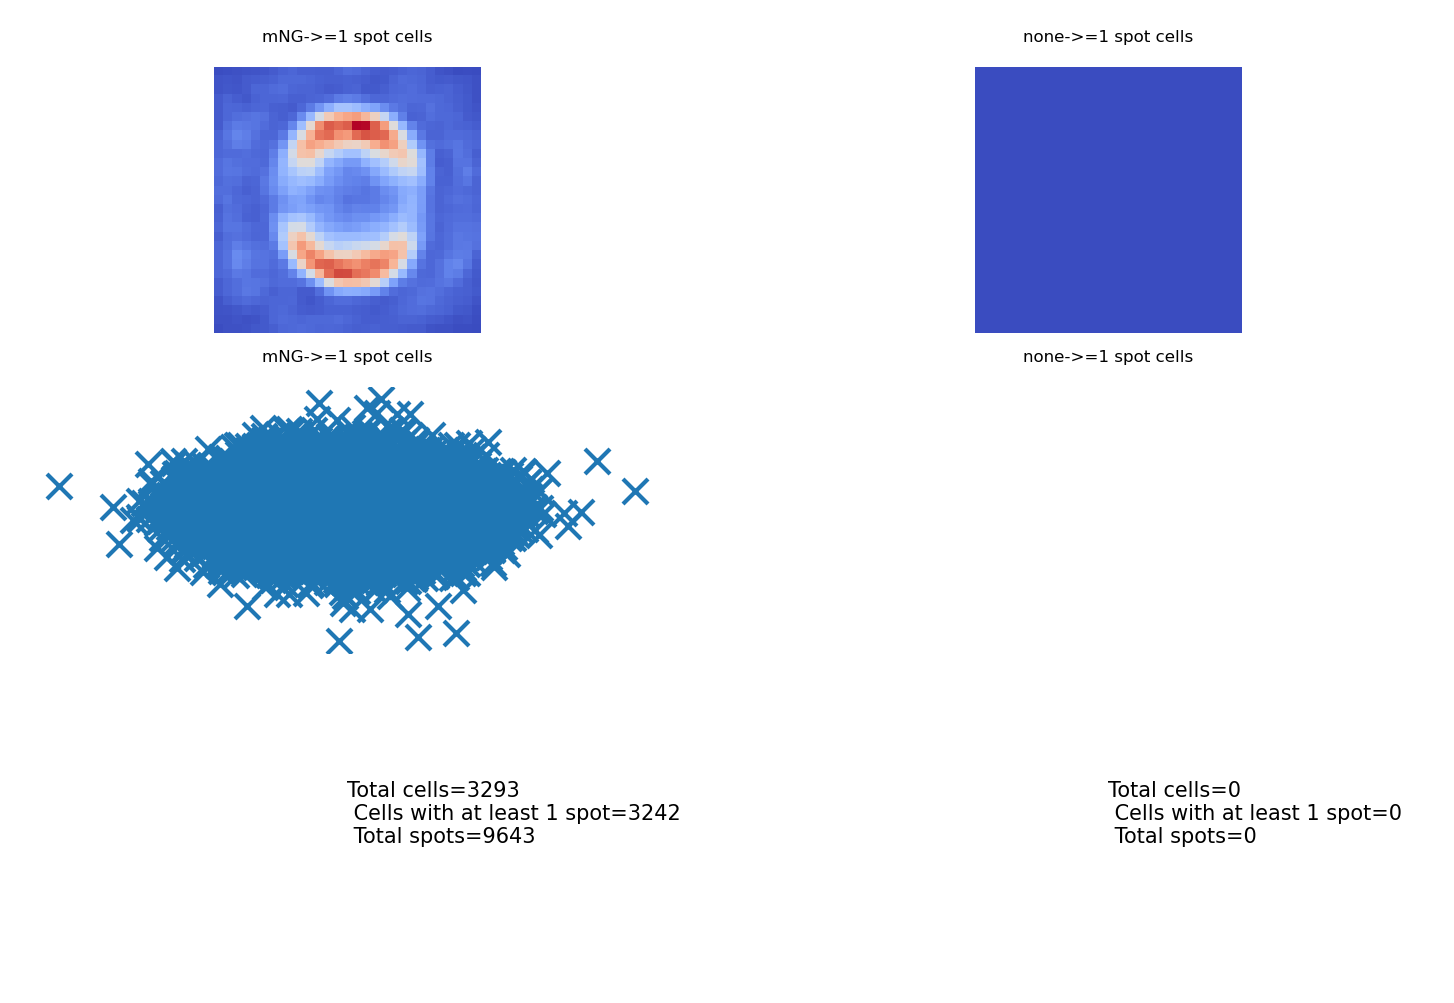

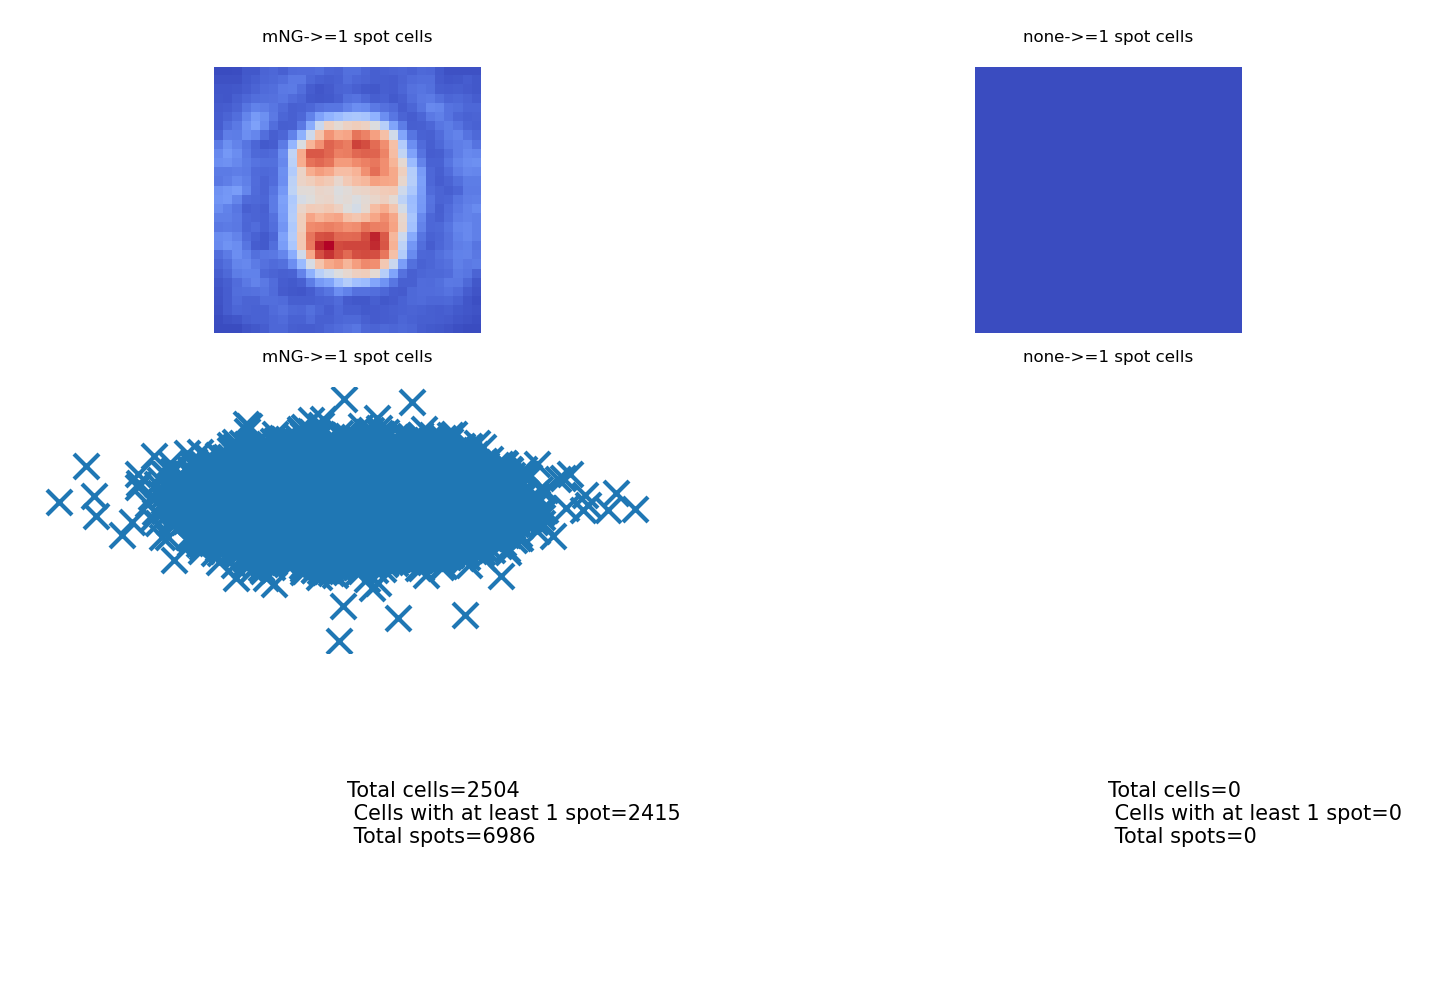

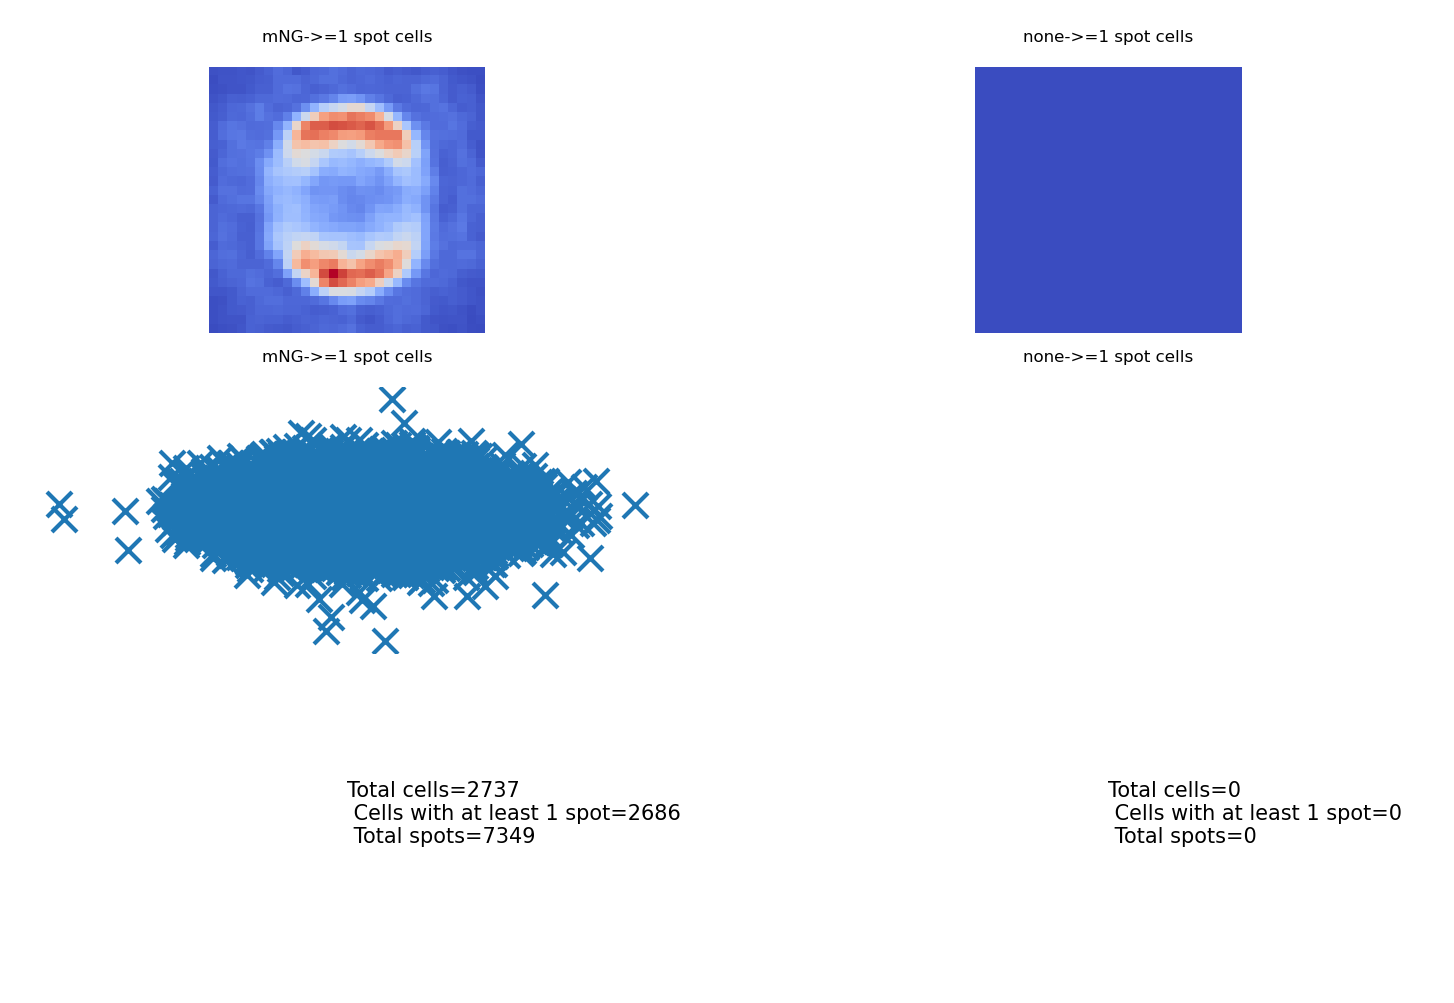

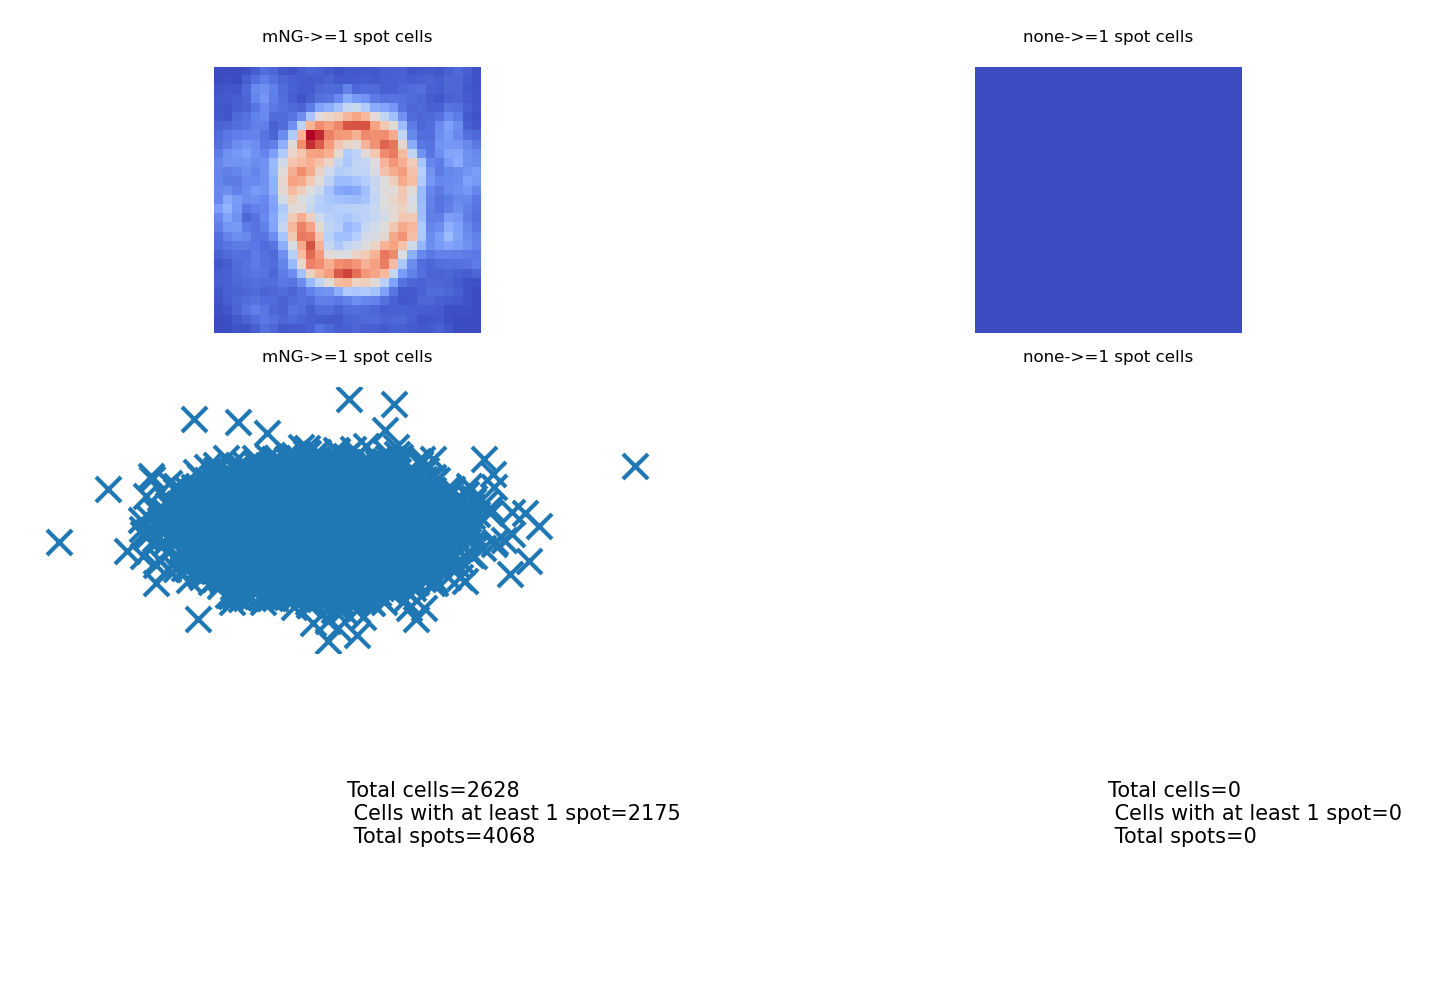

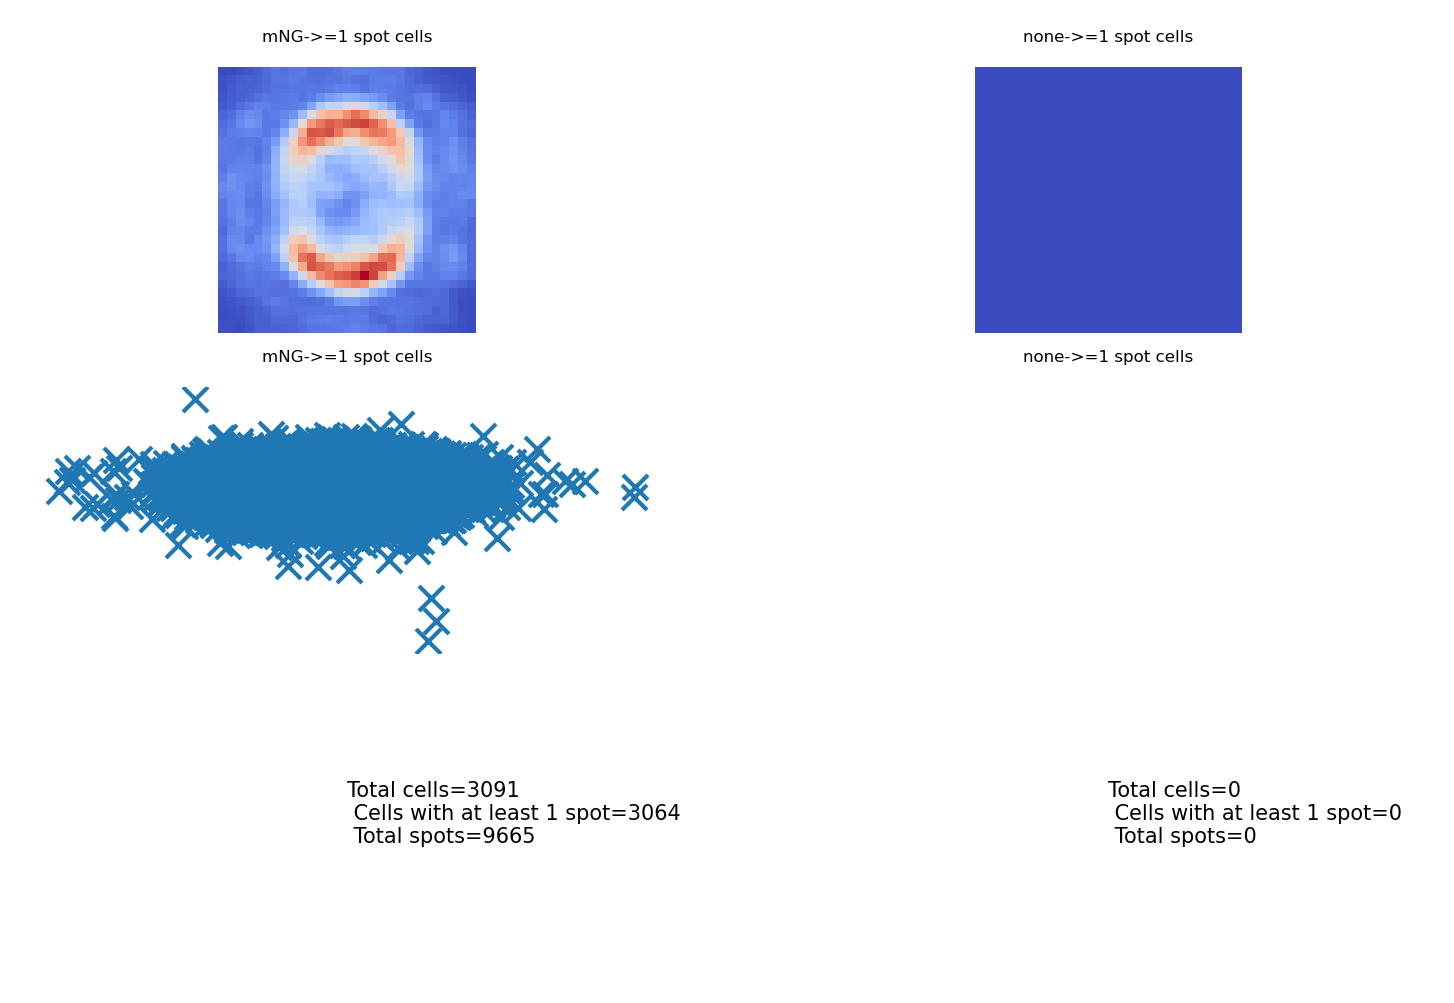

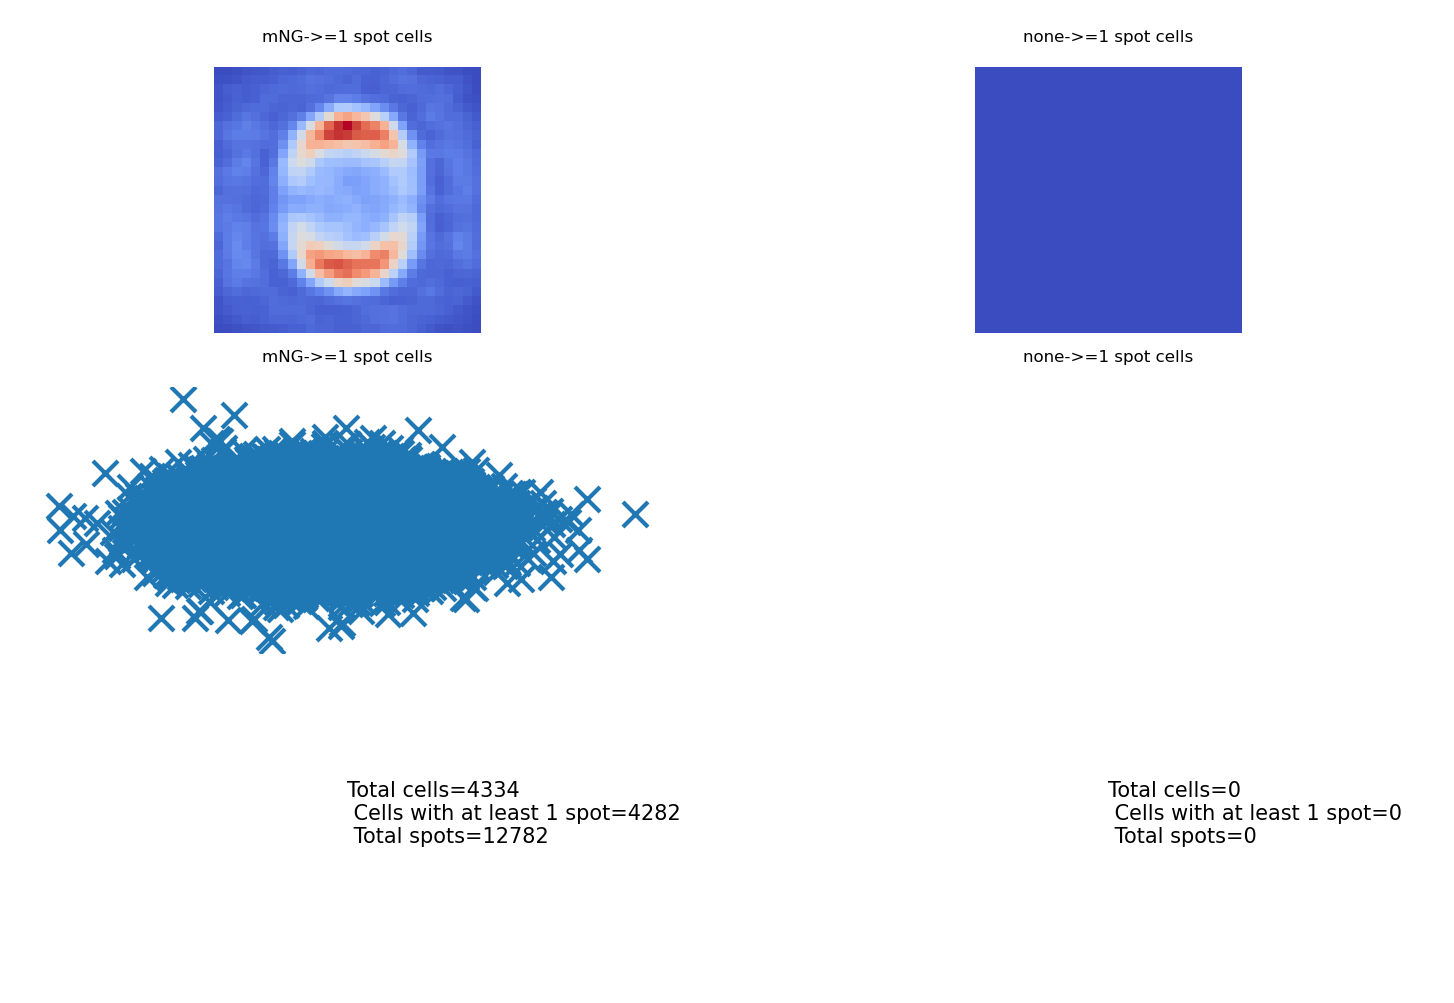

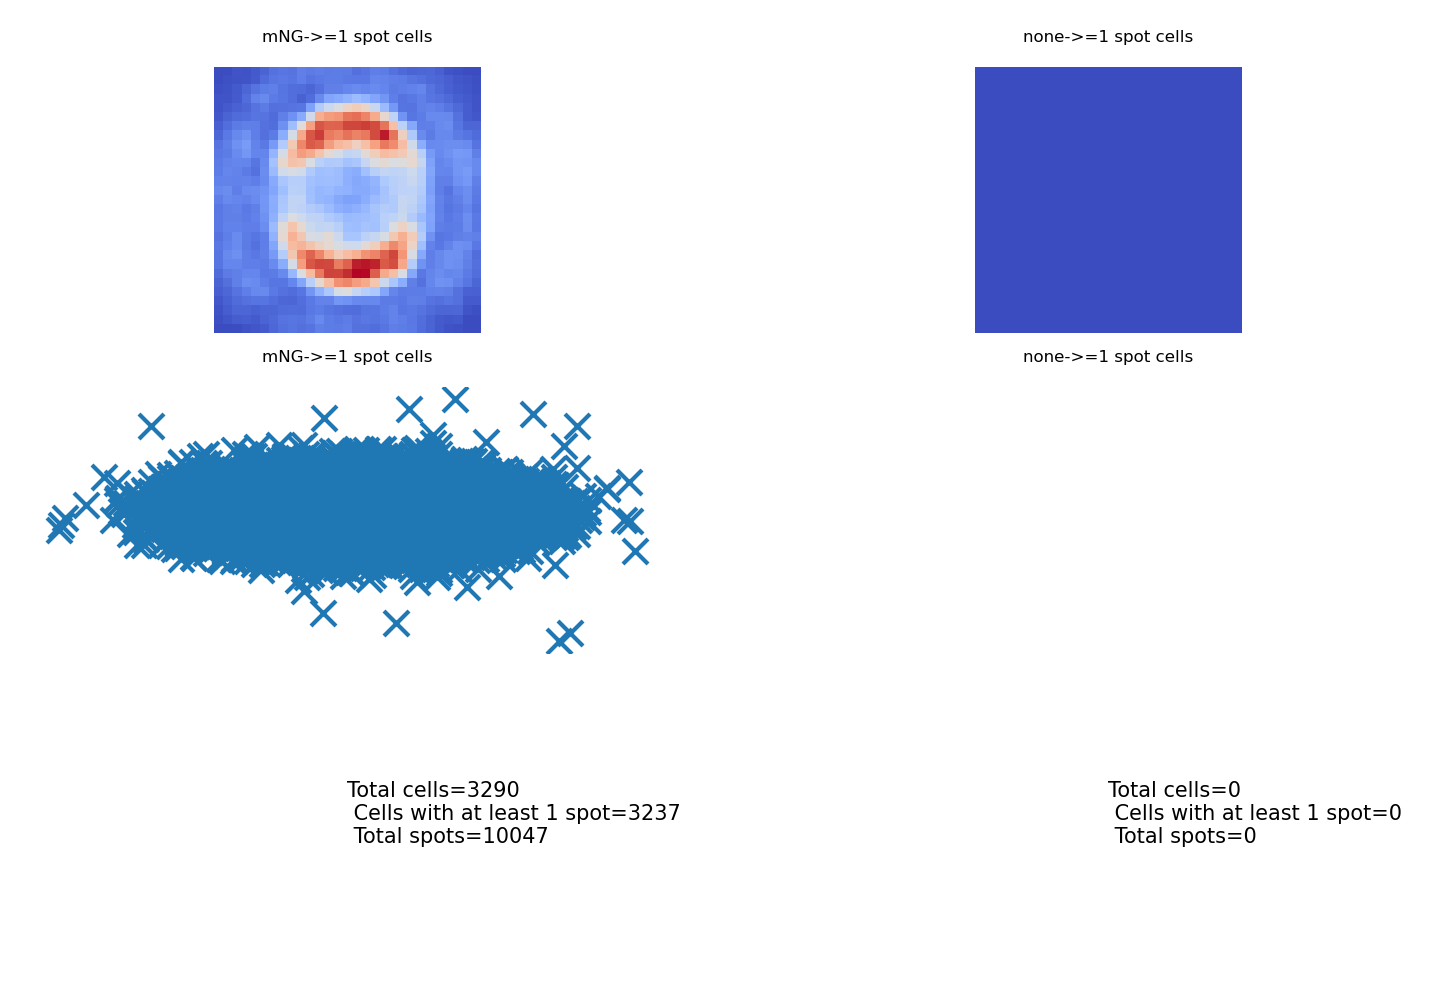

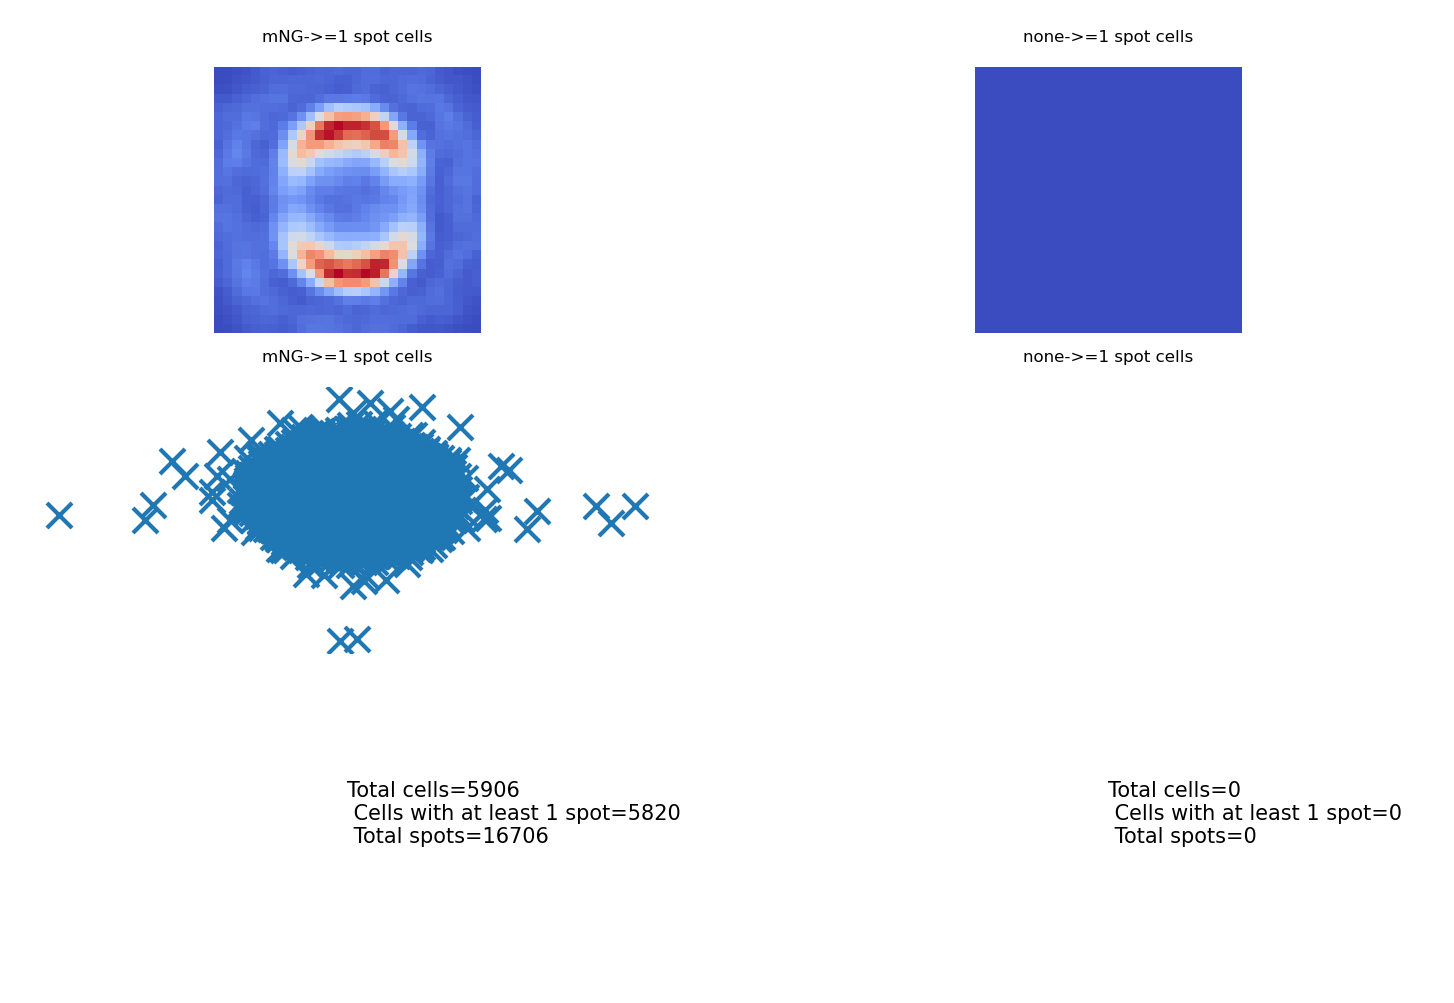

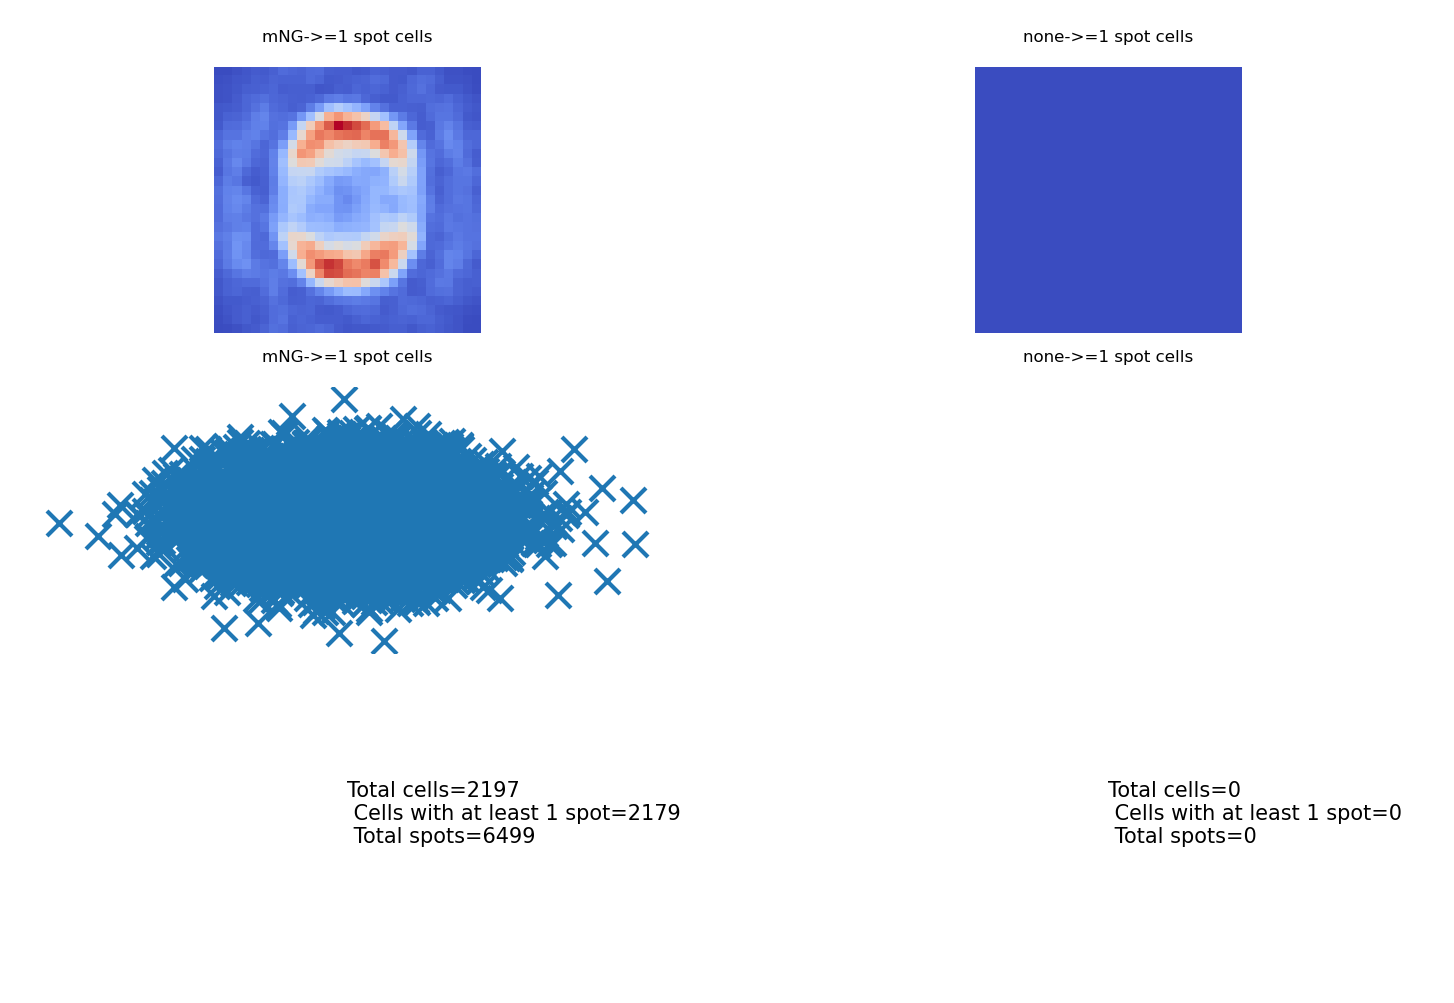

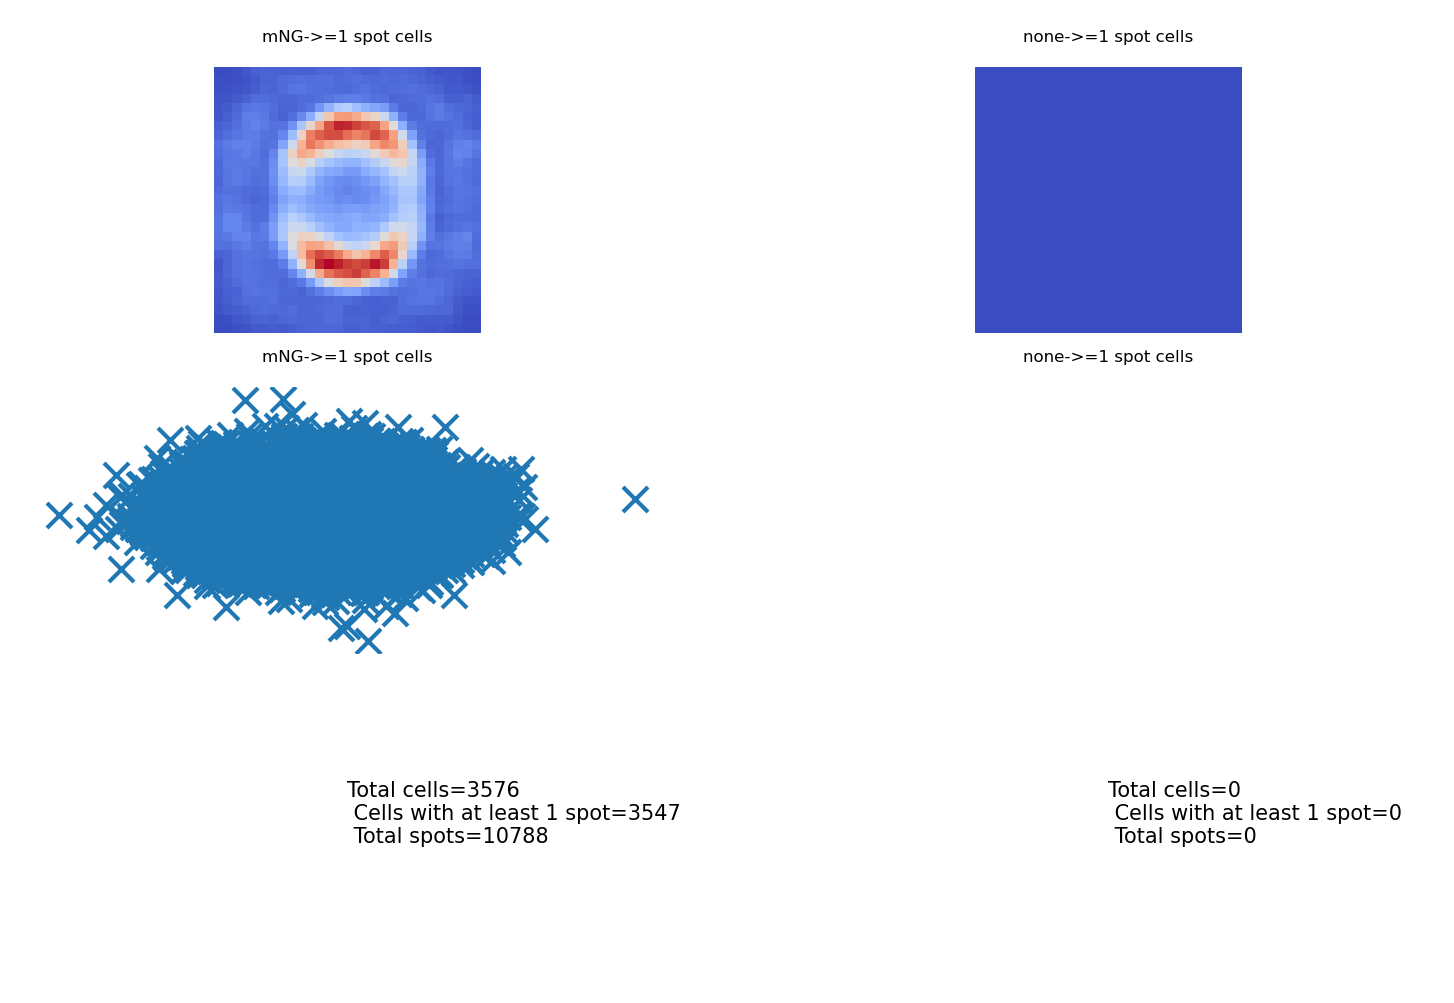

In [3]:
root_folder = r"C:\Users\Antonio\Desktop\heatmaps_fros\Heatmaps_data_Jul22-Aug23"

for c in os.listdir(root_folder):
    
    condition_folder = os.path.join(root_folder,c)
    
    if os.path.exists(os.path.join(condition_folder,f"models_{c}.jpeg")):
        pass
        #print("skipping", c)
        #continue
    
    fluor1 = 'none'
    fluor2 = 'none'
    
    if 'YFP' in c:
        fluor1 = 'YFP'
    if 'CFP' in c:
        fluor2 = 'CFP'
        
    if 'mNG' in c:
        fluor1 = 'mNG'
    if 'mScI' in c:
        fluor2 = 'mScI'
    
    if fluor1 == 'none':
        fluor2, fluor1 = fluor1, fluor2
    
    print(c, fluor1, fluor2)
    
    base = "Phase"
    membrane = 'none'
    basetype = "Phase"
    
    exp_objects = ExperimentalCondition(condition_folder, fluor1, fluor2, membrane, base, basetype)
    
    models_fluor_1 = exp_objects.askformodel(channel=1, modeltype='spot', minspots=1, cellcycle=(0,1,2,3))
    scatter_coords_1 = exp_objects.askforscatter(channel=1, minspots=1, maxspots=np.inf, cellcycle=(0,1,2,3))
    
    if fluor2 != 'none':
        models_fluor_2 = exp_objects.askformodel(channel=2, modeltype='spot', minspots=1, cellcycle=(0,1,2,3))
        scatter_coords_2 = exp_objects.askforscatter(channel=2, minspots=1, maxspots=np.inf, cellcycle=(0,1,2,3))
    else:
        models_fluor_2 = 0,0,0,np.zeros((30,30))
        scatter_coords_2 = [],[]
        
        
    # totalN, totalCells, totalSpots, final_model
    
    fig, ax = plt.subplots(3, 2, dpi=300)
    
    ax[0,0].imshow(models_fluor_1[3], cmap='coolwarm')
    ax[0,1].imshow(models_fluor_2[3], cmap='coolwarm')
    ax[0,0].axis('off')
    ax[0,1].axis('off')
    ax[0,0].set_title(f"{fluor1}->=1 spot cells", fontsize=4)
    ax[0,1].set_title(f"{fluor2}->=1 spot cells", fontsize=4)
    
    #ax[1,0].plot(scatter_coords_1[0],scatter_coords_1[1],'x')
    #ax[1,1].plot(scatter_coords_2[0],scatter_coords_2[1],'x')
    ax[1,0].axis('off')
    ax[1,1].axis('off')
    ax[1,0].set_title(f"{fluor1}->=1 spot cells", fontsize=4)
    ax[1,1].set_title(f"{fluor2}->=1 spot cells", fontsize=4)
    
    
    rawtxt = f"Total cells={models_fluor_1[1]} \n Cells with at least 1 spot={models_fluor_1[0]} \n Total spots={models_fluor_1[2]}"
    ax[2,0].axis([0,10,0,10])
    ax[2,0].axis('off')
    ax[2,0].text(5,5,rawtxt, fontsize=5, wrap=True)
    
    rawtxt = f"Total cells={models_fluor_2[1]} \n Cells with at least 1 spot={models_fluor_2[0]} \n Total spots={models_fluor_2[2]}"
    ax[2,1].axis([0,10,0,10])
    ax[2,1].axis('off')
    ax[2,1].text(5,5,rawtxt, fontsize=5, wrap=True)
    
    os.mkdir(os.path.join(r"C:\Users\Antonio\Desktop\heatmaps_fros\Heatmaps_results_jul22-aug23",c))
    plt.savefig(os.path.join(r"C:\Users\Antonio\Desktop\heatmaps_fros\Heatmaps_results_jul22-aug23",c,f"models_{c}.jpeg"))
    
    

(0.0, 29.0)

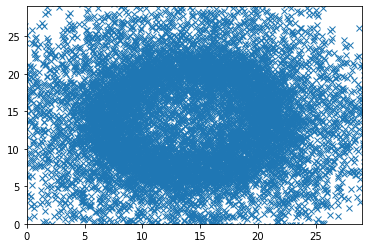

In [4]:
plt.plot(scatter_coords_1[0],scatter_coords_1[1],'x')
plt.xlim((0,models_fluor_1[3].shape[1]))
plt.ylim((0,models_fluor_1[3].shape[0]))